In [1]:
import xclim
# Also import some submodules for direct access
from xclim import sdba  # Bias-adjustment

# Data manipulation
import xarray as xr
import xclim.testing
import numpy as np

# Regridding / interpollatiion of grids
import xesmf as xe

# Visualizations and display
from pprint import pprint
from IPython.display import display
import matplotlib as mpl
import matplotlib.pyplot as plt
from dask.diagnostics import ProgressBar
# Visualization of Cartographic Maps
import cartopy.crs as ccrs

# For handling file paths
import os

In [2]:
# keep attributes for all datasets
xr.set_options(keep_attrs=True)

In [3]:
os.chdir('/datadrive/project/input/gcm')

In [4]:
fn ='pr_day_GFDL-ESM4_historical_r1i1p1f1_gr1_18500101-20141231.nc'

fn1 = 'pr_day_GFDL-ESM4_ssp245_r1i1p1f1_gr1_20150101-21001231.nc' 

fn2 = '/datadrive/project/input/output/imerge_regrid/imerge_to_gfdl_patch.nc'

fn3 = 'pr_day_GFDL-ESM4_ssp585_r1i1p1f1_gr1_20150101-21001231.nc'

In [5]:
# load GCM historical dataset
ds_hist = xr.open_dataset(fn)
ds_hist

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 30, time: 60225, lon: 30)
Coordinates:
  * bnds       (bnds) float64 1.0 2.0
  * lat        (lat) float64 1.5 2.5 3.5 4.5 5.5 ... 26.5 27.5 28.5 29.5 30.5
  * lon        (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * time       (time) object 1850-01-01 12:00:00 ... 2014-12-31 12:00:00
Data variables:
    lat_bnds   (time, lat, bnds) float64 ...
    lon_bnds   (time, lon, bnds) float64 ...
    pr         (time, lat, lon) float32 ...
    time_bnds  (time, bnds) object ...
Attributes: (12/46)
    external_variables:     areacella
    history:                File was processed by fremetar (GFDL analog of CM...
    table_id:               day
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    ...                     ...
    title:                  NOAA GFDL GFDL-ESM4 model output prepared for CMI...
    tracking_id:            hdl:21.14100/fc9d6bda-4932-469c-9d06-bf17794c3169
    variable_id:            pr
    variant_info:           N/A
    references:             see further_info_url attribute
    variant_label:          r1i1p1f1

In [6]:
# load GCM Simulation ssp245 dataset
ds_sim = xr.open_dataset(fn1)
ds_sim

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 30, time: 31390, lon: 30)
Coordinates:
  * bnds       (bnds) float64 1.0 2.0
  * lat        (lat) float64 1.5 2.5 3.5 4.5 5.5 ... 26.5 27.5 28.5 29.5 30.5
  * lon        (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * time       (time) object 2015-01-01 12:00:00 ... 2100-12-31 12:00:00
Data variables:
    lat_bnds   (time, lat, bnds) float64 ...
    lon_bnds   (time, lon, bnds) float64 ...
    pr         (time, lat, lon) float32 ...
    time_bnds  (time, bnds) object ...
Attributes: (12/46)
    external_variables:     areacella
    history:                File was processed by fremetar (GFDL analog of CM...
    table_id:               day
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   60225.0
    ...                     ...
    title:                  NOAA GFDL GFDL-ESM4 model output prepared for CMI...
    tracking_id:            hdl:21.14100/48767401-8960-4864-8738-e64640bef71d
    variable_id:            pr
    variant_info:           N/A
    references:             see further_info_url attribute
    variant_label:          r1i1p1f1

In [7]:
# load GCM Simulation ssp585 dataset
ds_sim585 = xr.open_dataset(fn3)
ds_sim585

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 30, time: 31390, lon: 30)
Coordinates:
  * bnds       (bnds) float64 1.0 2.0
  * lat        (lat) float64 1.5 2.5 3.5 4.5 5.5 ... 26.5 27.5 28.5 29.5 30.5
  * lon        (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * time       (time) object 2015-01-01 12:00:00 ... 2100-12-31 12:00:00
Data variables:
    lat_bnds   (time, lat, bnds) float64 ...
    lon_bnds   (time, lon, bnds) float64 ...
    pr         (time, lat, lon) float32 ...
    time_bnds  (time, bnds) object ...
Attributes: (12/46)
    external_variables:     areacella
    history:                File was processed by fremetar (GFDL analog of CM...
    table_id:               day
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   60225.0
    ...                     ...
    title:                  NOAA GFDL GFDL-ESM4 model output prepared for CMI...
    tracking_id:            hdl:21.14100/e5a52b09-5ca8-421d-a446-f0874c07f4c6
    variable_id:            pr
    variant_info:           N/A
    references:             see further_info_url attribute
    variant_label:          r1i1p1f1

In [8]:
# load reference (Observation) dataset
ds_ref_standard = xr.open_dataset(fn2)
ds_ref_standard

<xarray.Dataset>
Dimensions:  (time: 7792, lat: 30, lon: 30, lat_b: 282, lon_b: 362)
Coordinates:
  * time     (time) datetime64[ns] 2000-06-01 2000-06-02 ... 2021-09-30
  * lat_b    (lat_b) float64 1.9 2.0 2.1 2.2 2.3 ... 29.6 29.7 29.8 29.9 30.0
  * lon_b    (lon_b) float64 -18.1 -18.0 -17.9 -17.8 ... 17.7 17.8 17.9 18.0
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
Data variables:
    pr       (time, lat, lon) float64 ...
Attributes:
    regrid_method:  patch

In [9]:
# re-assign Dimension name attribute
ds_ref_standard['pr'] = ds_ref_standard.pr.assign_attrs(long_name='Precipitation')
ds_ref_standard['pr'] = ds_ref_standard.pr.assign_attrs(units='mm d-1')
ds_ref_standard['pr'] = ds_ref_standard.pr.assign_attrs(standard_name='precipitation_flux')
ds_ref_standard['pr'] = ds_ref_standard.pr.assign_attrs(interp_method='patch')
ds_ref_standard

<xarray.Dataset>
Dimensions:  (time: 7792, lat: 30, lon: 30, lat_b: 282, lon_b: 362)
Coordinates:
  * time     (time) datetime64[ns] 2000-06-01 2000-06-02 ... 2021-09-30
  * lat_b    (lat_b) float64 1.9 2.0 2.1 2.2 2.3 ... 29.6 29.7 29.8 29.9 30.0
  * lon_b    (lon_b) float64 -18.1 -18.0 -17.9 -17.8 ... 17.7 17.8 17.9 18.0
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
Data variables:
    pr       (time, lat, lon) float64 ...
Attributes:
    regrid_method:  patch

In [10]:
# convert Reference Dataset to DataArray
ds_ref_standard = ds_ref_standard.pr
ds_ref_standard

<xarray.DataArray 'pr' (time: 7792, lat: 30, lon: 30)>
[7012800 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 2000-06-01 2000-06-02 ... 2021-09-30
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
Attributes:
    long_name:      Precipitation
    units:          mm d-1
    standard_name:  precipitation_flux
    interp_method:  patch

In [11]:
# lenght of Reference dataset before conversion
print((f'lenght of Reference Observation data is : {len(ds_ref_standard.time.values)}'))
ds_ref_standard.time[59].data

lenght of Reference Observation data is : 7792


array('2000-07-30T00:00:00.000000000', dtype='datetime64[ns]')

In [12]:
# Calendar conversion

# Convert the Reference data to `noleap` calendar
ds_ref = xclim.core.calendar.convert_calendar(ds_ref_standard, 'noleap')
print((f'lenght of Reference Observation data is : {len(ds_ref.time.values)}'))
ds_ref.time[59].data

lenght of Reference Observation data is : 7787


array(cftime.DatetimeNoLeap(2000, 7, 30, 0, 0, 0, 0, has_year_zero=True),
      dtype=object)

In [13]:
# `hist` and `sim` are given in kg m-2 s-1, we must convert to mm/d to fit with `ref`
ds_hist = xclim.core.units.convert_units_to(ds_hist.pr, 'mm/d')
ds_sim = xclim.core.units.convert_units_to(ds_sim.pr, 'mm/d')
ds_sim585 = xclim.core.units.convert_units_to(ds_sim585.pr, 'mm/d')
ds_sim

<xarray.DataArray 'pr' (time: 31390, lat: 30, lon: 30)>
array([[[8.27760727e-04, 5.91804599e-03, 3.00125498e-03, ...,
         3.32788788e-02, 3.31913084e-01, 1.27604878e+00],
        [2.34299563e-07, 3.06397385e-04, 1.58949806e-05, ...,
         6.43455796e-03, 2.39529405e-02, 6.15998358e-02],
        [1.99868229e-08, 0.00000000e+00, 7.92549457e-08, ...,
         2.00297291e-06, 4.38418328e-06, 1.73773777e-04],
        ...,
        [6.86139762e-01, 7.35506654e-01, 4.95649070e-01, ...,
         8.07272613e-08, 3.90986443e-09, 2.94671132e-09],
        [6.18888736e-01, 4.33507442e-01, 3.65886986e-01, ...,
         3.05949244e-09, 1.52542885e-23, 7.40235835e-23],
        [7.66100109e-01, 5.98797083e-01, 6.76250696e-01, ...,
         1.11245332e-24, 1.29198637e-23, 1.20485630e-08]],

       [[8.08757534e-07, 4.98679174e-06, 1.26340638e-06, ...,
         8.63123119e-01, 1.30686736e+00, 1.12223661e+00],
        [2.15863884e-06, 2.40199024e-05, 6.81038159e-07, ...,
         6.43877327e-01, 1.01385629e+00, 3.59533846e-01],
        [1.32190951e-06, 2.37105269e-06, 6.95622475e-08, ...,
         1.60331354e-01, 2.80094117e-01, 1.30953014e-01],
...
        [3.51387501e+00, 4.28665781e+00, 2.42060447e+00, ...,
         3.75801586e-02, 2.00410604e-01, 3.47523659e-01],
        [1.57184303e+00, 1.26711822e+00, 5.93206167e-01, ...,
         4.05169204e-02, 2.04013661e-01, 4.80594486e-01],
        [4.35284898e-02, 5.22943214e-03, 2.03650416e-04, ...,
         1.14970401e-01, 3.90481770e-01, 8.65156889e-01]],

       [[7.74223328e-01, 2.86593825e-01, 2.25814044e-01, ...,
         2.44728908e-05, 1.21576180e-04, 2.94606696e-04],
        [1.04731917e+00, 3.85867596e-01, 2.47747451e-01, ...,
         2.94490743e-09, 3.77127944e-05, 1.95827015e-04],
        [1.47707236e+00, 7.99957395e-01, 4.42971349e-01, ...,
         3.44036357e-06, 1.80719435e-05, 7.61100405e-10],
        ...,
        [1.53226984e+00, 1.44738901e+00, 3.72677326e-01, ...,
         3.65189184e-03, 5.01225218e-02, 1.29681870e-01],
        [8.44142288e-02, 3.22265504e-03, 3.30518768e-03, ...,
         2.62172800e-03, 5.29917888e-02, 1.40893549e-01],
        [1.41107026e-04, 5.71183555e-05, 2.61576206e-05, ...,
         3.12236510e-03, 9.62966159e-02, 1.52816862e-01]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * time     (time) object 2015-01-01 12:00:00 ... 2100-12-31 12:00:00
Attributes:
    long_name:      Precipitation
    units:          mm d-1
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    standard_name:  precipitation_flux
    interp_method:  conserve_order1
    original_name:  pr

In [14]:
ds_hist.isel(time=2,lat=2,lon=2).values

array(0.00882688, dtype=float32)

In [15]:
ds_ref.time[59].data

array(cftime.DatetimeNoLeap(2000, 7, 30, 0, 0, 0, 0, has_year_zero=True),
      dtype=object)

In [16]:
# lets slice `ref` and `hist` for 2001 to 2014
hist = ds_hist.sel(time=slice('2001','2014'))
ref = ds_ref.sel(time=slice('2001','2014'))
print((f'lenght of GCM Historical data is : {len(hist.time.values)}'))
print((f'lenght of Reference Observation data is : {len(ref.time.values)}'))

lenght of GCM Historical data is : 5110
lenght of Reference Observation data is : 5110


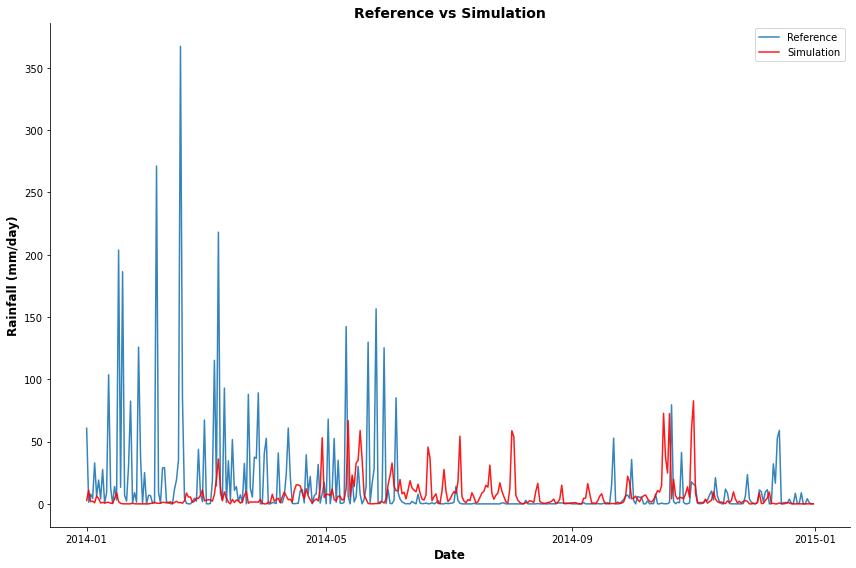

In [17]:
x = ref.isel(lat=2,lon=2,time=slice(-365,None))
y = hist.isel(lat=2,lon=2,time=slice(-365,None))
dt = ref.isel(lat=2,lon=2,time=slice(-365,None)).time
dt = x.time

# We create a canvas with one ax
fig, axes = plt.subplots(1, 1, figsize=(12,8))

# We plot on our first axis
axes.plot(dt,x, alpha=0.9)
axes.plot(dt,y, alpha=0.9,c='r')

# Set a title
axes.set_title('Reference vs Simulation',size=14,fontweight='bold')
axes.set_xlabel('Date',size=12,fontweight='semibold')
axes.set_ylabel('Rainfall (mm/day)',size=12,fontweight='semibold')


# Hide the right and top spines
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)

# We tight the layout
fig.tight_layout()

axes.legend(['Reference', 'Simulation'])
# We plot
plt.show()

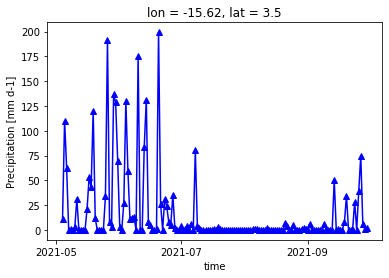

In [18]:
ds_ref.isel(lat=2,lon=2,time=(slice(-150,None))).plot.line("b-^")

In [19]:
# We want to group data on a day-of-year basis with a 31-day moving window
group_month = xclim.sdba.Grouper('time.month')

In [20]:
QM = sdba.EmpiricalQuantileMapping.train(
    ref, hist, nquantiles=15, group=group_month, kind="*"
)

In [21]:
scen = QM.adjust(ds_sim, extrapolation="constant", interp="linear")
scen

<xarray.DataArray 'scen' (time: 31390, lat: 30, lon: 30)>
array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00, -3.97060076e-05, -6.21177735e-06, ...,
          2.47017335e-02,  4.38701774e-01,  0.00000000e+00],
        [ 0.00000000e+00, -0.00000000e+00, -3.16892918e-07, ...,
         -1.10932724e+15,            -inf,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  5.57584032e-01,  5.68178358e-01, ...,
                    -inf,            -inf,  0.00000000e+00],
        [ 0.00000000e+00,  2.35067216e-01,  1.90264971e-01, ...,
                    -inf,            -inf,             nan],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
                     nan,             nan,  0.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00, -3.04484227e-06, -2.53854496e-07, ...,
          9.35001986e+00,  2.72658959e+01,  0.00000000e+00],
        [ 0.00000000e+00, -2.29130894e-06, -2.59814078e-07, ...,
          8.28550804e+00,  5.22601955e+00,  0.00000000e+00],
...
        [ 0.00000000e+00,  5.68315936e+00,  2.51418592e+00, ...,
          3.33871140e-01,  1.93362220e+00,  0.00000000e+00],
        [ 0.00000000e+00,  1.33676690e+00,  6.62325431e-01, ...,
          5.64815381e-01,  1.87112206e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  1.04217231e+00,  2.62924148e-01, ...,
         -7.29799395e+07,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  9.34991984e+00,  5.02934889e+00, ...,
         -1.22043652e+15,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  1.53039131e+00,  3.38274608e-01, ...,
          2.78755081e-02,  2.91464224e-01,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          9.63644289e-03,  4.24198010e-01,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]])
Coordinates:
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * time     (time) object 2015-01-01 12:00:00 ... 2100-12-31 12:00:00
Attributes:
    long_name:        Precipitation
    units:            mm d-1
    cell_methods:     area: time: mean
    cell_measures:    area: areacella
    standard_name:    precipitation_flux
    interp_method:    conserve_order1
    original_name:    pr
    history:          [2022-04-04 23:19:47] : Bias-adjusted with EmpiricalQua...
    bias_adjustment:  EmpiricalQuantileMapping(group=Grouper(add_dims=[], nam...

In [22]:
scen_hist = QM.adjust(ds_hist, extrapolation="constant", interp="linear")
scen_hist

<xarray.DataArray 'scen' (time: 60225, lat: 30, lon: 30)>
array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00, -1.89811890e-03,  0.00000000e+00, ...,
          9.66835904e-02,  4.45087143e-01,  0.00000000e+00],
        [ 0.00000000e+00,  9.32581287e-04,  7.75933109e-08, ...,
          5.27721572e-02,  9.12788764e-01,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  7.38684332e-02,  2.08354548e-01, ...,
                    -inf,            -inf,  0.00000000e+00],
        [ 0.00000000e+00,  4.45704289e-02,  3.27852493e-01, ...,
                    -inf,            -inf,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  2.89436595e+00,  4.78780043e-02, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  9.19183317e-01,  1.19295710e-01, ...,
                    -inf,            -inf,  0.00000000e+00],
...
        [ 0.00000000e+00,             nan,            -inf, ...,
                    -inf,            -inf,  0.00000000e+00],
        [ 0.00000000e+00, -1.26011183e-03,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00, -1.61280946e-03,  0.00000000e+00, ...,
         -1.93489347e+09,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  1.84880291e-02,  4.23394567e-02, ...,
                    -inf,            -inf,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  1.51265404e-01,  3.02235316e-01, ...,
                    -inf,            -inf,  0.00000000e+00],
        [ 0.00000000e+00,  9.53624102e-02,  5.54356446e-01, ...,
                    -inf,             nan,             nan],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]])
Coordinates:
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * time     (time) object 1850-01-01 12:00:00 ... 2014-12-31 12:00:00
Attributes:
    long_name:        Precipitation
    units:            mm d-1
    cell_methods:     area: time: mean
    cell_measures:    area: areacella
    standard_name:    precipitation_flux
    interp_method:    conserve_order1
    original_name:    pr
    history:          [2022-04-04 23:20:07] : Bias-adjusted with EmpiricalQua...
    bias_adjustment:  EmpiricalQuantileMapping(group=Grouper(add_dims=[], nam...

In [23]:
scen_hist.sel(lat=6.5,lon=8.125,time="2014-09-15").values

array([1.5562876])

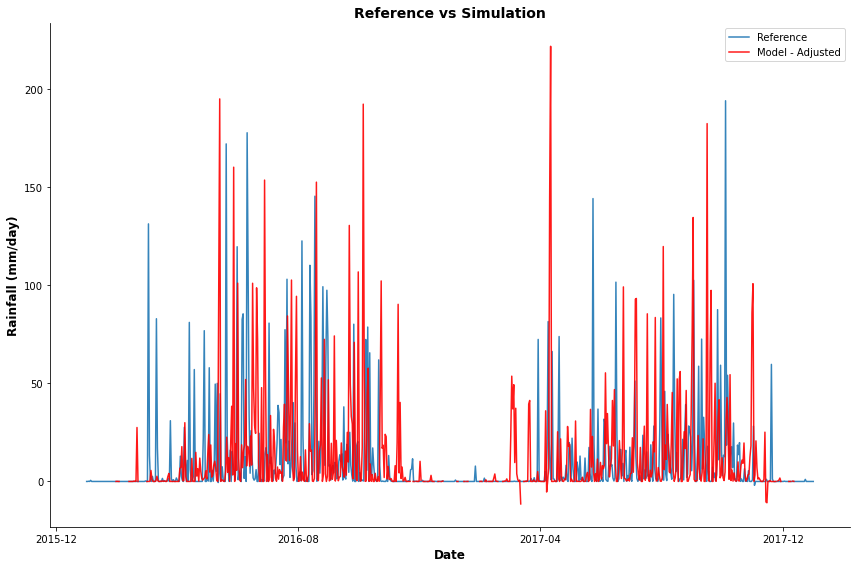

In [24]:
# Plot reference data against adjusted simulation data
ref_sliced = ds_ref.sel(lat=6.5,lon=8.125,time=slice("2016","2017"))
scen_sliced = scen.sel(lat=6.5,lon=8.125,time=slice("2016","2017"))

# We create a canvas with one ax
fig, axes = plt.subplots(1, 1, figsize=(12,8))

# We plot on our first axis
axes.plot(ref_sliced.time, ref_sliced, alpha=0.9)
axes.plot(scen_sliced.time, scen_sliced, alpha=0.9,c='r')

# Set a title
axes.set_title('Reference vs Simulation',size=14,fontweight='bold')
axes.set_xlabel('Date',size=12,fontweight='semibold')
axes.set_ylabel('Rainfall (mm/day)',size=12,fontweight='semibold')


# Hide the right and top spines
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)

# We tight the layout
fig.tight_layout()

axes.legend(['Reference', 'Model - Adjusted'])
# We plot
plt.show()

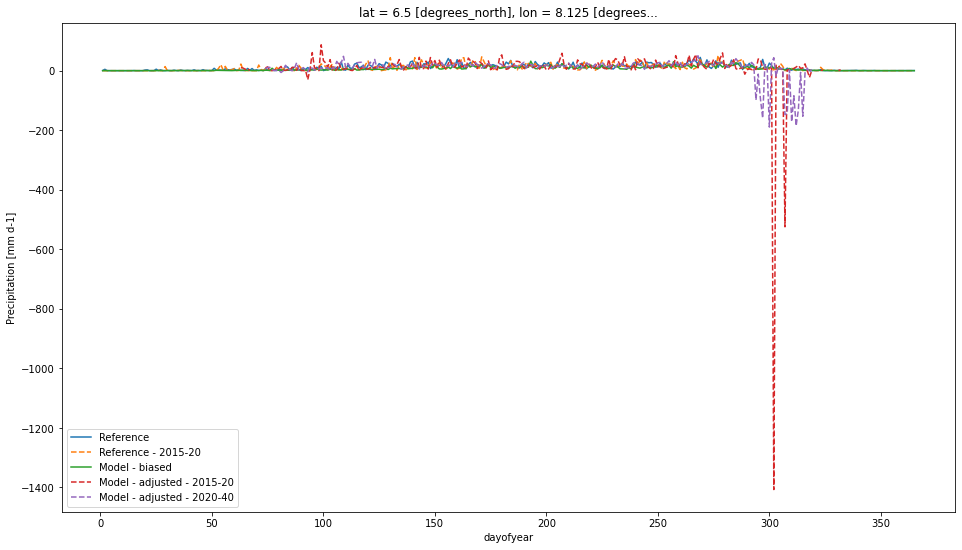

In [25]:
# Plot multiple line graph
plt.figure(figsize=(16,9))
ref.sel(
    lat=6.5,lon=8.125,time=slice(None,"2015")).groupby(
        "time.dayofyear").mean().plot(label="Reference")
ds_ref.sel(lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
    "time.dayofyear").mean().plot(
        label="Reference - 2015-20", linestyle="--")
hist.sel(
    lat=6.5,lon=8.125,time=slice(None,"2015")).groupby(
        "time.dayofyear").mean().plot(label="Model - biased")
scen.sel(
    lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
        "time.dayofyear").mean().plot(
            label="Model - adjusted - 2015-20", linestyle="--")
scen.sel(lat=6.5,lon=8.125,time=slice("2020", "2040")).groupby(
    "time.dayofyear").mean().plot(
        label="Model - adjusted - 2020-40", linestyle="--")
plt.legend()

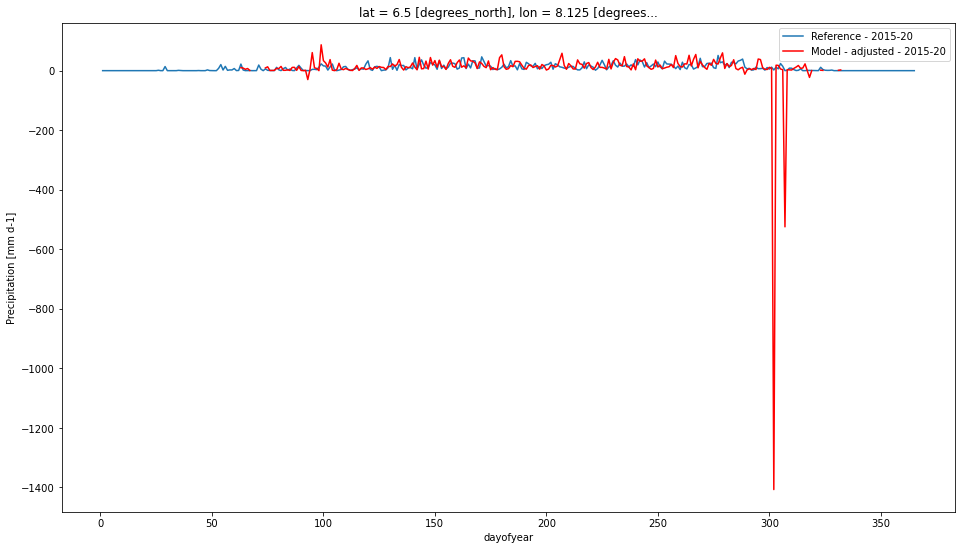

In [26]:
plt.figure(figsize=(16,9))

ds_ref.sel(lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
    "time.dayofyear").mean().plot(
        label="Reference - 2015-20")
scen.sel(
    lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
        "time.dayofyear").mean().plot(
            label="Model - adjusted - 2015-20",c='r')

plt.legend()

In [27]:
ds_ref.sel(lat=6.5,lon=8.125,time="2020-09-15").values

array([14.96030223])

In [28]:
scen.sel(lat=6.5,lon=8.125,time="2020-09-15").values

array([9.71378502])

In [29]:
QM.ds

<xarray.Dataset>
Dimensions:    (quantiles: 15, lat: 30, lon: 30, month: 12)
Coordinates:
  * quantiles  (quantiles) float64 0.03333 0.1 0.1667 ... 0.8333 0.9 0.9667
  * lat        (lat) float64 1.5 2.5 3.5 4.5 5.5 ... 26.5 27.5 28.5 29.5 30.5
  * lon        (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    af         (lat, lon, month, quantiles) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    hist_q     (lat, lon, month, quantiles) float32 0.03944 0.08137 ... 1.179
Attributes:
    group:               time.month
    group_compute_dims:  ['time']
    group_window:        1
    _xclim_adjustment:   {"py/object": "xclim.sdba.adjustment.EmpiricalQuanti...
    adj_params:          EmpiricalQuantileMapping(group=Grouper(add_dims=[], ...

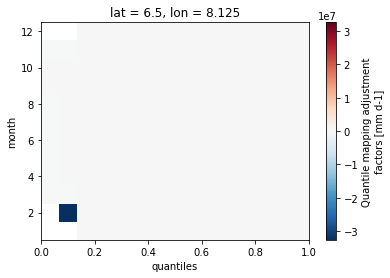

In [30]:
QM.ds.sel(lat=6.5,lon=8.125).af.plot()

In [31]:
# Empirical Quantile Mapping Adjustment for ssp585

scen585 = QM.adjust(ds_sim585, extrapolation="constant", interp="linear")
scen585

<xarray.DataArray 'scen' (time: 31390, lat: 30, lon: 30)>
array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00, -4.41133048e-05, -6.60893166e-06, ...,
          2.33640479e+00,  3.12896724e-01,  0.00000000e+00],
        [ 0.00000000e+00, -0.00000000e+00, -3.16892264e-07, ...,
         -1.12117079e+15,            -inf,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  3.48149239e-01,  5.30251932e-01, ...,
                    -inf,            -inf,  0.00000000e+00],
        [ 0.00000000e+00,  2.35363245e-01,  1.51588822e-01, ...,
                    -inf,            -inf,             nan],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,             nan]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00, -1.90133727e-06, -1.54770187e-07, ...,
          3.53082464e+01,  2.78799355e+01,  0.00000000e+00],
        [ 0.00000000e+00, -1.68967148e-06, -2.58389057e-07, ...,
          7.48863728e+00,  8.11923290e+00,  0.00000000e+00],
...
        [ 0.00000000e+00,  4.25190941e-04,            -inf, ...,
          0.00000000e+00,            -inf,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          9.45370999e-03,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  1.99752891e-02,  2.99536093e-03, ...,
          3.34285894e+00,  1.55879850e+01,  0.00000000e+00],
        [ 0.00000000e+00, -5.93683252e-04,  1.70986531e-07, ...,
          0.00000000e+00,  8.45158021e+00,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  1.52553648e+00,  1.50307046e+00, ...,
          1.88089723e-03,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  2.32977102e+00,  2.84169905e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]])
Coordinates:
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * time     (time) object 2015-01-01 12:00:00 ... 2100-12-31 12:00:00
Attributes:
    long_name:        Precipitation
    units:            mm d-1
    cell_methods:     area: time: mean
    cell_measures:    area: areacella
    standard_name:    precipitation_flux
    interp_method:    conserve_order1
    original_name:    pr
    history:          [2022-04-04 23:20:24] : Bias-adjusted with EmpiricalQua...
    bias_adjustment:  EmpiricalQuantileMapping(group=Grouper(add_dims=[], nam...

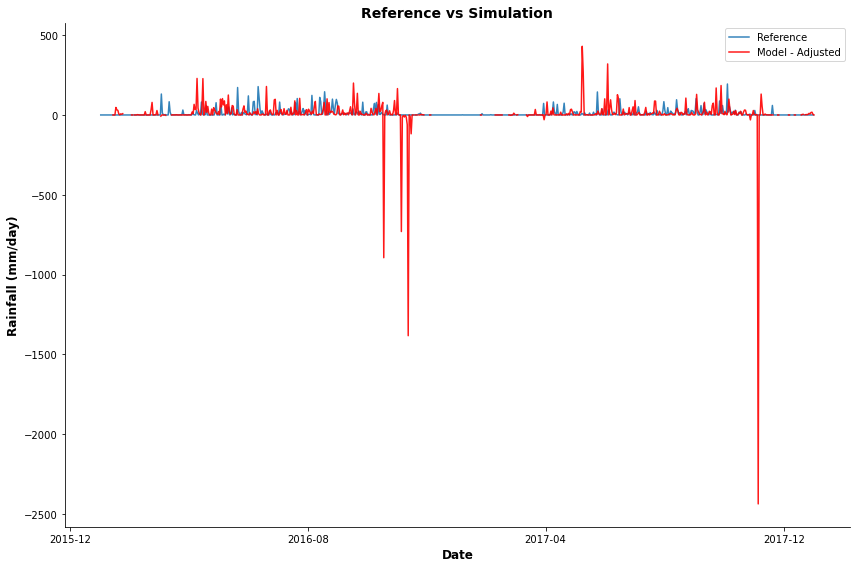

In [32]:
# Plot reference data against adjusted simulation data
ref_sliced = ds_ref.sel(lat=6.5,lon=8.125,time=slice("2016","2017"))
scen_sliced = scen585.sel(lat=6.5,lon=8.125,time=slice("2016","2017"))

# We create a canvas with one ax
fig, axes = plt.subplots(1, 1, figsize=(12,8))

# We plot on our first axis
axes.plot(ref_sliced.time, ref_sliced, alpha=0.9)
axes.plot(scen_sliced.time, scen_sliced, alpha=0.9,c='r')

# Set a title
axes.set_title('Reference vs Simulation',size=14,fontweight='bold')
axes.set_xlabel('Date',size=12,fontweight='semibold')
axes.set_ylabel('Rainfall (mm/day)',size=12,fontweight='semibold')


# Hide the right and top spines
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)

# We tight the layout
fig.tight_layout()

axes.legend(['Reference', 'Model - Adjusted'])
# We plot
plt.show()

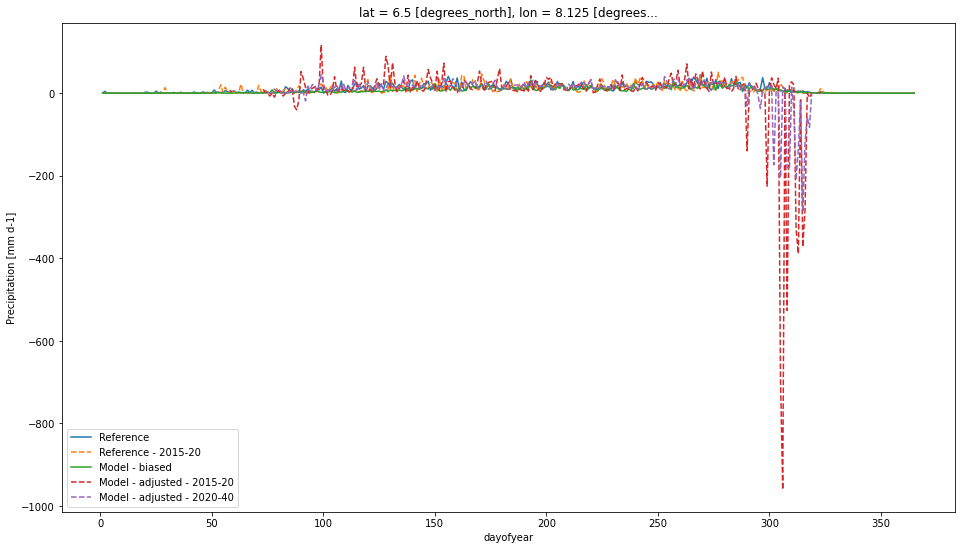

In [33]:
# Plot multiple line graph
plt.figure(figsize=(16,9))
ref.sel(
    lat=6.5,lon=8.125,time=slice(None,"2015")).groupby(
        "time.dayofyear").mean().plot(label="Reference")
ds_ref.sel(lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
    "time.dayofyear").mean().plot(
        label="Reference - 2015-20", linestyle="--")
hist.sel(
    lat=6.5,lon=8.125,time=slice(None,"2015")).groupby(
        "time.dayofyear").mean().plot(label="Model - biased")
scen585.sel(
    lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
        "time.dayofyear").mean().plot(
            label="Model - adjusted - 2015-20", linestyle="--")
scen585.sel(lat=6.5,lon=8.125,time=slice("2020", "2040")).groupby(
    "time.dayofyear").mean().plot(
        label="Model - adjusted - 2020-40", linestyle="--")
plt.legend()

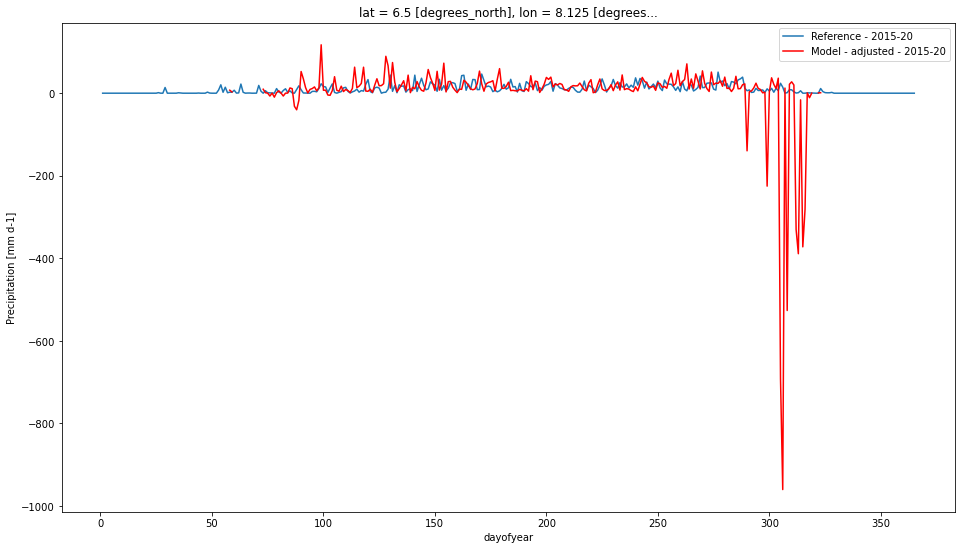

In [34]:
plt.figure(figsize=(16,9))

ds_ref.sel(lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
    "time.dayofyear").mean().plot(
        label="Reference - 2015-20")
scen585.sel(
    lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
        "time.dayofyear").mean().plot(
            label="Model - adjusted - 2015-20",c='r')

plt.legend()

In [35]:
ds_ref.sel(lat=6.5,lon=8.125,time="2020-09-15").values

array([14.96030223])

In [36]:
scen585.sel(lat=6.5,lon=8.125,time="2020-09-15").values

array([0.00062482])

In [37]:
# Second Model (Quantile Delta Mapping)

In [38]:
# We want to group data on a day-of-year basis with a 31-day moving window
group_month = xclim.sdba.Grouper('time.month')

In [39]:
QDM = sdba.QuantileDeltaMapping.train(
    ref, hist, nquantiles=15, group=group_month, kind="*"
)

In [40]:
scenQDM = QDM.adjust(ds_sim, extrapolation="constant", interp="linear")
scenQDM

<xarray.DataArray 'scen' (time: 31390, lat: 30, lon: 30)>
array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00, -3.83109246e-05, -6.21177735e-06, ...,
          6.47085088e-02,  5.77271892e-01,  0.00000000e+00],
        [ 0.00000000e+00, -0.00000000e+00, -3.16892918e-07, ...,
          0.00000000e+00,  9.54375852e-05,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  6.05512226e-01,  6.09237197e-01, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  2.43711657e-01,  1.82290863e-01, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00, -3.04484227e-06, -2.53854496e-07, ...,
          1.06119212e+01,  1.74699553e+01,  0.00000000e+00],
        [ 0.00000000e+00, -2.29130894e-06, -2.59814078e-07, ...,
          6.50712853e+00,  5.96050633e+00,  0.00000000e+00],
...
        [ 0.00000000e+00,  6.54027237e+00,  4.59688836e+00, ...,
          3.51882706e-01,  1.64992574e+00,  0.00000000e+00],
        [ 0.00000000e+00,  1.53825861e+00,  7.23505996e-01, ...,
          5.11038304e-01,  2.83787218e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  4.83670189e-01,  2.03020759e-01, ...,
         -3.50386703e+07,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  9.11759795e+00,  4.65038264e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  1.73271372e+00,  3.95449169e-01, ...,
          1.16344399e-02,  3.03059106e-01,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          1.17483653e-02,  3.83463886e-01,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]])
Coordinates:
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * time     (time) object 2015-01-01 12:00:00 ... 2100-12-31 12:00:00
Attributes:
    long_name:        Precipitation
    units:            mm d-1
    cell_methods:     area: time: mean
    cell_measures:    area: areacella
    standard_name:    precipitation_flux
    interp_method:    conserve_order1
    original_name:    pr
    history:          [2022-04-04 23:20:47] : Bias-adjusted with QuantileDelt...
    bias_adjustment:  QuantileDeltaMapping(group=Grouper(add_dims=[], name='t...

In [41]:
scenQDM_hist = QDM.adjust(ds_hist, extrapolation="constant", interp="linear")
scenQDM_hist

<xarray.DataArray 'scen' (time: 60225, lat: 30, lon: 30)>
array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  2.66328676e-03, ...,
          8.41824860e-02,  4.45175693e-01,  0.00000000e+00],
        [ 0.00000000e+00,  3.15887360e-02,  1.21245779e-03, ...,
          3.72282583e-02,  7.06217461e-01,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  8.61643590e-02,  1.63865183e-01, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  2.91223290e-02,  1.84060757e-01, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  4.14002610e+00,  2.33370153e-01, ...,
          0.00000000e+00,  4.28965700e-07,  0.00000000e+00],
        [ 0.00000000e+00,  1.87244921e+00,  3.27692209e-01, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
...
        [ 0.00000000e+00,             nan,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00, -8.65092447e-04,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00, -1.32954261e-03,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  1.99889338e-02,  5.39698886e-02, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  1.45843533e-01,  2.53351919e-01, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  6.91883622e-02,  4.24680526e-01, ...,
          0.00000000e+00,             nan,             nan],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]])
Coordinates:
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * time     (time) object 1850-01-01 12:00:00 ... 2014-12-31 12:00:00
Attributes:
    long_name:        Precipitation
    units:            mm d-1
    cell_methods:     area: time: mean
    cell_measures:    area: areacella
    standard_name:    precipitation_flux
    interp_method:    conserve_order1
    original_name:    pr
    history:          [2022-04-04 23:21:14] : Bias-adjusted with QuantileDelt...
    bias_adjustment:  QuantileDeltaMapping(group=Grouper(add_dims=[], name='t...

In [42]:
scenQDM_hist.sel(lat=6.5,lon=8.125,time="2014-09-15").values

array([1.53793509])

In [43]:
ds_ref.sel(lat=6.5,lon=8.125,time="2020-09-15").values

array([14.96030223])

In [44]:
scenQDM.sel(lat=6.5,lon=8.125,time="2020-09-15").values

array([11.15651457])

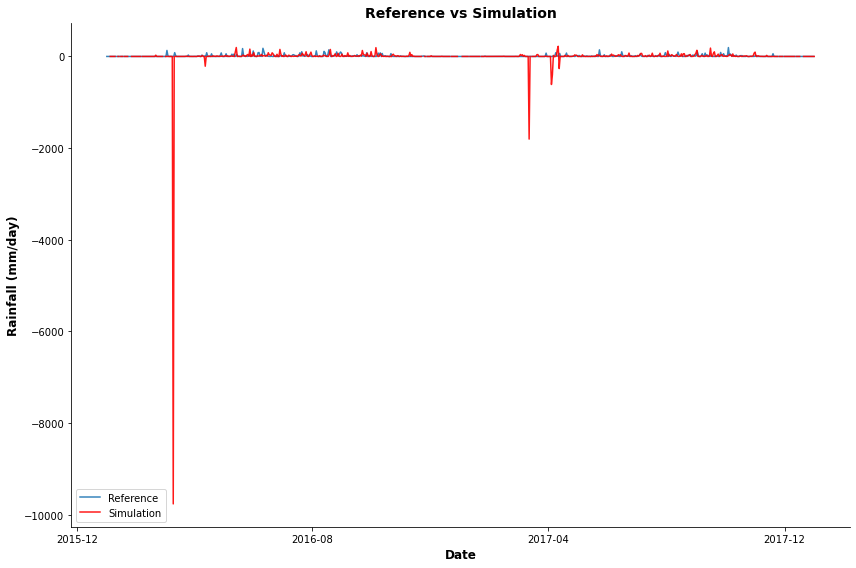

In [45]:
ref_sliced = ds_ref.sel(lat=6.5,lon=8.125,time=slice("2016","2017"))
scenQDM_sliced = scenQDM.sel(lat=6.5,lon=8.125,time=slice("2016","2017"))

# We create a canvas with one ax
fig, axes = plt.subplots(1, 1, figsize=(12,8))

# We plot on our first axis
axes.plot(ref_sliced.time, ref_sliced, alpha=0.9)
axes.plot(scenQDM_sliced.time, scenQDM_sliced, alpha=0.9,c='r')

# Set a title
axes.set_title('Reference vs Simulation',size=14,fontweight='bold')
axes.set_xlabel('Date',size=12,fontweight='semibold')
axes.set_ylabel('Rainfall (mm/day)',size=12,fontweight='semibold')


# Hide the right and top spines
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)

# We tight the layout
fig.tight_layout()

axes.legend(['Reference', 'Simulation'])
# We plot
plt.show()

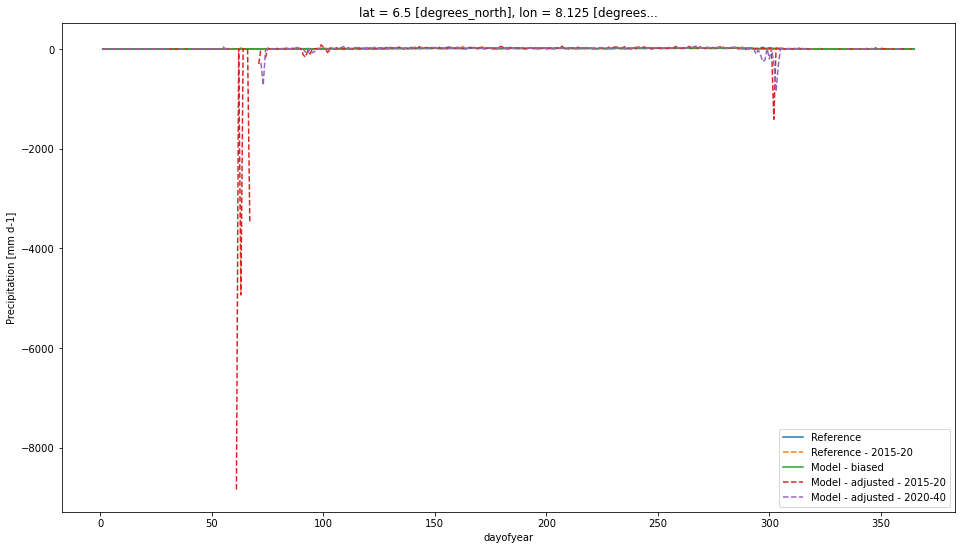

In [46]:
plt.figure(figsize=(16,9))
ref.sel(
    lat=6.5,lon=8.125,time=slice(None,"2015")).groupby(
        "time.dayofyear").mean().plot(label="Reference")
ds_ref.sel(lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
    "time.dayofyear").mean().plot(
        label="Reference - 2015-20", linestyle="--")
hist.sel(
    lat=6.5,lon=8.125,time=slice(None,"2015")).groupby(
        "time.dayofyear").mean().plot(label="Model - biased")
scenQDM.sel(
    lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
        "time.dayofyear").mean().plot(
            label="Model - adjusted - 2015-20", linestyle="--")
scenQDM.sel(lat=6.5,lon=8.125,time=slice("2020", "2040")).groupby(
    "time.dayofyear").mean().plot(
        label="Model - adjusted - 2020-40", linestyle="--")
plt.legend()

In [47]:
# Second Model (Quantile Delta Mapping) for ssp585

scenQDM585 = QDM.adjust(ds_sim585, extrapolation="constant", interp="linear")
scenQDM585

<xarray.DataArray 'scen' (time: 31390, lat: 30, lon: 30)>
array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00, -3.78117452e-05, -6.60893166e-06, ...,
          2.88518705e+00,  3.73216054e-01,  0.00000000e+00],
        [ 0.00000000e+00, -0.00000000e+00, -3.16892264e-07, ...,
          0.00000000e+00,  8.01778262e-05,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  4.22764724e-01,  5.92190822e-01, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  2.54266546e-01,  1.78431014e-01, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00, -1.90133727e-06, -1.54770187e-07, ...,
          3.53082464e+01,  1.88380948e+01,  0.00000000e+00],
        [ 0.00000000e+00, -1.68967148e-06, -2.58389057e-07, ...,
          6.63576920e+00,  3.18680509e+00,  0.00000000e+00],
...
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          9.96886066e-03,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  3.90448701e-03,  1.93737040e-03, ...,
          3.81433676e+00,  1.71547118e+01,  0.00000000e+00],
        [ 0.00000000e+00,  6.83457043e-05,  0.00000000e+00, ...,
          0.00000000e+00,  1.59538143e+01,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  2.95169524e+00,  1.49997699e+00, ...,
          2.03865549e-03,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  4.47737077e+00,  3.79089384e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]])
Coordinates:
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * time     (time) object 2015-01-01 12:00:00 ... 2100-12-31 12:00:00
Attributes:
    long_name:        Precipitation
    units:            mm d-1
    cell_methods:     area: time: mean
    cell_measures:    area: areacella
    standard_name:    precipitation_flux
    interp_method:    conserve_order1
    original_name:    pr
    history:          [2022-04-04 23:21:32] : Bias-adjusted with QuantileDelt...
    bias_adjustment:  QuantileDeltaMapping(group=Grouper(add_dims=[], name='t...

In [48]:
scenQDM_hist.sel(lat=6.5,lon=8.125,time="2014-09-15").values

array([1.53793509])

In [49]:
ds_ref.sel(lat=6.5,lon=8.125,time="2020-09-15").values

array([14.96030223])

In [50]:
scenQDM585.sel(lat=6.5,lon=8.125,time="2020-09-15").values

array([0.02141997])

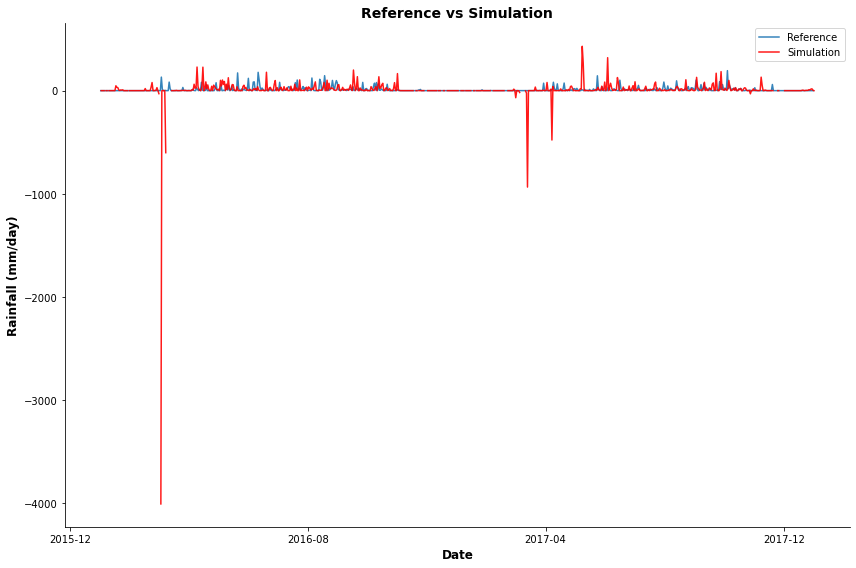

In [51]:
ref_sliced = ds_ref.sel(lat=6.5,lon=8.125,time=slice("2016","2017"))
scenQDM585_sliced = scenQDM585.sel(lat=6.5,lon=8.125,time=slice("2016","2017"))

# We create a canvas with one ax
fig, axes = plt.subplots(1, 1, figsize=(12,8))

# We plot on our first axis
axes.plot(ref_sliced.time, ref_sliced, alpha=0.9)
axes.plot(scenQDM585_sliced.time, scenQDM585_sliced, alpha=0.9,c='r')

# Set a title
axes.set_title('Reference vs Simulation',size=14,fontweight='bold')
axes.set_xlabel('Date',size=12,fontweight='semibold')
axes.set_ylabel('Rainfall (mm/day)',size=12,fontweight='semibold')


# Hide the right and top spines
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)

# We tight the layout
fig.tight_layout()

axes.legend(['Reference', 'Simulation'])
# We plot
plt.show()

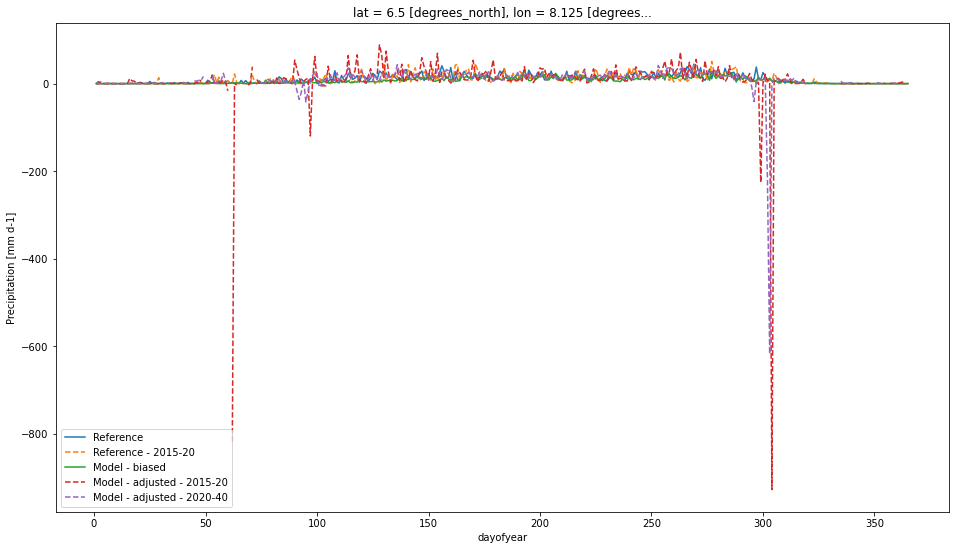

In [52]:
plt.figure(figsize=(16,9))
ref.sel(
    lat=6.5,lon=8.125,time=slice(None,"2015")).groupby(
        "time.dayofyear").mean().plot(label="Reference")
ds_ref.sel(lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
    "time.dayofyear").mean().plot(
        label="Reference - 2015-20", linestyle="--")
hist.sel(
    lat=6.5,lon=8.125,time=slice(None,"2015")).groupby(
        "time.dayofyear").mean().plot(label="Model - biased")
scenQDM585.sel(
    lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
        "time.dayofyear").mean().plot(
            label="Model - adjusted - 2015-20", linestyle="--")
scenQDM585.sel(lat=6.5,lon=8.125,time=slice("2020", "2040")).groupby(
    "time.dayofyear").mean().plot(
        label="Model - adjusted - 2020-40", linestyle="--")
plt.legend()

In [53]:
# Frequency adaptation for pr bias correction

sim_ad, pth, dP0 = sdba.processing.adapt_freq(
    ref, ds_sim, thresh="0.05 mm d-1", group=group_month
)

In [54]:
# train frequency adapt

QM_ad = sdba.EmpiricalQuantileMapping.train(
    ref, sim_ad, nquantiles=15, group=group_month, kind="*"
)

In [55]:
scen_ad = QM_ad.adjust(ds_sim, extrapolation="constant", interp="linear")
scen_ad

<xarray.DataArray 'scen' (time: 31390, lat: 30, lon: 30)>
array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00, -2.22023738e-04, -5.08226366e-05, ...,
          2.23888340e-05,  1.52764098e-03,  0.00000000e+00],
        [ 0.00000000e+00, -0.00000000e+00, -8.87755246e-07, ...,
                    -inf,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  7.08369040e-01,  6.92114177e-01, ...,
                    -inf,            -inf,  0.00000000e+00],
        [ 0.00000000e+00,  3.09323113e-01,  2.81440580e-01, ...,
                    -inf,            -inf,             nan],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
                     nan,             nan,  0.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00, -1.80865627e-05, -2.28433707e-06, ...,
          8.00922853e+00,  2.45074983e+01,  0.00000000e+00],
        [ 0.00000000e+00, -3.72565494e-05, -7.64005929e-07, ...,
          4.52505372e-03,  1.70594084e-01,  0.00000000e+00],
...
        [ 0.00000000e+00,  8.88747693e+00,  7.37694216e+00, ...,
          4.03302675e-05,  8.78290934e-01,  0.00000000e+00],
        [ 0.00000000e+00,  2.47341781e+00,  7.61005354e-01, ...,
          1.47325750e-04,  7.31966308e-01,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  2.92087706e+00,  1.33053354e+00, ...,
                    -inf,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  2.00734102e+01,  1.10906957e+01, ...,
                    -inf,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  2.02833166e+00,  4.26124783e-01, ...,
          6.89424640e-08,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  4.32531736e-03,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]])
Coordinates:
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * time     (time) object 2015-01-01 12:00:00 ... 2100-12-31 12:00:00
Attributes:
    long_name:        Precipitation
    units:            mm d-1
    cell_methods:     area: time: mean
    cell_measures:    area: areacella
    standard_name:    precipitation_flux
    interp_method:    conserve_order1
    original_name:    pr
    history:          [2022-04-04 23:22:00] : Bias-adjusted with EmpiricalQua...
    bias_adjustment:  EmpiricalQuantileMapping(group=Grouper(add_dims=[], nam...

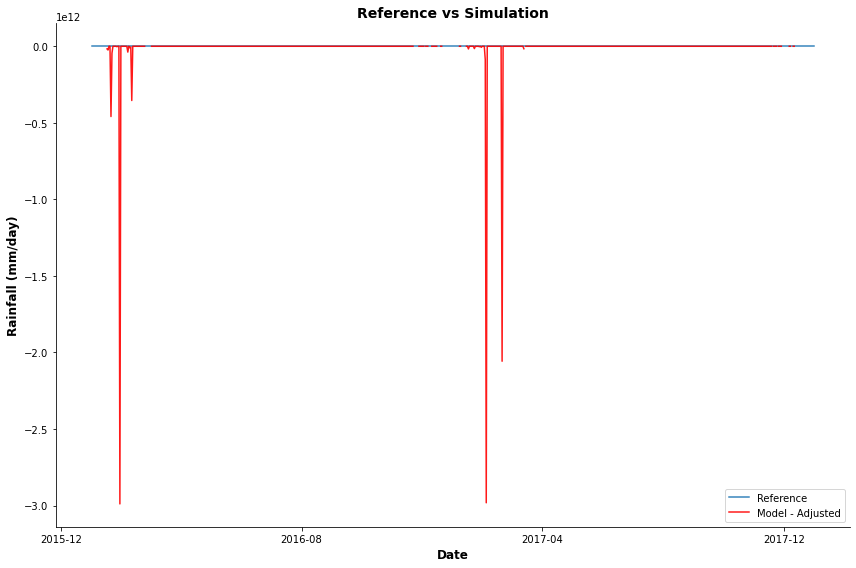

In [56]:
# Plot reference data against adjusted simulation data
ref_sliced = ds_ref.sel(lat=6.5,lon=8.125,time=slice("2016","2017"))
scen_ad_sliced = scen_ad.sel(lat=6.5,lon=8.125,time=slice("2016","2017"))

# We create a canvas with one ax
fig, axes = plt.subplots(1, 1, figsize=(12,8))

# We plot on our first axis
axes.plot(ref_sliced.time, ref_sliced, alpha=0.9)
axes.plot(scen_ad_sliced.time, scen_ad_sliced, alpha=0.9,c='r')

# Set a title
axes.set_title('Reference vs Simulation',size=14,fontweight='bold')
axes.set_xlabel('Date',size=12,fontweight='semibold')
axes.set_ylabel('Rainfall (mm/day)',size=12,fontweight='semibold')


# Hide the right and top spines
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)

# We tight the layout
fig.tight_layout()

axes.legend(['Reference', 'Model - Adjusted'])
# We plot
plt.show()

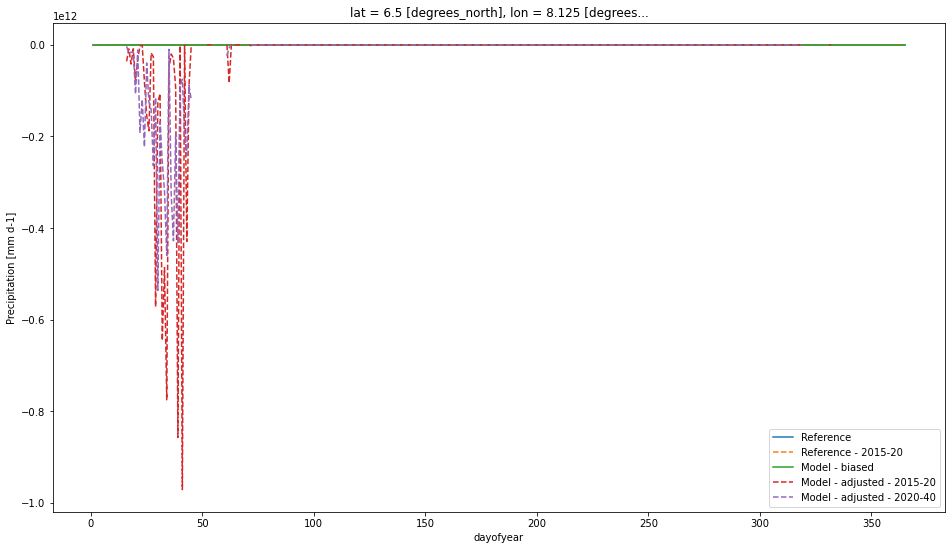

In [57]:
# Plot multiple line graph
plt.figure(figsize=(16,9))
ref.sel(
    lat=6.5,lon=8.125,time=slice(None,"2015")).groupby(
        "time.dayofyear").mean().plot(label="Reference")
ds_ref.sel(lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
    "time.dayofyear").mean().plot(
        label="Reference - 2015-20", linestyle="--")
hist.sel(
    lat=6.5,lon=8.125,time=slice(None,"2015")).groupby(
        "time.dayofyear").mean().plot(label="Model - biased")
scen_ad.sel(
    lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
        "time.dayofyear").mean().plot(
            label="Model - adjusted - 2015-20", linestyle="--")
scen_ad.sel(lat=6.5,lon=8.125,time=slice("2020", "2040")).groupby(
    "time.dayofyear").mean().plot(
        label="Model - adjusted - 2020-40", linestyle="--")
plt.legend()

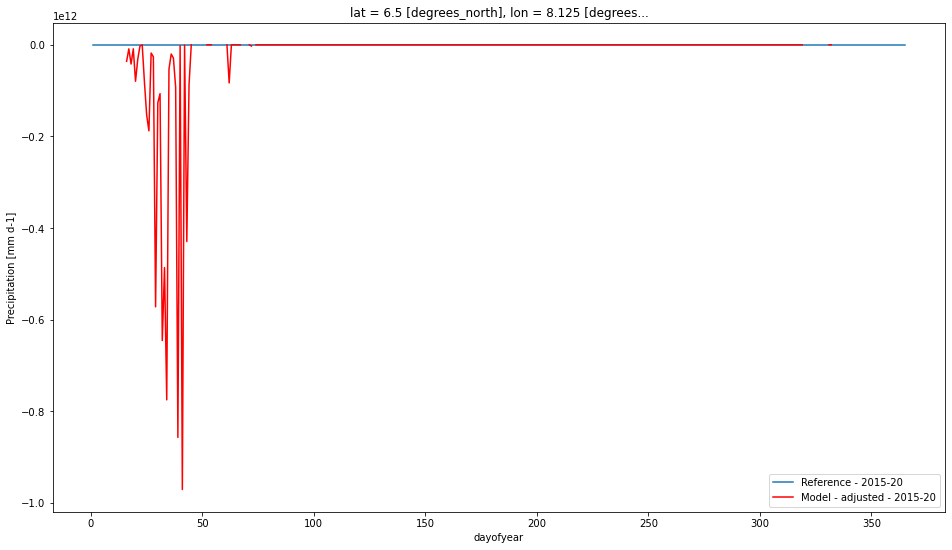

In [58]:
plt.figure(figsize=(16,9))

ds_ref.sel(lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
    "time.dayofyear").mean().plot(
        label="Reference - 2015-20")
scen_ad.sel(
    lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
        "time.dayofyear").mean().plot(
            label="Model - adjusted - 2015-20",c='r')

plt.legend()

In [59]:
ds_ref.sel(lat=6.5,lon=8.125,time="2020-09-15").values

array([14.96030223])

In [60]:
scen_ad.sel(lat=6.5,lon=8.125,time="2020-09-15").values

array([12.5294747])

In [61]:
QM_ad.ds

<xarray.Dataset>
Dimensions:    (quantiles: 15, lat: 30, lon: 30, month: 12)
Coordinates:
  * quantiles  (quantiles) float64 0.03333 0.1 0.1667 ... 0.8333 0.9 0.9667
  * lat        (lat) float64 1.5 2.5 3.5 4.5 5.5 ... 26.5 27.5 28.5 29.5 30.5
  * lon        (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    af         (lat, lon, month, quantiles) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    hist_q     (lat, lon, month, quantiles) float64 0.00266 0.03753 ... 1.077
Attributes:
    group:               time.month
    group_compute_dims:  ['time']
    group_window:        1
    _xclim_adjustment:   {"py/object": "xclim.sdba.adjustment.EmpiricalQuanti...
    adj_params:          EmpiricalQuantileMapping(group=Grouper(add_dims=[], ...

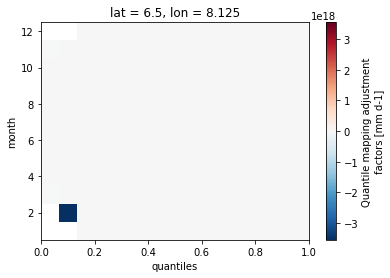

In [62]:
QM_ad.ds.sel(lat=6.5,lon=8.125).af.plot()

In [63]:
# Empirical Quantile Mapping Adjustment with frequency adapt for ssp585
# Frequency adaptation for pr bias correction

sim585_ad, pth, dP0 = sdba.processing.adapt_freq(
    ref, ds_sim585, thresh="0.05 mm d-1", group=group_month
)

In [64]:
# train frequency adapt

QM585_ad = sdba.EmpiricalQuantileMapping.train(
    ref, sim585_ad, nquantiles=15, group=group_month, kind="*"
)

In [65]:
scen585_ad = QM585_ad.adjust(ds_sim585, extrapolation="constant", interp="linear")
scen585_ad

<xarray.DataArray 'scen' (time: 31390, lat: 30, lon: 30)>
array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00, -5.45338650e-04, -1.56865578e-04, ...,
          7.66846062e-02,  1.37528725e-03,  0.00000000e+00],
        [ 0.00000000e+00, -0.00000000e+00, -1.96817725e-06, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  6.59711393e-01,  7.54727460e-01, ...,
                    -inf,            -inf,  0.00000000e+00],
        [ 0.00000000e+00,  3.59418144e-01,  3.16282233e-01, ...,
                    -inf,            -inf,             nan],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,             nan]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00, -2.52626459e-05, -4.06850951e-06, ...,
          2.72925252e+01,  2.42169413e+01,  0.00000000e+00],
        [ 0.00000000e+00, -5.20405899e-05, -1.78567309e-06, ...,
          6.10983939e-03,  1.22119150e-02,  0.00000000e+00],
...
        [ 0.00000000e+00,  1.11481107e-06,            -inf, ...,
          0.00000000e+00,            -inf,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,            -inf,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  5.40786913e-01,  3.89577931e-01, ...,
          1.80066416e-01,  5.77020650e+00,  0.00000000e+00],
        [ 0.00000000e+00,  5.39555384e-03,  1.97629410e-07, ...,
          0.00000000e+00,  6.36562913e-02,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  6.55329069e+00,  2.33021013e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  8.79544889e+00,  7.07771349e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]])
Coordinates:
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * time     (time) object 2015-01-01 12:00:00 ... 2100-12-31 12:00:00
Attributes:
    long_name:        Precipitation
    units:            mm d-1
    cell_methods:     area: time: mean
    cell_measures:    area: areacella
    standard_name:    precipitation_flux
    interp_method:    conserve_order1
    original_name:    pr
    history:          [2022-04-04 23:22:29] : Bias-adjusted with EmpiricalQua...
    bias_adjustment:  EmpiricalQuantileMapping(group=Grouper(add_dims=[], nam...

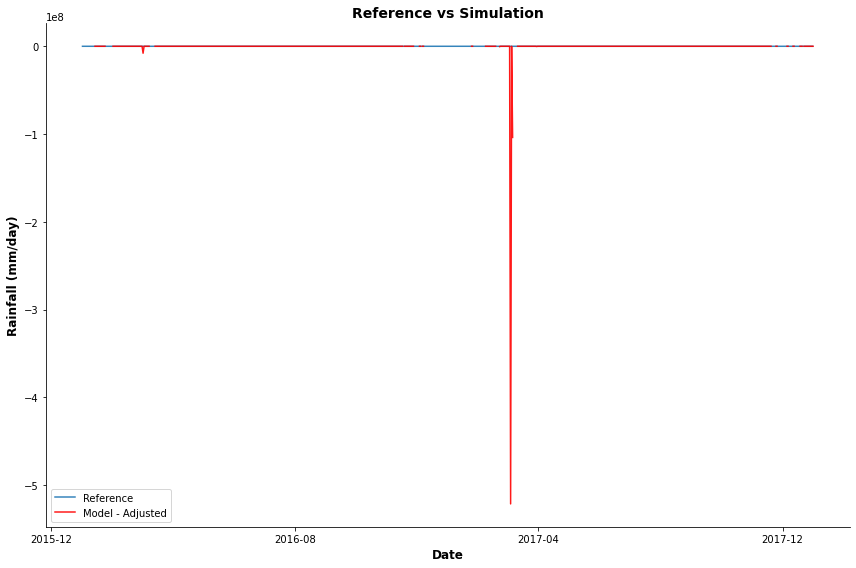

In [66]:
# Plot reference data against adjusted simulation data
ref_sliced = ds_ref.sel(lat=6.5,lon=8.125,time=slice("2016","2017"))
scen_ad_sliced = scen585_ad.sel(lat=6.5,lon=8.125,time=slice("2016","2017"))

# We create a canvas with one ax
fig, axes = plt.subplots(1, 1, figsize=(12,8))

# We plot on our first axis
axes.plot(ref_sliced.time, ref_sliced, alpha=0.9)
axes.plot(scen_ad_sliced.time, scen_ad_sliced, alpha=0.9,c='r')

# Set a title
axes.set_title('Reference vs Simulation',size=14,fontweight='bold')
axes.set_xlabel('Date',size=12,fontweight='semibold')
axes.set_ylabel('Rainfall (mm/day)',size=12,fontweight='semibold')


# Hide the right and top spines
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)

# We tight the layout
fig.tight_layout()

axes.legend(['Reference', 'Model - Adjusted'])
# We plot
plt.show()

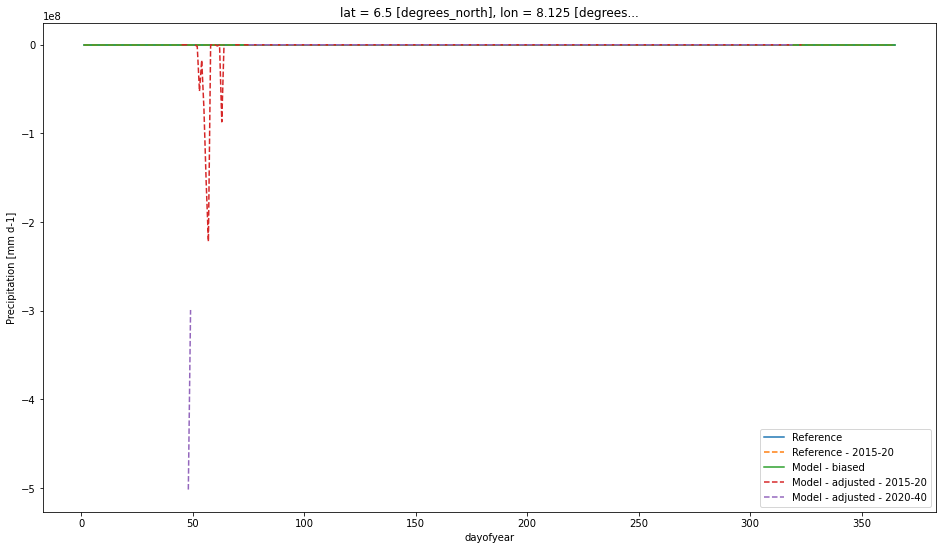

In [67]:
# Plot multiple line graph
plt.figure(figsize=(16,9))
ref.sel(
    lat=6.5,lon=8.125,time=slice(None,"2015")).groupby(
        "time.dayofyear").mean().plot(label="Reference")
ds_ref.sel(lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
    "time.dayofyear").mean().plot(
        label="Reference - 2015-20", linestyle="--")
hist.sel(
    lat=6.5,lon=8.125,time=slice(None,"2015")).groupby(
        "time.dayofyear").mean().plot(label="Model - biased")
scen585_ad.sel(
    lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
        "time.dayofyear").mean().plot(
            label="Model - adjusted - 2015-20", linestyle="--")
scen585_ad.sel(lat=6.5,lon=8.125,time=slice("2020", "2040")).groupby(
    "time.dayofyear").mean().plot(
        label="Model - adjusted - 2020-40", linestyle="--")
plt.legend()

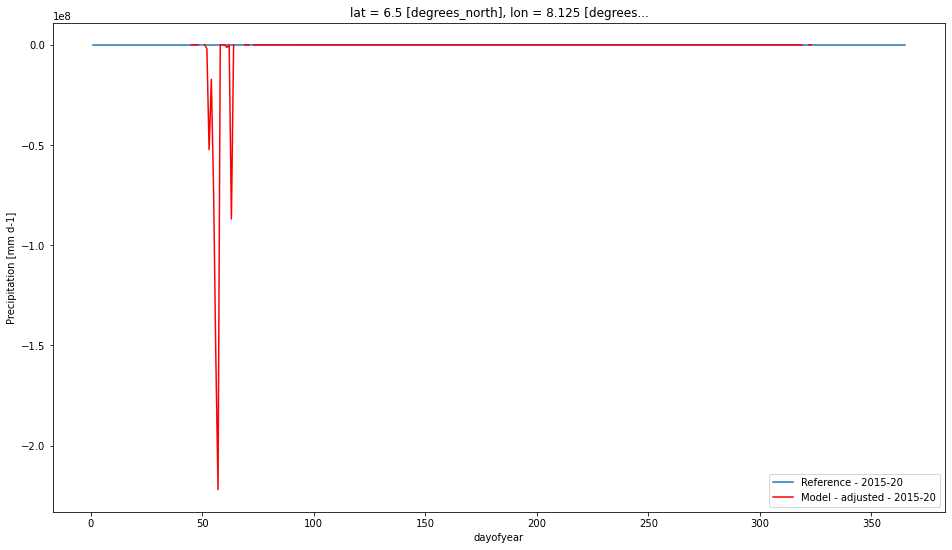

In [68]:
plt.figure(figsize=(16,9))

ds_ref.sel(lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
    "time.dayofyear").mean().plot(
        label="Reference - 2015-20")
scen585_ad.sel(
    lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
        "time.dayofyear").mean().plot(
            label="Model - adjusted - 2015-20",c='r')

plt.legend()

In [69]:
ds_ref.sel(lat=6.5,lon=8.125,time="2020-09-15").values

array([14.96030223])

In [70]:
scen585_ad.sel(lat=6.5,lon=8.125,time="2020-09-15").values

array([0.04456592])

In [71]:
# Second Model (Quantile Delta Mapping)

In [72]:
# We want to group data on a day-of-year basis with a 31-day moving window
group_month = xclim.sdba.Grouper('time.month')

In [73]:
QDM_ad = sdba.QuantileDeltaMapping.train(
    ref, sim_ad, nquantiles=15, group=group_month, kind="*"
)

In [74]:
scenQDM_ad = QDM_ad.adjust(ds_sim, extrapolation="constant", interp="linear")
scenQDM_ad

<xarray.DataArray 'scen' (time: 31390, lat: 30, lon: 30)>
array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00, -2.04140716e-04, -5.08226366e-05, ...,
          4.56802549e-03,  6.66933915e-02,  0.00000000e+00],
        [ 0.00000000e+00, -0.00000000e+00, -8.87755246e-07, ...,
          0.00000000e+00,  2.04665716e-07,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  6.98433849e-01,  6.89816439e-01, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  2.64059384e-01,  2.13217448e-01, ...,
          0.00000000e+00,  0.00000000e+00,             nan],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
                     nan,  0.00000000e+00,  0.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00, -1.80865627e-05, -2.28433707e-06, ...,
          8.48163302e+00,  2.46104174e+01,  0.00000000e+00],
        [ 0.00000000e+00, -3.72565494e-05, -7.64005929e-07, ...,
          1.10719001e+00,  2.78112316e+00,  0.00000000e+00],
...
        [ 0.00000000e+00,  9.23974456e+00,  7.44904946e+00, ...,
          4.73611227e-02,  1.52179337e+00,  0.00000000e+00],
        [ 0.00000000e+00,  2.48763549e+00,  7.96056704e-01, ...,
          6.53994068e-02,  2.45569324e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  7.53495711e-01,  3.19480635e-01, ...,
                    -inf,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  1.68006005e+01,  8.50987668e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  2.33277648e+00,  4.43740752e-01, ...,
          7.20319493e-04,  1.10717778e-01,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          3.93460536e-04,  1.45480353e-01,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]])
Coordinates:
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * time     (time) object 2015-01-01 12:00:00 ... 2100-12-31 12:00:00
Attributes:
    long_name:        Precipitation
    units:            mm d-1
    cell_methods:     area: time: mean
    cell_measures:    area: areacella
    standard_name:    precipitation_flux
    interp_method:    conserve_order1
    original_name:    pr
    history:          [2022-04-04 23:22:53] : Bias-adjusted with QuantileDelt...
    bias_adjustment:  QuantileDeltaMapping(group=Grouper(add_dims=[], name='t...

In [75]:
ds_ref.sel(lat=6.5,lon=8.125,time="2020-09-15").values

array([14.96030223])

In [76]:
scenQDM_ad.sel(lat=6.5,lon=8.125,time="2020-09-15").values

array([12.57514572])

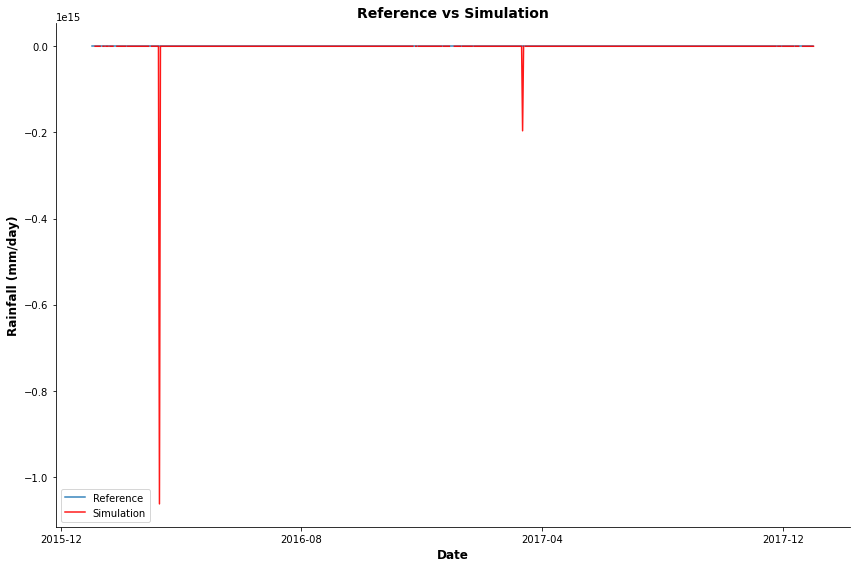

In [77]:
ref_sliced = ds_ref.sel(lat=6.5,lon=8.125,time=slice("2016","2017"))
scenQDM_sliced = scenQDM_ad.sel(lat=6.5,lon=8.125,time=slice("2016","2017"))

# We create a canvas with one ax
fig, axes = plt.subplots(1, 1, figsize=(12,8))

# We plot on our first axis
axes.plot(ref_sliced.time, ref_sliced, alpha=0.9)
axes.plot(scenQDM_sliced.time, scenQDM_sliced, alpha=0.9,c='r')

# Set a title
axes.set_title('Reference vs Simulation',size=14,fontweight='bold')
axes.set_xlabel('Date',size=12,fontweight='semibold')
axes.set_ylabel('Rainfall (mm/day)',size=12,fontweight='semibold')


# Hide the right and top spines
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)

# We tight the layout
fig.tight_layout()

axes.legend(['Reference', 'Simulation'])
# We plot
plt.show()

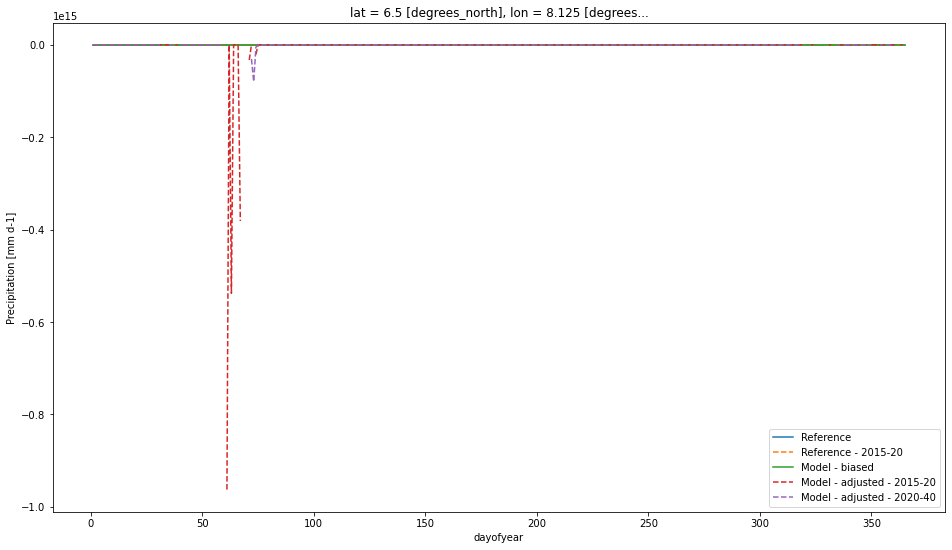

In [78]:
plt.figure(figsize=(16,9))
ref.sel(
    lat=6.5,lon=8.125,time=slice(None,"2015")).groupby(
        "time.dayofyear").mean().plot(label="Reference")
ds_ref.sel(lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
    "time.dayofyear").mean().plot(
        label="Reference - 2015-20", linestyle="--")
hist.sel(
    lat=6.5,lon=8.125,time=slice(None,"2015")).groupby(
        "time.dayofyear").mean().plot(label="Model - biased")
scenQDM_ad.sel(
    lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
        "time.dayofyear").mean().plot(
            label="Model - adjusted - 2015-20", linestyle="--")
scenQDM_ad.sel(lat=6.5,lon=8.125,time=slice("2020", "2040")).groupby(
    "time.dayofyear").mean().plot(
        label="Model - adjusted - 2020-40", linestyle="--")
plt.legend()

In [79]:
# Frequenct adapt for pr (Quantile Delta Mapping) for ssp585
# Frequency adaptation for pr bias correction

sim585_ad, pth, dP0 = sdba.processing.adapt_freq(
    ref, ds_sim585, thresh="0.05 mm d-1", group=group_month
)

In [80]:
# train frequency adapt

QDM585_ad = sdba.EmpiricalQuantileMapping.train(
    ref, sim585_ad, nquantiles=15, group=group_month, kind="*"
)

In [81]:
scenQDM585_ad = QDM585_ad.adjust(ds_sim585, extrapolation="constant", interp="linear")
scenQDM585_ad

<xarray.DataArray 'scen' (time: 31390, lat: 30, lon: 30)>
array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00, -5.45338650e-04, -1.56865578e-04, ...,
          7.81067674e-02,  1.38056135e-03,  0.00000000e+00],
        [ 0.00000000e+00, -0.00000000e+00, -1.96817725e-06, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  6.59711393e-01,  7.54727460e-01, ...,
                    -inf,            -inf,  0.00000000e+00],
        [ 0.00000000e+00,  3.59418144e-01,  3.16282233e-01, ...,
                    -inf,            -inf,             nan],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,             nan]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00, -2.52626459e-05, -4.06850951e-06, ...,
          2.72925252e+01,  2.42169413e+01,  0.00000000e+00],
        [ 0.00000000e+00, -5.20405899e-05, -1.78567309e-06, ...,
          5.35857537e-03,  1.39156681e-02,  0.00000000e+00],
...
        [ 0.00000000e+00,  1.11481107e-06,            -inf, ...,
          0.00000000e+00,            -inf,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,            -inf,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  5.40786913e-01,  3.89577931e-01, ...,
          1.81886822e-01,  5.57380896e+00,  0.00000000e+00],
        [ 0.00000000e+00,  5.39555384e-03,  1.97629410e-07, ...,
          0.00000000e+00,  6.68066258e-02,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  6.55329069e+00,  2.33021013e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  8.79544889e+00,  7.07771349e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]])
Coordinates:
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * time     (time) object 2015-01-01 12:00:00 ... 2100-12-31 12:00:00
Attributes:
    long_name:        Precipitation
    units:            mm d-1
    cell_methods:     area: time: mean
    cell_measures:    area: areacella
    standard_name:    precipitation_flux
    interp_method:    conserve_order1
    original_name:    pr
    history:          [2022-04-04 23:23:21] : Bias-adjusted with EmpiricalQua...
    bias_adjustment:  EmpiricalQuantileMapping(group=Grouper(add_dims=[], nam...

In [82]:
ds_ref.sel(lat=6.5,lon=8.125,time="2020-09-15").values

array([14.96030223])

In [83]:
scenQDM585_ad.sel(lat=6.5,lon=8.125,time="2020-09-15").values

array([0.04456592])

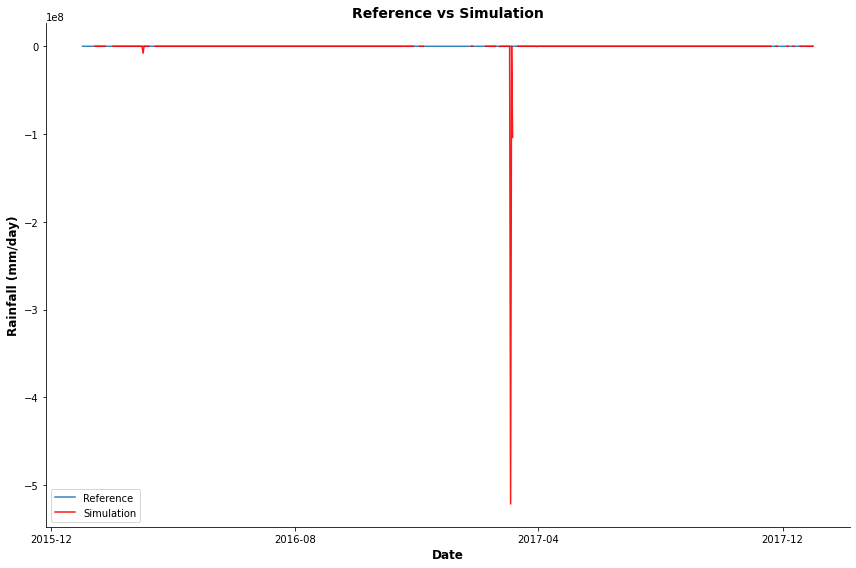

In [84]:
ref_sliced = ds_ref.sel(lat=6.5,lon=8.125,time=slice("2016","2017"))
scenQDM585_ad_sliced = scenQDM585_ad.sel(lat=6.5,lon=8.125,time=slice("2016","2017"))

# We create a canvas with one ax
fig, axes = plt.subplots(1, 1, figsize=(12,8))

# We plot on our first axis
axes.plot(ref_sliced.time, ref_sliced, alpha=0.9)
axes.plot(scenQDM585_ad_sliced.time, scenQDM585_ad_sliced, alpha=0.9,c='r')

# Set a title
axes.set_title('Reference vs Simulation',size=14,fontweight='bold')
axes.set_xlabel('Date',size=12,fontweight='semibold')
axes.set_ylabel('Rainfall (mm/day)',size=12,fontweight='semibold')


# Hide the right and top spines
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)

# We tight the layout
fig.tight_layout()

axes.legend(['Reference', 'Simulation'])
# We plot
plt.show()

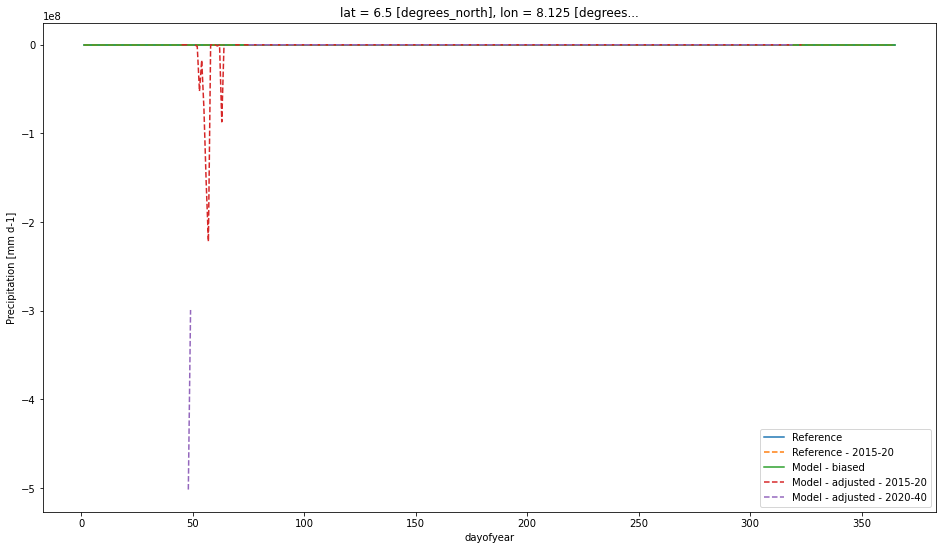

In [85]:
plt.figure(figsize=(16,9))
ref.sel(
    lat=6.5,lon=8.125,time=slice(None,"2015")).groupby(
        "time.dayofyear").mean().plot(label="Reference")
ds_ref.sel(lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
    "time.dayofyear").mean().plot(
        label="Reference - 2015-20", linestyle="--")
hist.sel(
    lat=6.5,lon=8.125,time=slice(None,"2015")).groupby(
        "time.dayofyear").mean().plot(label="Model - biased")
scenQDM585_ad.sel(
    lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
        "time.dayofyear").mean().plot(
            label="Model - adjusted - 2015-20", linestyle="--")
scenQDM585_ad.sel(lat=6.5,lon=8.125,time=slice("2020", "2040")).groupby(
    "time.dayofyear").mean().plot(
        label="Model - adjusted - 2020-40", linestyle="--")
plt.legend()

In [86]:
# Local Intensity Scaling bias-adjustment
# We want to group data on a day-of-year basis with a 31-day moving window
group_month = xclim.sdba.Grouper('time.month')

In [87]:
LOCI = sdba.LOCI.train(
    ref, hist, thresh="1.00 mm d-1", group=group_month
)

In [88]:
scenLOCI = LOCI.adjust(ds_sim, interp="linear")
scenLOCI

<xarray.DataArray 'scen' (time: 31390, lat: 30, lon: 30)>
array([[[           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan, 0.00000000e+00, ...,
         2.99195242e-01, 0.00000000e+00,            nan],
        ...,
        [           nan,            nan, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00,            nan],
        [           nan,            nan, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan]],

       [[           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan, 0.00000000e+00, ...,
         2.95777213e+00, 8.42900653e+00,            nan],
...
        [           nan,            nan, 6.54230851e+00, ...,
         0.00000000e+00, 2.17245914e+00,            nan],
        [           nan,            nan, 0.00000000e+00, ...,
         0.00000000e+00, 2.40361887e+00,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan]],

       [[           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan, 6.10317017e+00, ...,
         3.36033316e-01, 3.73299350e-02,            nan],
        ...,
        [           nan,            nan, 0.00000000e+00, ...,
         0.00000000e+00, 2.31794662e-01,            nan],
        [           nan,            nan, 0.00000000e+00, ...,
         0.00000000e+00, 4.98843255e-02,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan]]])
Coordinates:
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * time     (time) object 2015-01-01 12:00:00 ... 2100-12-31 12:00:00
Attributes:
    long_name:        Precipitation
    units:            mm d-1
    cell_methods:     area: time: mean
    cell_measures:    area: areacella
    standard_name:    precipitation_flux
    interp_method:    conserve_order1
    original_name:    pr
    history:          [2022-04-04 23:23:34] : Bias-adjusted with LOCI(group=G...
    bias_adjustment:  LOCI(group=Grouper(add_dims=[], name='time.month', wind...

In [89]:
scenLOCI_hist = LOCI.adjust(ds_hist, interp="linear")
scenLOCI_hist

<xarray.DataArray 'scen' (time: 60225, lat: 30, lon: 30)>
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan, 0.        , ..., 0.30971327,
         0.27174771,        nan],
        ...,
        [       nan,        nan, 0.        , ..., 0.        ,
         0.        ,        nan],
        [       nan,        nan, 0.        , ..., 0.        ,
         0.        ,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan, 0.        , ..., 0.2626902 ,
         0.        ,        nan],
...
        [       nan,        nan, 0.        , ..., 0.        ,
         0.        ,        nan],
        [       nan,        nan, 0.        , ..., 0.        ,
         0.        ,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan, 0.        , ..., 0.33597666,
         0.036843  ,        nan],
        ...,
        [       nan,        nan, 0.        , ..., 0.        ,
         0.        ,        nan],
        [       nan,        nan, 0.        , ..., 0.        ,
         0.        ,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]]])
Coordinates:
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * time     (time) object 1850-01-01 12:00:00 ... 2014-12-31 12:00:00
Attributes:
    long_name:        Precipitation
    units:            mm d-1
    cell_methods:     area: time: mean
    cell_measures:    area: areacella
    standard_name:    precipitation_flux
    interp_method:    conserve_order1
    original_name:    pr
    history:          [2022-04-04 23:23:45] : Bias-adjusted with LOCI(group=G...
    bias_adjustment:  LOCI(group=Grouper(add_dims=[], name='time.month', wind...

In [90]:
scenLOCI_hist.sel(lat=6.5,lon=8.125,time="2014-09-15").values

array([1.82614155])

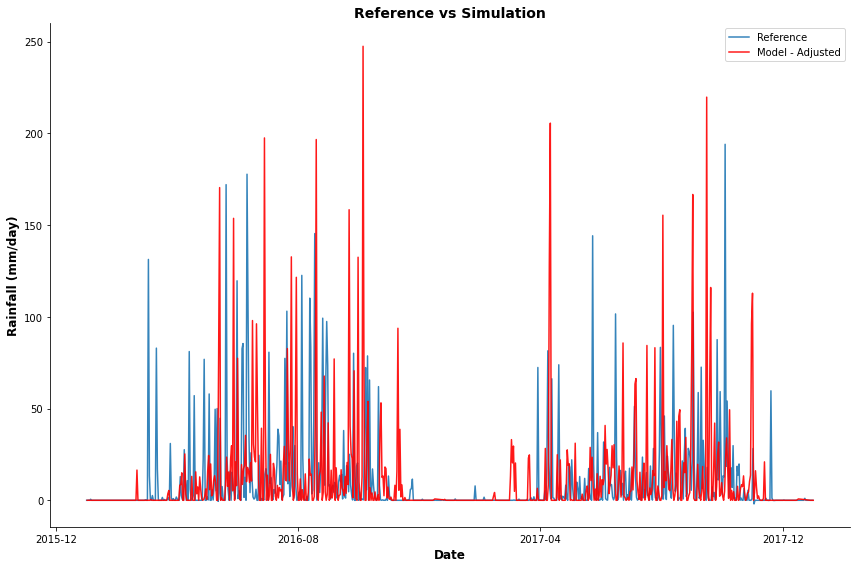

In [91]:
# Plot reference data against adjusted simulation data
ref_sliced = ds_ref.sel(lat=6.5,lon=8.125,time=slice("2016","2017"))
scenLOCI_sliced = scenLOCI.sel(lat=6.5,lon=8.125,time=slice("2016","2017"))

# We create a canvas with one ax
fig, axes = plt.subplots(1, 1, figsize=(12,8))

# We plot on our first axis
axes.plot(ref_sliced.time, ref_sliced, alpha=0.9)
axes.plot(scenLOCI_sliced.time, scenLOCI_sliced, alpha=0.9,c='r')

# Set a title
axes.set_title('Reference vs Simulation',size=14,fontweight='bold')
axes.set_xlabel('Date',size=12,fontweight='semibold')
axes.set_ylabel('Rainfall (mm/day)',size=12,fontweight='semibold')


# Hide the right and top spines
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)

# We tight the layout
fig.tight_layout()

axes.legend(['Reference', 'Model - Adjusted'])
# We plot
plt.show()

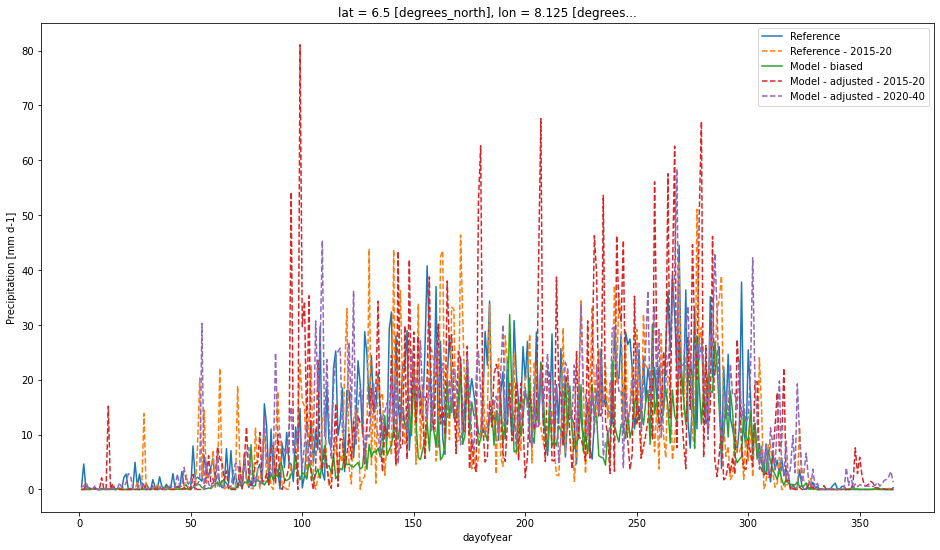

In [92]:
# Plot multiple line graph
plt.figure(figsize=(16,9))
ref.sel(
    lat=6.5,lon=8.125,time=slice(None,"2015")).groupby(
        "time.dayofyear").mean().plot(label="Reference")
ds_ref.sel(lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
    "time.dayofyear").mean().plot(
        label="Reference - 2015-20", linestyle="--")
hist.sel(
    lat=6.5,lon=8.125,time=slice(None,"2015")).groupby(
        "time.dayofyear").mean().plot(label="Model - biased")
scenLOCI.sel(
    lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
        "time.dayofyear").mean().plot(
            label="Model - adjusted - 2015-20", linestyle="--")
scenLOCI.sel(lat=6.5,lon=8.125,time=slice("2020", "2040")).groupby(
    "time.dayofyear").mean().plot(
        label="Model - adjusted - 2020-40", linestyle="--")
plt.legend()

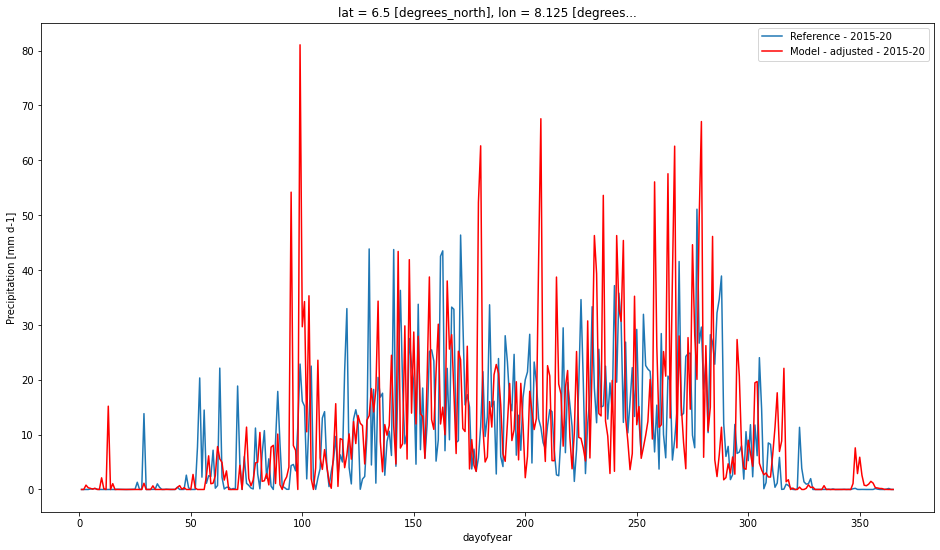

In [93]:
plt.figure(figsize=(16,9))

ds_ref.sel(lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
    "time.dayofyear").mean().plot(
        label="Reference - 2015-20")
scenLOCI.sel(
    lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
        "time.dayofyear").mean().plot(
            label="Model - adjusted - 2015-20",c='r')

plt.legend()

In [94]:
ds_ref.sel(lat=6.5,lon=8.125,time="2020-09-15").values

array([14.96030223])

In [95]:
scenLOCI.sel(lat=6.5,lon=8.125,time="2020-09-15").values

array([8.78908008])

In [96]:
LOCI.ds

<xarray.Dataset>
Dimensions:      (lon: 30, lat: 30, month: 12)
Coordinates:
  * lon          (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * lat          (lat) float64 1.5 2.5 3.5 4.5 5.5 ... 26.5 27.5 28.5 29.5 30.5
  * month        (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    af           (lat, lon, month) float64 nan nan nan nan ... nan nan nan nan
    hist_thresh  (lat, lon, month) float32 34.15 54.21 141.2 ... 7.049 6.93
Attributes:
    _xclim_adjustment:  {"py/object": "xclim.sdba.adjustment.LOCI", "py/state...
    adj_params:         LOCI(group=Grouper(add_dims=[], name='time.month', wi...

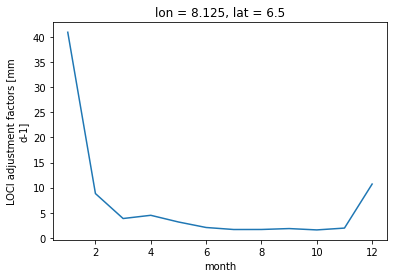

In [97]:
LOCI.ds.sel(lat=6.5,lon=8.125).af.plot()

In [98]:
# Empirical Quantile Mapping Adjustment for ssp585

scenLOCI585 = LOCI.adjust(ds_sim585, interp="linear")
scenLOCI585

<xarray.DataArray 'scen' (time: 31390, lat: 30, lon: 30)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,  0.        , ...,  0.29922065,
          0.        ,         nan],
        ...,
        [        nan,         nan,  0.        , ...,  0.        ,
          0.        ,         nan],
        [        nan,         nan,  0.        , ...,  0.        ,
          0.        ,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,  0.        , ...,  3.0090222 ,
          4.86745119,         nan],
...
        [        nan,         nan,  0.        , ...,  0.        ,
          0.        ,         nan],
        [        nan,         nan,  0.        , ...,  0.        ,
          0.        ,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,  0.        , ...,  0.33622292,
          7.37580838,         nan],
        ...,
        [        nan,         nan,  1.22100643, ...,  0.        ,
          0.        ,         nan],
        [        nan,         nan,  5.64406716, ...,  0.        ,
          0.        ,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]])
Coordinates:
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * time     (time) object 2015-01-01 12:00:00 ... 2100-12-31 12:00:00
Attributes:
    long_name:        Precipitation
    units:            mm d-1
    cell_methods:     area: time: mean
    cell_measures:    area: areacella
    standard_name:    precipitation_flux
    interp_method:    conserve_order1
    original_name:    pr
    history:          [2022-04-04 23:23:56] : Bias-adjusted with LOCI(group=G...
    bias_adjustment:  LOCI(group=Grouper(add_dims=[], name='time.month', wind...

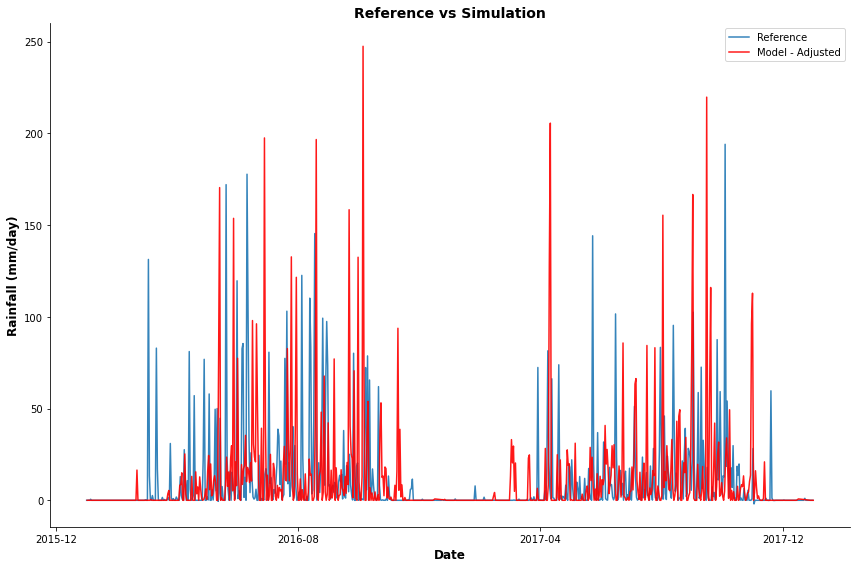

In [99]:
# Plot reference data against adjusted simulation data
ref_sliced = ds_ref.sel(lat=6.5,lon=8.125,time=slice("2016","2017"))
scenLOCI585_sliced = scenLOCI585.sel(lat=6.5,lon=8.125,time=slice("2016","2017"))

# We create a canvas with one ax
fig, axes = plt.subplots(1, 1, figsize=(12,8))

# We plot on our first axis
axes.plot(ref_sliced.time, ref_sliced, alpha=0.9)
axes.plot(scenLOCI_sliced.time, scenLOCI_sliced, alpha=0.9,c='r')

# Set a title
axes.set_title('Reference vs Simulation',size=14,fontweight='bold')
axes.set_xlabel('Date',size=12,fontweight='semibold')
axes.set_ylabel('Rainfall (mm/day)',size=12,fontweight='semibold')


# Hide the right and top spines
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)

# We tight the layout
fig.tight_layout()

axes.legend(['Reference', 'Model - Adjusted'])
# We plot
plt.show()

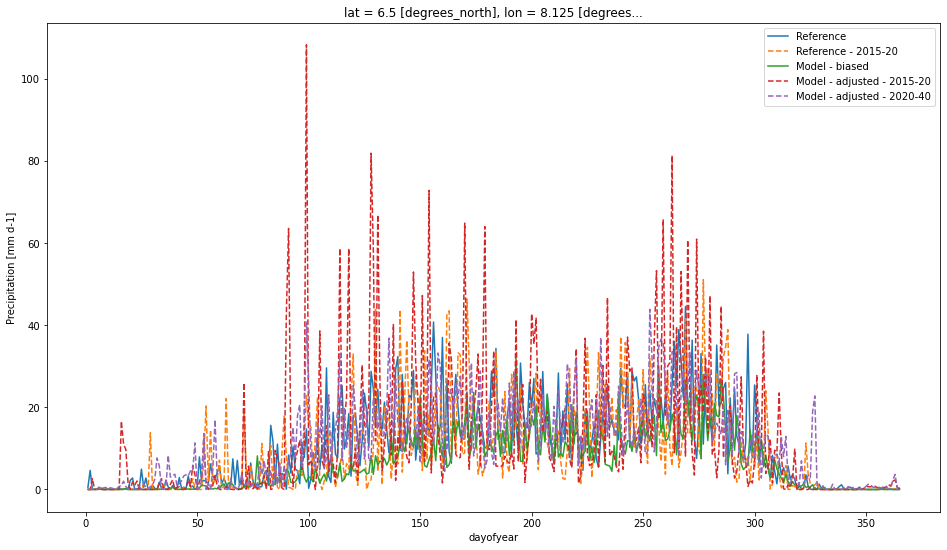

In [100]:
# Plot multiple line graph
plt.figure(figsize=(16,9))
ref.sel(
    lat=6.5,lon=8.125,time=slice(None,"2015")).groupby(
        "time.dayofyear").mean().plot(label="Reference")
ds_ref.sel(lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
    "time.dayofyear").mean().plot(
        label="Reference - 2015-20", linestyle="--")
hist.sel(
    lat=6.5,lon=8.125,time=slice(None,"2015")).groupby(
        "time.dayofyear").mean().plot(label="Model - biased")
scenLOCI585.sel(
    lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
        "time.dayofyear").mean().plot(
            label="Model - adjusted - 2015-20", linestyle="--")
scenLOCI585.sel(lat=6.5,lon=8.125,time=slice("2020", "2040")).groupby(
    "time.dayofyear").mean().plot(
        label="Model - adjusted - 2020-40", linestyle="--")
plt.legend()

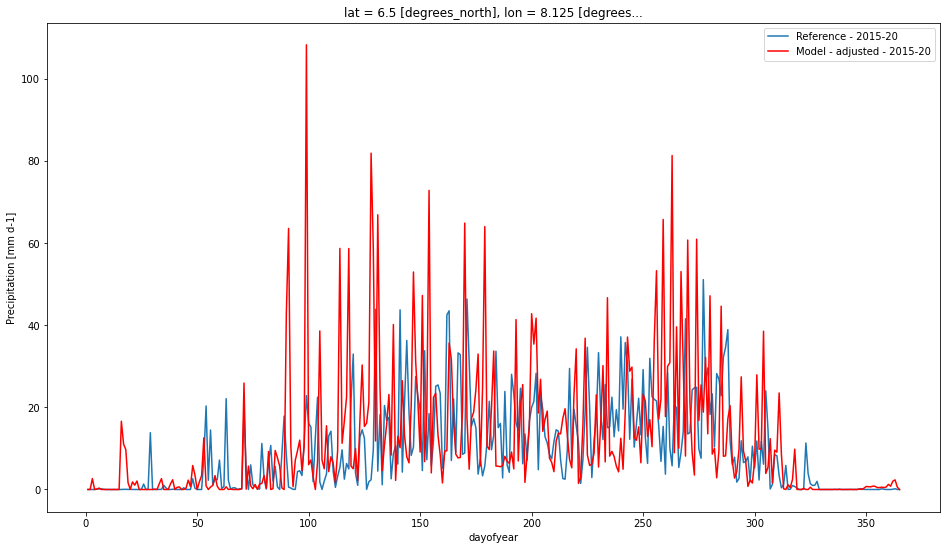

In [101]:
plt.figure(figsize=(16,9))

ds_ref.sel(lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
    "time.dayofyear").mean().plot(
        label="Reference - 2015-20")
scenLOCI585.sel(
    lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
        "time.dayofyear").mean().plot(
            label="Model - adjusted - 2015-20",c='r')

plt.legend()

In [102]:
ds_ref.sel(lat=6.5,lon=8.125,time="2020-09-15").values

array([14.96030223])

In [103]:
scenLOCI585.sel(lat=6.5,lon=8.125,time="2020-09-15").values

array([0.])

In [104]:
# lenght of dataarray before conversion
print((f'lenght of Projection Model Adjusted data is : {len(scen.time.values)}'))
scen.time[59].data

lenght of Projection Model Adjusted data is : 31390


array(cftime.DatetimeNoLeap(2015, 3, 1, 12, 0, 0, 0, has_year_zero=True),
      dtype=object)

In [105]:
# Calendar conversion

# Convert the Projection Model Adjusted Simulation data to `Standard` calendar
scen_with_missing = xclim.core.calendar.convert_calendar(
    scen, 'standard', missing=np.NaN)
scen_out = scen_with_missing.interpolate_na(
    'time', method='linear')
scen_out.time[59].data

array(cftime.DatetimeGregorian(2015, 3, 1, 12, 0, 0, 0, has_year_zero=False),
      dtype=object)

In [106]:
# lenght of dataarray after conversion
print((f'lenght of Model Adjusted data is : {len(scen_out.time.values)}'))
scen_out.time[59].data

lenght of Model Adjusted data is : 31411


array(cftime.DatetimeGregorian(2015, 3, 1, 12, 0, 0, 0, has_year_zero=False),
      dtype=object)

In [107]:
# convert CFTime index to Datetime index
datetimeindex = scen_out.indexes['time'].to_datetimeindex()
scen_out['time'] = datetimeindex
scen_out.time[59].data

/home/jefire/miniconda3/envs/xclim_xesmf_env/lib/python3.9/site-packages/xarray/coding/times.py:351: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  sample = dates.ravel()[0]


array('2015-03-01T12:00:00.000000000', dtype='datetime64[ns]')

In [108]:
# lenght of ssp585 dataarray before conversion
print((f'lenght of Projection Model Adjusted data is : {len(scen585.time.values)}'))
scen585.time[59].data

lenght of Projection Model Adjusted data is : 31390


array(cftime.DatetimeNoLeap(2015, 3, 1, 12, 0, 0, 0, has_year_zero=True),
      dtype=object)

In [109]:
# Calendar conversion

# Convert the Projection ssp585 Model Adjusted Simulation data to `Standard` calendar
scen585_with_missing = xclim.core.calendar.convert_calendar(
    scen585, 'standard', missing=np.NaN)
scen585_out = scen585_with_missing.interpolate_na(
    'time', method='linear')
scen585_out.time[59].data

array(cftime.DatetimeGregorian(2015, 3, 1, 12, 0, 0, 0, has_year_zero=False),
      dtype=object)

In [110]:
# lenght of dataarray ssp585 after conversion
print((f'lenght of Model Adjusted data is : {len(scen585_out.time.values)}'))
scen585_out.time[59].data

lenght of Model Adjusted data is : 31411


array(cftime.DatetimeGregorian(2015, 3, 1, 12, 0, 0, 0, has_year_zero=False),
      dtype=object)

In [111]:
# convert CFTime index to Datetime index
datetimeindex = scen585_out.indexes['time'].to_datetimeindex()
scen585_out['time'] = datetimeindex
scen585_out.time[59].data

/home/jefire/miniconda3/envs/xclim_xesmf_env/lib/python3.9/site-packages/xarray/coding/times.py:351: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  sample = dates.ravel()[0]


array('2015-03-01T12:00:00.000000000', dtype='datetime64[ns]')

In [112]:
# lenght of dataarray before conversion
print((f'lenght of Historical Model Adjusted data is : {len(scen_hist.time.values)}'))
scen_hist.time[59].data

lenght of Historical Model Adjusted data is : 60225


array(cftime.DatetimeNoLeap(1850, 3, 1, 12, 0, 0, 0, has_year_zero=True),
      dtype=object)

In [113]:
# Calendar conversion

# Convert the Historical Model Adjusted Simulation data to `Standard` calendar
scen_hist_with_missing = xclim.core.calendar.convert_calendar(
    scen_hist, 'standard', missing=np.NaN)
scen_hist_out = scen_hist_with_missing.interpolate_na(
    'time', method='linear')

In [114]:
# lenght of dataarray after conversion
print((f'lenght of Model Adjusted data is : {len(scen_hist_out.time.values)}'))
scen_hist_out.time[59].data

lenght of Model Adjusted data is : 60265


array(cftime.DatetimeGregorian(1850, 3, 1, 12, 0, 0, 0, has_year_zero=False),
      dtype=object)

In [115]:
# convert CFTime index to Datetime index
datetimeindex = scen_hist_out.indexes['time'].to_datetimeindex()
scen_hist_out['time'] = datetimeindex
scen_hist_out.time[59].data

/home/jefire/miniconda3/envs/xclim_xesmf_env/lib/python3.9/site-packages/xarray/coding/times.py:351: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  sample = dates.ravel()[0]


array('1850-03-01T12:00:00.000000000', dtype='datetime64[ns]')

In [116]:
# lenght of dataarray before conversion
print((f'lenght of Projection Model Adjusted data is : {len(scenQDM.time.values)}'))
scenQDM.time[59].data

lenght of Projection Model Adjusted data is : 31390


array(cftime.DatetimeNoLeap(2015, 3, 1, 12, 0, 0, 0, has_year_zero=True),
      dtype=object)

In [117]:
# Calendar conversion

# Convert the Projection Model Adjusted Simulation data to `Standard` calendar
scenQDM_with_missing = xclim.core.calendar.convert_calendar(
    scenQDM, 'standard', missing=np.NaN)
scenQDM_out = scenQDM_with_missing.interpolate_na(
    'time', method='linear')

In [118]:
# lenght of dataarray after conversion
print((f'lenght of Model Adjusted data is : {len(scenQDM_out.time.values)}'))
scenQDM_out.time[59].data

lenght of Model Adjusted data is : 31411


array(cftime.DatetimeGregorian(2015, 3, 1, 12, 0, 0, 0, has_year_zero=False),
      dtype=object)

In [119]:
# convert CFTime index to Datetime index
datetimeindex = scenQDM_out.indexes['time'].to_datetimeindex()
scenQDM_out['time'] = datetimeindex
scenQDM_out.time[59].data

/home/jefire/miniconda3/envs/xclim_xesmf_env/lib/python3.9/site-packages/xarray/coding/times.py:351: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  sample = dates.ravel()[0]


array('2015-03-01T12:00:00.000000000', dtype='datetime64[ns]')

In [120]:
# lenght of ssp585 dataarray before conversion
print((f'lenght of Projection Model Adjusted data is : {len(scenQDM585.time.values)}'))
scenQDM585.time[59].data

lenght of Projection Model Adjusted data is : 31390


array(cftime.DatetimeNoLeap(2015, 3, 1, 12, 0, 0, 0, has_year_zero=True),
      dtype=object)

In [121]:
# Calendar conversion

# Convert the Projection ssp585 Model Adjusted Simulation data to `Standard` calendar
scenQDM585_with_missing = xclim.core.calendar.convert_calendar(
    scenQDM585, 'standard', missing=np.NaN)
scenQDM585_out = scenQDM585_with_missing.interpolate_na(
    'time', method='linear')

In [122]:
# lenght of ssp585 dataarray after conversion
print((f'lenght of Model Adjusted data is : {len(scenQDM585_out.time.values)}'))
scenQDM585_out.time[59].data

lenght of Model Adjusted data is : 31411


array(cftime.DatetimeGregorian(2015, 3, 1, 12, 0, 0, 0, has_year_zero=False),
      dtype=object)

In [123]:
# convert CFTime index to Datetime index
datetimeindex = scenQDM585_out.indexes['time'].to_datetimeindex()
scenQDM585_out['time'] = datetimeindex
scenQDM585_out.time[59].data

/home/jefire/miniconda3/envs/xclim_xesmf_env/lib/python3.9/site-packages/xarray/coding/times.py:351: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  sample = dates.ravel()[0]


array('2015-03-01T12:00:00.000000000', dtype='datetime64[ns]')

In [124]:
# lenght of dataarray before conversion
print((f'lenght of Historical Model Adjusted data is : {len(scenQDM_hist.time.values)}'))
scenQDM_hist.time[59].data

lenght of Historical Model Adjusted data is : 60225


array(cftime.DatetimeNoLeap(1850, 3, 1, 12, 0, 0, 0, has_year_zero=True),
      dtype=object)

In [125]:
# Calendar conversion

# Convert the Historical Model Adjusted Simulation data to `Standard` calendar
scenQDM_hist_with_missing = xclim.core.calendar.convert_calendar(
    scenQDM_hist, 'standard', missing=np.NaN)
scenQDM_hist_out = scenQDM_hist_with_missing.interpolate_na(
    'time', method='linear')

In [126]:
# lenght of dataarray after conversion
print((f'lenght of Model Adjusted data is : {len(scenQDM_hist_out.time.values)}'))
scenQDM_hist_out.time[59].data

lenght of Model Adjusted data is : 60265


array(cftime.DatetimeGregorian(1850, 3, 1, 12, 0, 0, 0, has_year_zero=False),
      dtype=object)

In [127]:
# convert CFTime index to Datetime index
datetimeindex = scenQDM_hist_out.indexes['time'].to_datetimeindex()
scenQDM_hist_out['time'] = datetimeindex
scenQDM_hist_out.time[59].data

/home/jefire/miniconda3/envs/xclim_xesmf_env/lib/python3.9/site-packages/xarray/coding/times.py:351: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  sample = dates.ravel()[0]


array('1850-03-01T12:00:00.000000000', dtype='datetime64[ns]')

In [128]:
# lenght of dataarray before conversion
print((f'lenght of Projection Model Adjusted data is : {len(scen_ad.time.values)}'))
scen_ad.time[59].data

lenght of Projection Model Adjusted data is : 31390


array(cftime.DatetimeNoLeap(2015, 3, 1, 12, 0, 0, 0, has_year_zero=True),
      dtype=object)

In [129]:
# Calendar conversion

# Convert the Projection Model Adjusted Simulation data to `Standard` calendar
scen_ad_with_missing = xclim.core.calendar.convert_calendar(
    scen_ad, 'standard', missing=np.NaN)
scen_ad_out = scen_ad_with_missing.interpolate_na(
    'time', method='linear')

In [130]:
# lenght of dataarray after conversion
print((f'lenght of Model Adjusted data is : {len(scen_ad_out.time.values)}'))
scen_ad_out.time[59].data

lenght of Model Adjusted data is : 31411


array(cftime.DatetimeGregorian(2015, 3, 1, 12, 0, 0, 0, has_year_zero=False),
      dtype=object)

In [131]:
# convert CFTime index to Datetime index
datetimeindex = scen_ad_out.indexes['time'].to_datetimeindex()
scen_ad_out['time'] = datetimeindex
scen_ad_out.time[59].data

/home/jefire/miniconda3/envs/xclim_xesmf_env/lib/python3.9/site-packages/xarray/coding/times.py:351: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  sample = dates.ravel()[0]


array('2015-03-01T12:00:00.000000000', dtype='datetime64[ns]')

In [132]:
# lenght of ssp585 dataarray before conversion
print((f'lenght of Projection Model Adjusted data is : {len(scen585_ad.time.values)}'))
scen585_ad.time[59].data

lenght of Projection Model Adjusted data is : 31390


array(cftime.DatetimeNoLeap(2015, 3, 1, 12, 0, 0, 0, has_year_zero=True),
      dtype=object)

In [133]:
# Calendar conversion

# Convert the Projection ssp585 Model Adjusted Simulation data to `Standard` calendar
scen585_ad_with_missing = xclim.core.calendar.convert_calendar(
    scen585_ad, 'standard', missing=np.NaN)
scen585_ad_out = scen585_ad_with_missing.interpolate_na(
    'time', method='linear')

In [134]:
# lenght of ssp585 dataarray after conversion
print((f'lenght of Model Adjusted data is : {len(scen585_ad_out.time.values)}'))
scen585_ad_out.time[59].data

lenght of Model Adjusted data is : 31411


array(cftime.DatetimeGregorian(2015, 3, 1, 12, 0, 0, 0, has_year_zero=False),
      dtype=object)

In [135]:
# convert CFTime index to Datetime index
datetimeindex = scen585_ad_out.indexes['time'].to_datetimeindex()
scen585_ad_out['time'] = datetimeindex
scen585_ad_out.time[59].data

/home/jefire/miniconda3/envs/xclim_xesmf_env/lib/python3.9/site-packages/xarray/coding/times.py:351: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  sample = dates.ravel()[0]


array('2015-03-01T12:00:00.000000000', dtype='datetime64[ns]')

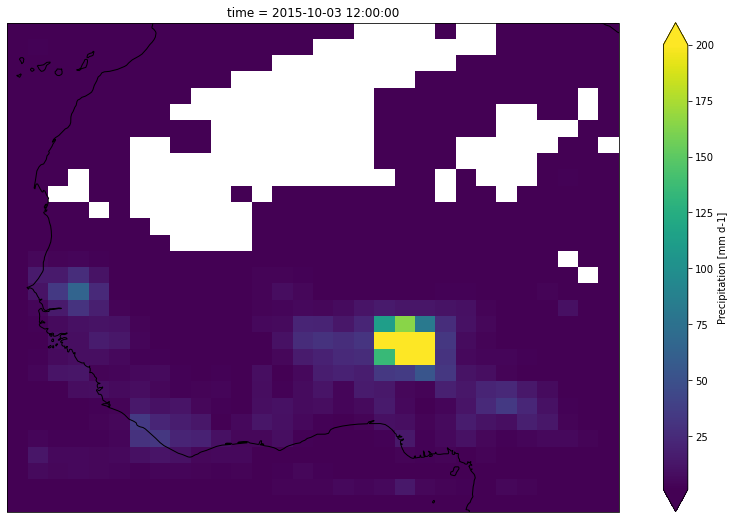

In [136]:
plt.figure(figsize=(16, 9))
ax = plt.axes(projection=ccrs.PlateCarree())
scen585_ad.isel(time=275).plot.pcolormesh(ax=ax, vmin=1, vmax=200);
ax.coastlines()

In [137]:
# lenght of dataarray before conversion
print((f'lenght of Projection Model Adjusted data is : {len(scenQDM_ad.time.values)}'))
scenQDM_ad.time[59].data

lenght of Projection Model Adjusted data is : 31390


array(cftime.DatetimeNoLeap(2015, 3, 1, 12, 0, 0, 0, has_year_zero=True),
      dtype=object)

In [138]:
# Calendar conversion

# Convert the Historical Model Adjusted Simulation data to `Standard` calendar
scenQDM_ad_with_missing = xclim.core.calendar.convert_calendar(
    scenQDM_ad, 'standard', missing=np.NaN)
scenQDM_ad_out = scenQDM_ad_with_missing.interpolate_na(
    'time', method='linear')

In [139]:
# lenght of dataarray after conversion
print((f'lenght of Model Adjusted data is : {len(scenQDM_ad_out.time.values)}'))
scenQDM_ad_out.time[59].data

lenght of Model Adjusted data is : 31411


array(cftime.DatetimeGregorian(2015, 3, 1, 12, 0, 0, 0, has_year_zero=False),
      dtype=object)

In [140]:
# convert CFTime index to Datetime index
datetimeindex = scenQDM_ad_out.indexes['time'].to_datetimeindex()
scenQDM_ad_out['time'] = datetimeindex
scenQDM_ad_out.time[59].data

/home/jefire/miniconda3/envs/xclim_xesmf_env/lib/python3.9/site-packages/xarray/coding/times.py:351: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  sample = dates.ravel()[0]


array('2015-03-01T12:00:00.000000000', dtype='datetime64[ns]')

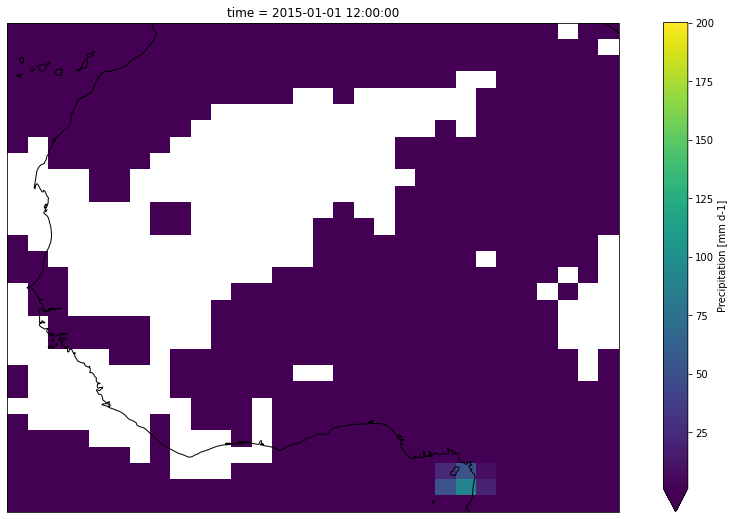

In [141]:
plt.figure(figsize=(16, 9))
ax = plt.axes(projection=ccrs.PlateCarree())
scenQDM_ad.isel(time=0).plot.pcolormesh(ax=ax, vmin=1, vmax=200);
ax.coastlines()

In [142]:
# lenght of dataarray before conversion
print((f'lenght of Projection Model Adjusted data is : {len(scenQDM585_ad.time.values)}'))
scenQDM585_ad.time[59].data

lenght of Projection Model Adjusted data is : 31390


array(cftime.DatetimeNoLeap(2015, 3, 1, 12, 0, 0, 0, has_year_zero=True),
      dtype=object)

In [143]:
# Calendar conversion

# Convert the Historical Model Adjusted Simulation data to `Standard` calendar
scenQDM585_ad_with_missing = xclim.core.calendar.convert_calendar(
    scenQDM585_ad, 'standard', missing=np.NaN)
scenQDM585_ad_out = scenQDM585_ad_with_missing.interpolate_na(
    'time', method='linear')

In [144]:
# lenght of dataarray after conversion
print((f'lenght of Model Adjusted data is : {len(scenQDM585_ad_out.time.values)}'))
scenQDM585_ad_out.time[59].data

lenght of Model Adjusted data is : 31411


array(cftime.DatetimeGregorian(2015, 3, 1, 12, 0, 0, 0, has_year_zero=False),
      dtype=object)

In [145]:
# convert CFTime index to Datetime index
datetimeindex = scenQDM585_ad_out.indexes['time'].to_datetimeindex()
scenQDM585_ad_out['time'] = datetimeindex
scenQDM585_ad_out.time[59].data

/home/jefire/miniconda3/envs/xclim_xesmf_env/lib/python3.9/site-packages/xarray/coding/times.py:351: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  sample = dates.ravel()[0]


array('2015-03-01T12:00:00.000000000', dtype='datetime64[ns]')

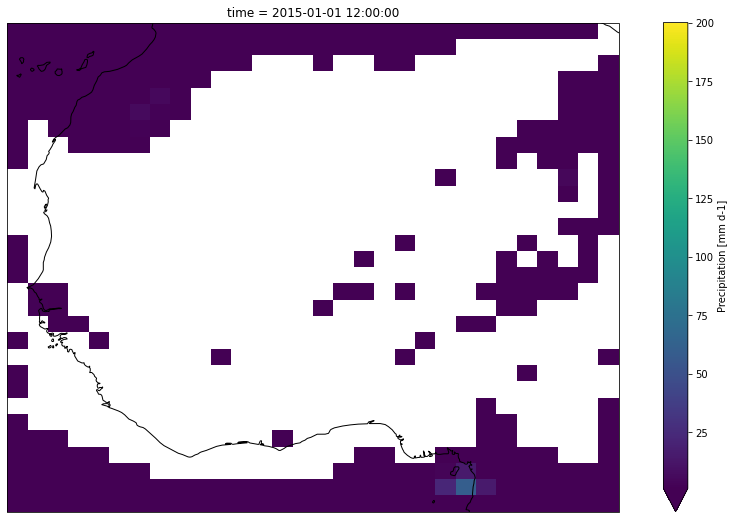

In [146]:
plt.figure(figsize=(16, 9))
ax = plt.axes(projection=ccrs.PlateCarree())
scenQDM585_ad.isel(time=0).plot.pcolormesh(ax=ax, vmin=1, vmax=200);
ax.coastlines()

In [147]:
# lenght of ssp585 dataarray before conversion
print((f'lenght of Projection Model Adjusted data is : {len(scenLOCI.time.values)}'))
scenLOCI.time[59].data

lenght of Projection Model Adjusted data is : 31390


array(cftime.DatetimeNoLeap(2015, 3, 1, 12, 0, 0, 0, has_year_zero=True),
      dtype=object)

In [148]:
# Calendar conversion

# Convert the Projection ssp585 Model Adjusted Simulation data to `Standard` calendar
scenLOCI_with_missing = xclim.core.calendar.convert_calendar(
    scenLOCI, 'standard', missing=np.NaN)
scenLOCI_out = scenLOCI_with_missing.interpolate_na(
    'time', method='linear')

In [149]:
# lenght of ssp585 dataarray after conversion
print((f'lenght of Model Adjusted data is : {len(scenLOCI_out.time.values)}'))
scenLOCI_out.time[59].data

lenght of Model Adjusted data is : 31411


array(cftime.DatetimeGregorian(2015, 3, 1, 12, 0, 0, 0, has_year_zero=False),
      dtype=object)

In [150]:
# convert CFTime index to Datetime index
datetimeindex = scenLOCI_out.indexes['time'].to_datetimeindex()
scenLOCI_out['time'] = datetimeindex
scenLOCI_out.time[59].data

/home/jefire/miniconda3/envs/xclim_xesmf_env/lib/python3.9/site-packages/xarray/coding/times.py:351: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  sample = dates.ravel()[0]


array('2015-03-01T12:00:00.000000000', dtype='datetime64[ns]')

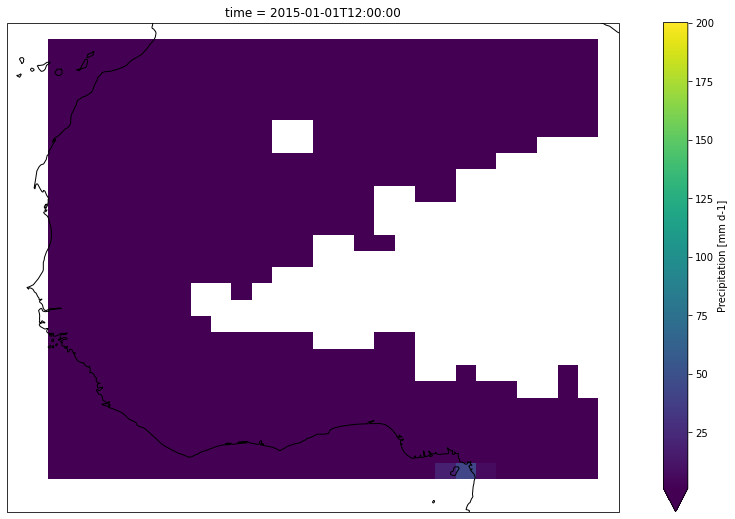

In [151]:
plt.figure(figsize=(16, 9))
ax = plt.axes(projection=ccrs.PlateCarree())
scenLOCI_out.isel(time=0).plot.pcolormesh(ax=ax, vmin=1, vmax=200);
ax.coastlines()

In [152]:
# lenght of dataarray before conversion
print((f'lenght of Projection Model Adjusted data is : {len(scenLOCI585.time.values)}'))
scenLOCI585.time[59].data

lenght of Projection Model Adjusted data is : 31390


array(cftime.DatetimeNoLeap(2015, 3, 1, 12, 0, 0, 0, has_year_zero=True),
      dtype=object)

In [153]:
# Calendar conversion

# Convert the Projection Model Adjusted Simulation data to `Standard` calendar
scenLOCI585_with_missing = xclim.core.calendar.convert_calendar(
    scenLOCI585, 'standard', missing=np.NaN)
scenLOCI585_out = scenLOCI585_with_missing.interpolate_na(
    'time', method='linear')

In [154]:
# lenght of dataarray after conversion
print((f'lenght of Model Adjusted data is : {len(scenLOCI585_out.time.values)}'))
scenLOCI585_out.time[59].data

lenght of Model Adjusted data is : 31411


array(cftime.DatetimeGregorian(2015, 3, 1, 12, 0, 0, 0, has_year_zero=False),
      dtype=object)

In [155]:
# convert CFTime index to Datetime index
datetimeindex = scenLOCI585_out.indexes['time'].to_datetimeindex()
scenLOCI585_out['time'] = datetimeindex
scenLOCI585_out.time[59].data

/home/jefire/miniconda3/envs/xclim_xesmf_env/lib/python3.9/site-packages/xarray/coding/times.py:351: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  sample = dates.ravel()[0]


array('2015-03-01T12:00:00.000000000', dtype='datetime64[ns]')

In [156]:
# lenght of dataarray before conversion
print((f'lenght of Projection Model Adjusted data is : {len(scenLOCI_hist.time.values)}'))
scenLOCI_hist.time[59].data

lenght of Projection Model Adjusted data is : 60225


array(cftime.DatetimeNoLeap(1850, 3, 1, 12, 0, 0, 0, has_year_zero=True),
      dtype=object)

In [157]:
# Calendar conversion

# Convert the Historical Model Adjusted Simulation data to `Standard` calendar
scenLOCI_hist_with_missing = xclim.core.calendar.convert_calendar(
    scenLOCI_hist, 'standard', missing=np.NaN)
scenLOCI_hist_out = scenLOCI_hist_with_missing.interpolate_na(
    'time', method='linear')

In [158]:
# lenght of dataarray after conversion
print((f'lenght of Model Adjusted data is : {len(scenLOCI_hist_out.time.values)}'))
scenLOCI_hist_out.time[59].data

lenght of Model Adjusted data is : 60265


array(cftime.DatetimeGregorian(1850, 3, 1, 12, 0, 0, 0, has_year_zero=False),
      dtype=object)

In [159]:
# convert CFTime index to Datetime index
datetimeindex = scenLOCI_hist_out.indexes['time'].to_datetimeindex()
scenLOCI_hist_out['time'] = datetimeindex
scenLOCI_hist_out.time[59].data

/home/jefire/miniconda3/envs/xclim_xesmf_env/lib/python3.9/site-packages/xarray/coding/times.py:351: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  sample = dates.ravel()[0]


array('1850-03-01T12:00:00.000000000', dtype='datetime64[ns]')

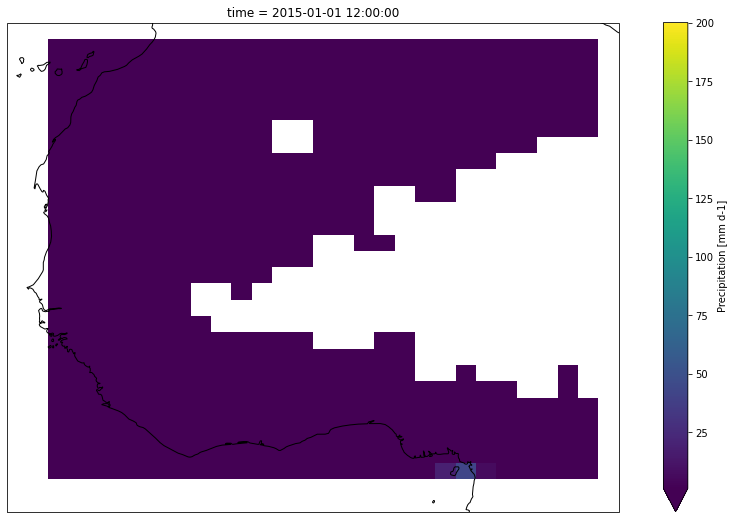

In [160]:
plt.figure(figsize=(16, 9))
ax = plt.axes(projection=ccrs.PlateCarree())
scenLOCI.isel(time=0).plot.pcolormesh(ax=ax, vmin=1, vmax=200);
ax.coastlines()

In [161]:
# Save datasets

scen_out.to_netcdf(
    '/datadrive/project/output/gfdl_bcsd/gfdl_to_gpm/pr_day_GFDL-ESM4_ssp245_qm_groupbymonth_patch-nointerp_20150101-21001231.nc')

scen585_out.to_netcdf(
    '/datadrive/project/output/gfdl_bcsd/gfdl_to_gpm/pr_day_GFDL-ESM4_ssp585_qm_groupbymonth_patch-nointerp_20150101-21001231.nc')

scen_hist_out.to_netcdf(
    '/datadrive/project/output/gfdl_bcsd/gfdl_to_gpm/pr_day_GFDL-ESM4_historical_qm_groupbymonth_patch-nointerp_18500101-20141231.nc')

In [162]:
scenQDM_out.to_netcdf(
    '/datadrive/project/output/gfdl_bcsd/gfdl_to_gpm/pr_day_GFDL-ESM4_ssp245_qdm_groupbymonth_patch-nointerp_20150101-21001231.nc')

scenQDM585_out.to_netcdf(
    '/datadrive/project/output/gfdl_bcsd/gfdl_to_gpm/pr_day_GFDL-ESM4_ssp585_qdm_groupbymonth_patch-nointerp_20150101-21001231.nc')

scenQDM_hist_out.to_netcdf(
    '/datadrive/project/output/gfdl_bcsd/gfdl_to_gpm/pr_day_GFDL-ESM4_historical_qdm_groupbymonth_patch-nointerp_18500101-20141231.nc')

In [163]:
scen_ad_out.to_netcdf(
    '/datadrive/project/output/gfdl_bcsd/gfdl_to_gpm/pr_day_GFDL-ESM4_ssp245_qm_ad_groupbymonth_patch-nointerp_20150101-21001231.nc')

scen585_ad_out.to_netcdf(
    '/datadrive/project/output/gfdl_bcsd/gfdl_to_gpm/pr_day_GFDL-ESM4_ssp585_qm_ad_groupbymonth_patch-nointerp_20150101-21001231.nc')

In [164]:
scenQDM_ad_out.to_netcdf(
    '/datadrive/project/output/gfdl_bcsd/gfdl_to_gpm/pr_day_GFDL-ESM4_ssp245_qdm_ad_groupbymonth_patch-nointerp_20150101-21001231.nc')

scenQDM585_ad_out.to_netcdf(
    '/datadrive/project/output/gfdl_bcsd/gfdl_to_gpm/pr_day_GFDL-ESM4_ssp585_qdm_ad_groupbymonth_patch-nointerp_20150101-21001231.nc')

In [165]:
scenLOCI_out.to_netcdf(
    '/datadrive/project/output/gfdl_bcsd/gfdl_to_gpm//pr_day_GFDL-ESM4_ssp245_LOCI_groupbymonth_patch-nointerp_20150101-21001231.nc')

scenLOCI585_out.to_netcdf(
    '/datadrive/project/output/gfdl_bcsd/gfdl_to_gpm/pr_day_GFDL-ESM4_ssp585_LOCI_groupbymonth_patch-nointerp_20150101-21001231.nc')

scenLOCI_hist_out.to_netcdf(
    '/datadrive/project/output/gfdl_bcsd/gfdl_to_gpm/pr_day_GFDL-ESM4_historical_LOCI_groupbymonth_patch-nointerp_18500101-20141231.nc')

In [166]:
import xclim
# Also import some submodules for direct access
from xclim import sdba  # Bias-adjustment

# Data manipulation
import xarray as xr
import xclim.testing
import numpy as np

# Regridding / interpollatiion of grids
import xesmf as xe

# Visualizations and display
from pprint import pprint
from IPython.display import display
import matplotlib as mpl
import matplotlib.pyplot as plt
from dask.diagnostics import ProgressBar
# Visualization of Cartographic Maps
import cartopy.crs as ccrs

# For handling file paths
import os

In [167]:
# keep attributes for all datasets
xr.set_options(keep_attrs=True)

In [168]:
os.chdir('/datadrive/project/input/gcm')

In [169]:
fn ='pr_day_GFDL-ESM4_historical_r1i1p1f1_gr1_18500101-20141231.nc'

fn1 = 'pr_day_GFDL-ESM4_ssp245_r1i1p1f1_gr1_20150101-21001231.nc' 

fn2 = '/datadrive/project/input/output/imerge_regrid/imerge_to_gfdl_patch.nc'

fn3 = 'pr_day_GFDL-ESM4_ssp585_r1i1p1f1_gr1_20150101-21001231.nc'

In [170]:
# load GCM historical dataset
ds_hist = xr.open_dataset(fn)
ds_hist

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 30, time: 60225, lon: 30)
Coordinates:
  * bnds       (bnds) float64 1.0 2.0
  * lat        (lat) float64 1.5 2.5 3.5 4.5 5.5 ... 26.5 27.5 28.5 29.5 30.5
  * lon        (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * time       (time) object 1850-01-01 12:00:00 ... 2014-12-31 12:00:00
Data variables:
    lat_bnds   (time, lat, bnds) float64 ...
    lon_bnds   (time, lon, bnds) float64 ...
    pr         (time, lat, lon) float32 ...
    time_bnds  (time, bnds) object ...
Attributes: (12/46)
    external_variables:     areacella
    history:                File was processed by fremetar (GFDL analog of CM...
    table_id:               day
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    ...                     ...
    title:                  NOAA GFDL GFDL-ESM4 model output prepared for CMI...
    tracking_id:            hdl:21.14100/fc9d6bda-4932-469c-9d06-bf17794c3169
    variable_id:            pr
    variant_info:           N/A
    references:             see further_info_url attribute
    variant_label:          r1i1p1f1

In [171]:
# load GCM Simulation ssp245 dataset
ds_sim = xr.open_dataset(fn1)
ds_sim

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 30, time: 31390, lon: 30)
Coordinates:
  * bnds       (bnds) float64 1.0 2.0
  * lat        (lat) float64 1.5 2.5 3.5 4.5 5.5 ... 26.5 27.5 28.5 29.5 30.5
  * lon        (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * time       (time) object 2015-01-01 12:00:00 ... 2100-12-31 12:00:00
Data variables:
    lat_bnds   (time, lat, bnds) float64 ...
    lon_bnds   (time, lon, bnds) float64 ...
    pr         (time, lat, lon) float32 ...
    time_bnds  (time, bnds) object ...
Attributes: (12/46)
    external_variables:     areacella
    history:                File was processed by fremetar (GFDL analog of CM...
    table_id:               day
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   60225.0
    ...                     ...
    title:                  NOAA GFDL GFDL-ESM4 model output prepared for CMI...
    tracking_id:            hdl:21.14100/48767401-8960-4864-8738-e64640bef71d
    variable_id:            pr
    variant_info:           N/A
    references:             see further_info_url attribute
    variant_label:          r1i1p1f1

In [172]:
# load GCM Simulation ssp585 dataset
ds_sim585 = xr.open_dataset(fn3)
ds_sim585

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 30, time: 31390, lon: 30)
Coordinates:
  * bnds       (bnds) float64 1.0 2.0
  * lat        (lat) float64 1.5 2.5 3.5 4.5 5.5 ... 26.5 27.5 28.5 29.5 30.5
  * lon        (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * time       (time) object 2015-01-01 12:00:00 ... 2100-12-31 12:00:00
Data variables:
    lat_bnds   (time, lat, bnds) float64 ...
    lon_bnds   (time, lon, bnds) float64 ...
    pr         (time, lat, lon) float32 ...
    time_bnds  (time, bnds) object ...
Attributes: (12/46)
    external_variables:     areacella
    history:                File was processed by fremetar (GFDL analog of CM...
    table_id:               day
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   60225.0
    ...                     ...
    title:                  NOAA GFDL GFDL-ESM4 model output prepared for CMI...
    tracking_id:            hdl:21.14100/e5a52b09-5ca8-421d-a446-f0874c07f4c6
    variable_id:            pr
    variant_info:           N/A
    references:             see further_info_url attribute
    variant_label:          r1i1p1f1

In [173]:
# load reference (Observation) dataset
ds_ref_standard = xr.open_dataset(fn2)
ds_ref_standard

<xarray.Dataset>
Dimensions:  (time: 7792, lat: 30, lon: 30, lat_b: 282, lon_b: 362)
Coordinates:
  * time     (time) datetime64[ns] 2000-06-01 2000-06-02 ... 2021-09-30
  * lat_b    (lat_b) float64 1.9 2.0 2.1 2.2 2.3 ... 29.6 29.7 29.8 29.9 30.0
  * lon_b    (lon_b) float64 -18.1 -18.0 -17.9 -17.8 ... 17.7 17.8 17.9 18.0
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
Data variables:
    pr       (time, lat, lon) float64 ...
Attributes:
    regrid_method:  patch

In [174]:
# re-assign Dimension name attribute
ds_ref_standard['pr'] = ds_ref_standard.pr.assign_attrs(long_name='Precipitation')
ds_ref_standard['pr'] = ds_ref_standard.pr.assign_attrs(units='mm d-1')
ds_ref_standard['pr'] = ds_ref_standard.pr.assign_attrs(standard_name='precipitation_flux')
ds_ref_standard['pr'] = ds_ref_standard.pr.assign_attrs(interp_method='patch')
ds_ref_standard

<xarray.Dataset>
Dimensions:  (time: 7792, lat: 30, lon: 30, lat_b: 282, lon_b: 362)
Coordinates:
  * time     (time) datetime64[ns] 2000-06-01 2000-06-02 ... 2021-09-30
  * lat_b    (lat_b) float64 1.9 2.0 2.1 2.2 2.3 ... 29.6 29.7 29.8 29.9 30.0
  * lon_b    (lon_b) float64 -18.1 -18.0 -17.9 -17.8 ... 17.7 17.8 17.9 18.0
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
Data variables:
    pr       (time, lat, lon) float64 ...
Attributes:
    regrid_method:  patch

In [175]:
# convert Reference Dataset to DataArray
ds_ref_standard = ds_ref_standard.pr
ds_ref_standard

<xarray.DataArray 'pr' (time: 7792, lat: 30, lon: 30)>
[7012800 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 2000-06-01 2000-06-02 ... 2021-09-30
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
Attributes:
    long_name:      Precipitation
    units:          mm d-1
    standard_name:  precipitation_flux
    interp_method:  patch

In [176]:
# lenght of Reference dataset before conversion
print((f'lenght of Reference Observation data is : {len(ds_ref_standard.time.values)}'))
ds_ref_standard.time[59].data

lenght of Reference Observation data is : 7792


array('2000-07-30T00:00:00.000000000', dtype='datetime64[ns]')

In [177]:
# Calendar conversion

# Convert the Reference data to `noleap` calendar
ds_ref = xclim.core.calendar.convert_calendar(ds_ref_standard, 'noleap')
print((f'lenght of Reference Observation data is : {len(ds_ref.time.values)}'))
ds_ref.time[59].data

lenght of Reference Observation data is : 7787


array(cftime.DatetimeNoLeap(2000, 7, 30, 0, 0, 0, 0, has_year_zero=True),
      dtype=object)

In [178]:
# `hist` and `sim` are given in kg m-2 s-1, we must convert to mm/d to fit with `ref`
ds_hist = xclim.core.units.convert_units_to(ds_hist.pr, 'mm/d')
ds_sim = xclim.core.units.convert_units_to(ds_sim.pr, 'mm/d')
ds_sim585 = xclim.core.units.convert_units_to(ds_sim585.pr, 'mm/d')
ds_sim

<xarray.DataArray 'pr' (time: 31390, lat: 30, lon: 30)>
array([[[8.27760727e-04, 5.91804599e-03, 3.00125498e-03, ...,
         3.32788788e-02, 3.31913084e-01, 1.27604878e+00],
        [2.34299563e-07, 3.06397385e-04, 1.58949806e-05, ...,
         6.43455796e-03, 2.39529405e-02, 6.15998358e-02],
        [1.99868229e-08, 0.00000000e+00, 7.92549457e-08, ...,
         2.00297291e-06, 4.38418328e-06, 1.73773777e-04],
        ...,
        [6.86139762e-01, 7.35506654e-01, 4.95649070e-01, ...,
         8.07272613e-08, 3.90986443e-09, 2.94671132e-09],
        [6.18888736e-01, 4.33507442e-01, 3.65886986e-01, ...,
         3.05949244e-09, 1.52542885e-23, 7.40235835e-23],
        [7.66100109e-01, 5.98797083e-01, 6.76250696e-01, ...,
         1.11245332e-24, 1.29198637e-23, 1.20485630e-08]],

       [[8.08757534e-07, 4.98679174e-06, 1.26340638e-06, ...,
         8.63123119e-01, 1.30686736e+00, 1.12223661e+00],
        [2.15863884e-06, 2.40199024e-05, 6.81038159e-07, ...,
         6.43877327e-01, 1.01385629e+00, 3.59533846e-01],
        [1.32190951e-06, 2.37105269e-06, 6.95622475e-08, ...,
         1.60331354e-01, 2.80094117e-01, 1.30953014e-01],
...
        [3.51387501e+00, 4.28665781e+00, 2.42060447e+00, ...,
         3.75801586e-02, 2.00410604e-01, 3.47523659e-01],
        [1.57184303e+00, 1.26711822e+00, 5.93206167e-01, ...,
         4.05169204e-02, 2.04013661e-01, 4.80594486e-01],
        [4.35284898e-02, 5.22943214e-03, 2.03650416e-04, ...,
         1.14970401e-01, 3.90481770e-01, 8.65156889e-01]],

       [[7.74223328e-01, 2.86593825e-01, 2.25814044e-01, ...,
         2.44728908e-05, 1.21576180e-04, 2.94606696e-04],
        [1.04731917e+00, 3.85867596e-01, 2.47747451e-01, ...,
         2.94490743e-09, 3.77127944e-05, 1.95827015e-04],
        [1.47707236e+00, 7.99957395e-01, 4.42971349e-01, ...,
         3.44036357e-06, 1.80719435e-05, 7.61100405e-10],
        ...,
        [1.53226984e+00, 1.44738901e+00, 3.72677326e-01, ...,
         3.65189184e-03, 5.01225218e-02, 1.29681870e-01],
        [8.44142288e-02, 3.22265504e-03, 3.30518768e-03, ...,
         2.62172800e-03, 5.29917888e-02, 1.40893549e-01],
        [1.41107026e-04, 5.71183555e-05, 2.61576206e-05, ...,
         3.12236510e-03, 9.62966159e-02, 1.52816862e-01]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * time     (time) object 2015-01-01 12:00:00 ... 2100-12-31 12:00:00
Attributes:
    long_name:      Precipitation
    units:          mm d-1
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    standard_name:  precipitation_flux
    interp_method:  conserve_order1
    original_name:  pr

In [179]:
ds_hist.isel(time=2,lat=2,lon=2).values

array(0.00882688, dtype=float32)

In [180]:
ds_ref.time[59].data

array(cftime.DatetimeNoLeap(2000, 7, 30, 0, 0, 0, 0, has_year_zero=True),
      dtype=object)

In [181]:
# lets slice `ref` and `hist` for 2001 to 2014
hist = ds_hist.sel(time=slice('2001','2014'))
ref = ds_ref.sel(time=slice('2001','2014'))
print((f'lenght of GCM Historical data is : {len(hist.time.values)}'))
print((f'lenght of Reference Observation data is : {len(ref.time.values)}'))

lenght of GCM Historical data is : 5110
lenght of Reference Observation data is : 5110


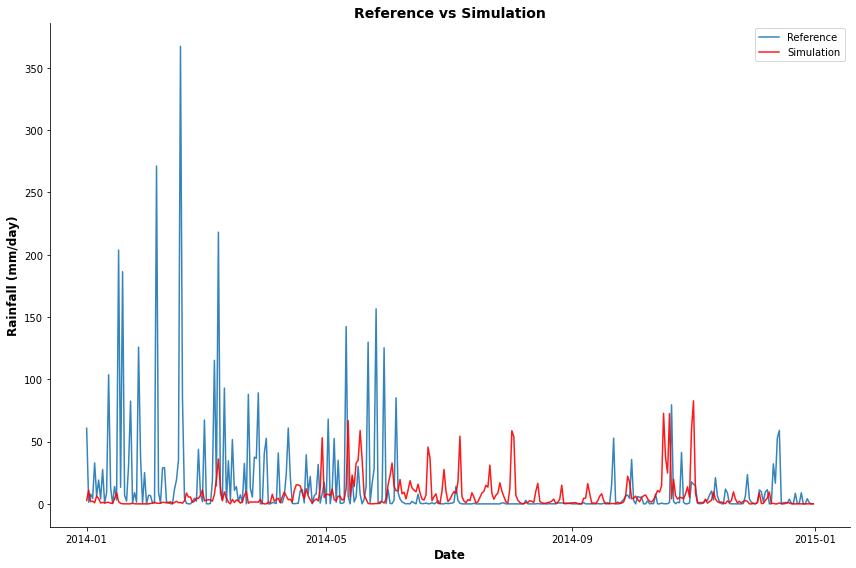

In [182]:
x = ref.isel(lat=2,lon=2,time=slice(-365,None))
y = hist.isel(lat=2,lon=2,time=slice(-365,None))
dt = ref.isel(lat=2,lon=2,time=slice(-365,None)).time
dt = x.time

# We create a canvas with one ax
fig, axes = plt.subplots(1, 1, figsize=(12,8))

# We plot on our first axis
axes.plot(dt,x, alpha=0.9)
axes.plot(dt,y, alpha=0.9,c='r')

# Set a title
axes.set_title('Reference vs Simulation',size=14,fontweight='bold')
axes.set_xlabel('Date',size=12,fontweight='semibold')
axes.set_ylabel('Rainfall (mm/day)',size=12,fontweight='semibold')


# Hide the right and top spines
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)

# We tight the layout
fig.tight_layout()

axes.legend(['Reference', 'Simulation'])
# We plot
plt.show()

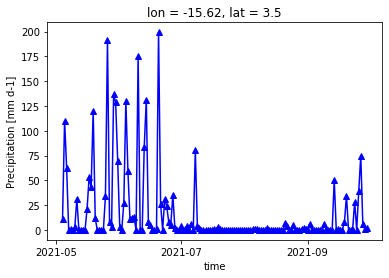

In [183]:
ds_ref.isel(lat=2,lon=2,time=(slice(-150,None))).plot.line("b-^")

In [184]:
# We want to group data on a day-of-year basis with a 31-day moving window
group_month = xclim.sdba.Grouper('time.month')

In [185]:
QM = sdba.EmpiricalQuantileMapping.train(
    ref, hist, nquantiles=15, group=group_month, kind="*"
)

In [186]:
scen = QM.adjust(ds_sim, extrapolation="constant", interp="linear")
scen

<xarray.DataArray 'scen' (time: 31390, lat: 30, lon: 30)>
array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00, -3.97060076e-05, -6.21177735e-06, ...,
          2.47017335e-02,  4.38701774e-01,  0.00000000e+00],
        [ 0.00000000e+00, -0.00000000e+00, -3.16892918e-07, ...,
         -1.10932724e+15,            -inf,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  5.57584032e-01,  5.68178358e-01, ...,
                    -inf,            -inf,  0.00000000e+00],
        [ 0.00000000e+00,  2.35067216e-01,  1.90264971e-01, ...,
                    -inf,            -inf,             nan],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
                     nan,             nan,  0.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00, -3.04484227e-06, -2.53854496e-07, ...,
          9.35001986e+00,  2.72658959e+01,  0.00000000e+00],
        [ 0.00000000e+00, -2.29130894e-06, -2.59814078e-07, ...,
          8.28550804e+00,  5.22601955e+00,  0.00000000e+00],
...
        [ 0.00000000e+00,  5.68315936e+00,  2.51418592e+00, ...,
          3.33871140e-01,  1.93362220e+00,  0.00000000e+00],
        [ 0.00000000e+00,  1.33676690e+00,  6.62325431e-01, ...,
          5.64815381e-01,  1.87112206e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  1.04217231e+00,  2.62924148e-01, ...,
         -7.29799395e+07,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  9.34991984e+00,  5.02934889e+00, ...,
         -1.22043652e+15,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  1.53039131e+00,  3.38274608e-01, ...,
          2.78755081e-02,  2.91464224e-01,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          9.63644289e-03,  4.24198010e-01,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]])
Coordinates:
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * time     (time) object 2015-01-01 12:00:00 ... 2100-12-31 12:00:00
Attributes:
    long_name:        Precipitation
    units:            mm d-1
    cell_methods:     area: time: mean
    cell_measures:    area: areacella
    standard_name:    precipitation_flux
    interp_method:    conserve_order1
    original_name:    pr
    history:          [2022-04-04 23:25:42] : Bias-adjusted with EmpiricalQua...
    bias_adjustment:  EmpiricalQuantileMapping(group=Grouper(add_dims=[], nam...

In [187]:
scen_hist = QM.adjust(ds_hist, extrapolation="constant", interp="linear")
scen_hist

<xarray.DataArray 'scen' (time: 60225, lat: 30, lon: 30)>
array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00, -1.89811890e-03,  0.00000000e+00, ...,
          9.66835904e-02,  4.45087143e-01,  0.00000000e+00],
        [ 0.00000000e+00,  9.32581287e-04,  7.75933109e-08, ...,
          5.27721572e-02,  9.12788764e-01,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  7.38684332e-02,  2.08354548e-01, ...,
                    -inf,            -inf,  0.00000000e+00],
        [ 0.00000000e+00,  4.45704289e-02,  3.27852493e-01, ...,
                    -inf,            -inf,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  2.89436595e+00,  4.78780043e-02, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  9.19183317e-01,  1.19295710e-01, ...,
                    -inf,            -inf,  0.00000000e+00],
...
        [ 0.00000000e+00,             nan,            -inf, ...,
                    -inf,            -inf,  0.00000000e+00],
        [ 0.00000000e+00, -1.26011183e-03,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00, -1.61280946e-03,  0.00000000e+00, ...,
         -1.93489347e+09,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  1.84880291e-02,  4.23394567e-02, ...,
                    -inf,            -inf,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  1.51265404e-01,  3.02235316e-01, ...,
                    -inf,            -inf,  0.00000000e+00],
        [ 0.00000000e+00,  9.53624102e-02,  5.54356446e-01, ...,
                    -inf,             nan,             nan],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]])
Coordinates:
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * time     (time) object 1850-01-01 12:00:00 ... 2014-12-31 12:00:00
Attributes:
    long_name:        Precipitation
    units:            mm d-1
    cell_methods:     area: time: mean
    cell_measures:    area: areacella
    standard_name:    precipitation_flux
    interp_method:    conserve_order1
    original_name:    pr
    history:          [2022-04-04 23:26:05] : Bias-adjusted with EmpiricalQua...
    bias_adjustment:  EmpiricalQuantileMapping(group=Grouper(add_dims=[], nam...

In [188]:
scen_hist.sel(lat=6.5,lon=8.125,time="2014-09-15").values

array([1.5562876])

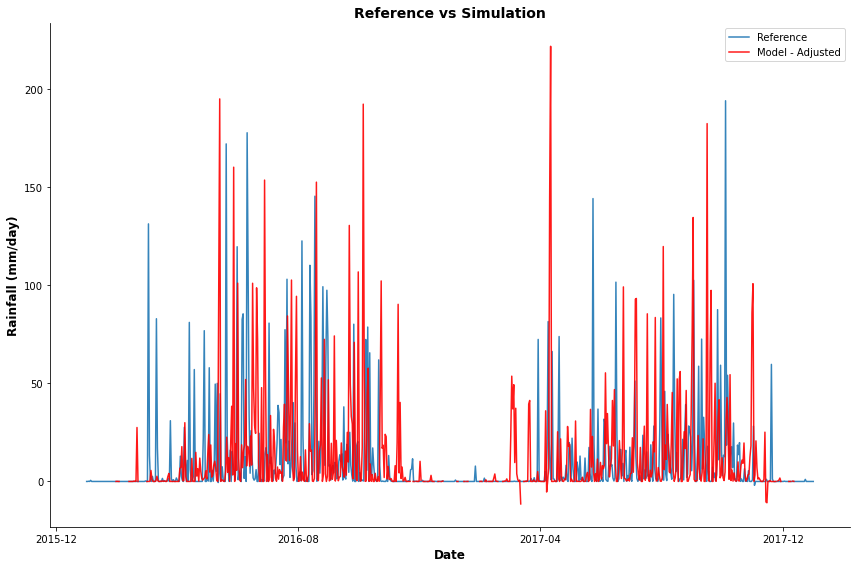

In [189]:
# Plot reference data against adjusted simulation data
ref_sliced = ds_ref.sel(lat=6.5,lon=8.125,time=slice("2016","2017"))
scen_sliced = scen.sel(lat=6.5,lon=8.125,time=slice("2016","2017"))

# We create a canvas with one ax
fig, axes = plt.subplots(1, 1, figsize=(12,8))

# We plot on our first axis
axes.plot(ref_sliced.time, ref_sliced, alpha=0.9)
axes.plot(scen_sliced.time, scen_sliced, alpha=0.9,c='r')

# Set a title
axes.set_title('Reference vs Simulation',size=14,fontweight='bold')
axes.set_xlabel('Date',size=12,fontweight='semibold')
axes.set_ylabel('Rainfall (mm/day)',size=12,fontweight='semibold')


# Hide the right and top spines
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)

# We tight the layout
fig.tight_layout()

axes.legend(['Reference', 'Model - Adjusted'])
# We plot
plt.show()

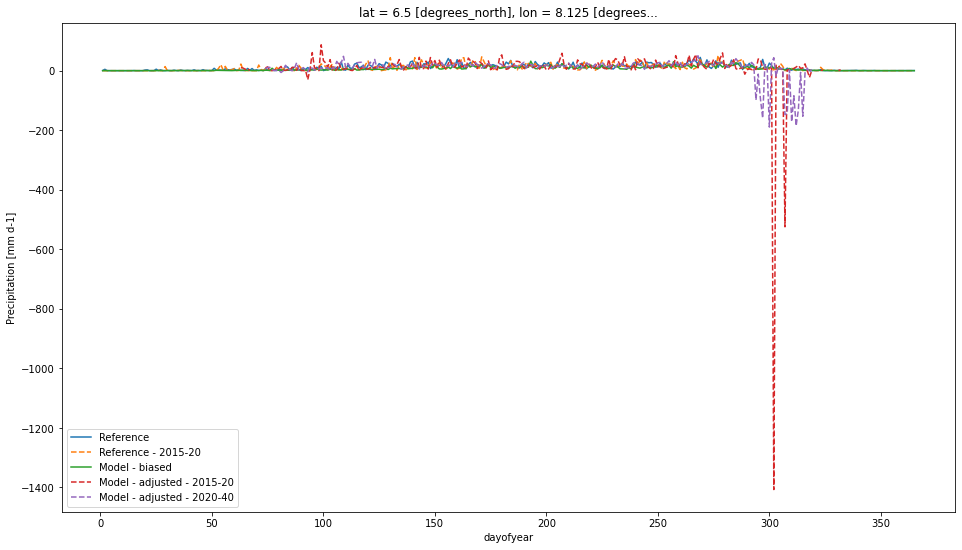

In [190]:
# Plot multiple line graph
plt.figure(figsize=(16,9))
ref.sel(
    lat=6.5,lon=8.125,time=slice(None,"2015")).groupby(
        "time.dayofyear").mean().plot(label="Reference")
ds_ref.sel(lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
    "time.dayofyear").mean().plot(
        label="Reference - 2015-20", linestyle="--")
hist.sel(
    lat=6.5,lon=8.125,time=slice(None,"2015")).groupby(
        "time.dayofyear").mean().plot(label="Model - biased")
scen.sel(
    lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
        "time.dayofyear").mean().plot(
            label="Model - adjusted - 2015-20", linestyle="--")
scen.sel(lat=6.5,lon=8.125,time=slice("2020", "2040")).groupby(
    "time.dayofyear").mean().plot(
        label="Model - adjusted - 2020-40", linestyle="--")
plt.legend()

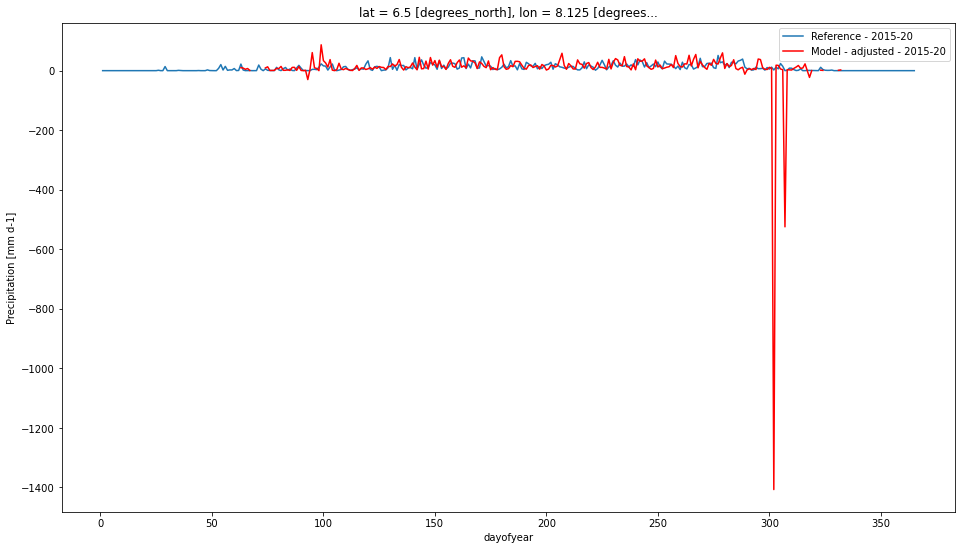

In [191]:
plt.figure(figsize=(16,9))

ds_ref.sel(lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
    "time.dayofyear").mean().plot(
        label="Reference - 2015-20")
scen.sel(
    lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
        "time.dayofyear").mean().plot(
            label="Model - adjusted - 2015-20",c='r')

plt.legend()

In [192]:
ds_ref.sel(lat=6.5,lon=8.125,time="2020-09-15").values

array([14.96030223])

In [193]:
scen.sel(lat=6.5,lon=8.125,time="2020-09-15").values

array([9.71378502])

In [194]:
QM.ds

<xarray.Dataset>
Dimensions:    (quantiles: 15, lat: 30, lon: 30, month: 12)
Coordinates:
  * quantiles  (quantiles) float64 0.03333 0.1 0.1667 ... 0.8333 0.9 0.9667
  * lat        (lat) float64 1.5 2.5 3.5 4.5 5.5 ... 26.5 27.5 28.5 29.5 30.5
  * lon        (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    af         (lat, lon, month, quantiles) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    hist_q     (lat, lon, month, quantiles) float32 0.03944 0.08137 ... 1.179
Attributes:
    group:               time.month
    group_compute_dims:  ['time']
    group_window:        1
    _xclim_adjustment:   {"py/object": "xclim.sdba.adjustment.EmpiricalQuanti...
    adj_params:          EmpiricalQuantileMapping(group=Grouper(add_dims=[], ...

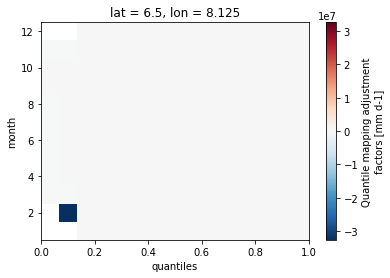

In [195]:
QM.ds.sel(lat=6.5,lon=8.125).af.plot()

In [196]:
# Empirical Quantile Mapping Adjustment for ssp585

scen585 = QM.adjust(ds_sim585, extrapolation="constant", interp="linear")
scen585

<xarray.DataArray 'scen' (time: 31390, lat: 30, lon: 30)>
array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00, -4.41133048e-05, -6.60893166e-06, ...,
          2.33640479e+00,  3.12896724e-01,  0.00000000e+00],
        [ 0.00000000e+00, -0.00000000e+00, -3.16892264e-07, ...,
         -1.12117079e+15,            -inf,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  3.48149239e-01,  5.30251932e-01, ...,
                    -inf,            -inf,  0.00000000e+00],
        [ 0.00000000e+00,  2.35363245e-01,  1.51588822e-01, ...,
                    -inf,            -inf,             nan],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,             nan]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00, -1.90133727e-06, -1.54770187e-07, ...,
          3.53082464e+01,  2.78799355e+01,  0.00000000e+00],
        [ 0.00000000e+00, -1.68967148e-06, -2.58389057e-07, ...,
          7.48863728e+00,  8.11923290e+00,  0.00000000e+00],
...
        [ 0.00000000e+00,  4.25190941e-04,            -inf, ...,
          0.00000000e+00,            -inf,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          9.45370999e-03,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  1.99752891e-02,  2.99536093e-03, ...,
          3.34285894e+00,  1.55879850e+01,  0.00000000e+00],
        [ 0.00000000e+00, -5.93683252e-04,  1.70986531e-07, ...,
          0.00000000e+00,  8.45158021e+00,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  1.52553648e+00,  1.50307046e+00, ...,
          1.88089723e-03,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  2.32977102e+00,  2.84169905e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]])
Coordinates:
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * time     (time) object 2015-01-01 12:00:00 ... 2100-12-31 12:00:00
Attributes:
    long_name:        Precipitation
    units:            mm d-1
    cell_methods:     area: time: mean
    cell_measures:    area: areacella
    standard_name:    precipitation_flux
    interp_method:    conserve_order1
    original_name:    pr
    history:          [2022-04-04 23:26:22] : Bias-adjusted with EmpiricalQua...
    bias_adjustment:  EmpiricalQuantileMapping(group=Grouper(add_dims=[], nam...

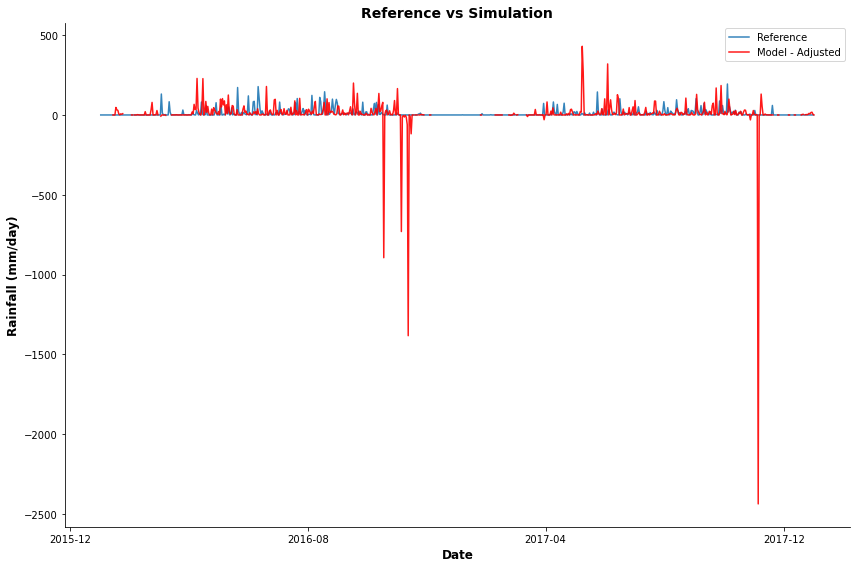

In [197]:
# Plot reference data against adjusted simulation data
ref_sliced = ds_ref.sel(lat=6.5,lon=8.125,time=slice("2016","2017"))
scen_sliced = scen585.sel(lat=6.5,lon=8.125,time=slice("2016","2017"))

# We create a canvas with one ax
fig, axes = plt.subplots(1, 1, figsize=(12,8))

# We plot on our first axis
axes.plot(ref_sliced.time, ref_sliced, alpha=0.9)
axes.plot(scen_sliced.time, scen_sliced, alpha=0.9,c='r')

# Set a title
axes.set_title('Reference vs Simulation',size=14,fontweight='bold')
axes.set_xlabel('Date',size=12,fontweight='semibold')
axes.set_ylabel('Rainfall (mm/day)',size=12,fontweight='semibold')


# Hide the right and top spines
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)

# We tight the layout
fig.tight_layout()

axes.legend(['Reference', 'Model - Adjusted'])
# We plot
plt.show()

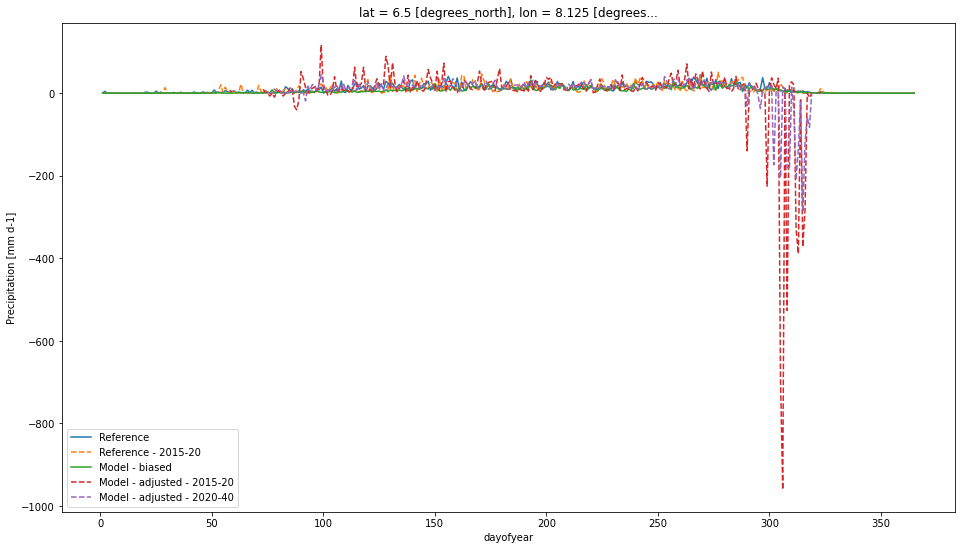

In [198]:
# Plot multiple line graph
plt.figure(figsize=(16,9))
ref.sel(
    lat=6.5,lon=8.125,time=slice(None,"2015")).groupby(
        "time.dayofyear").mean().plot(label="Reference")
ds_ref.sel(lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
    "time.dayofyear").mean().plot(
        label="Reference - 2015-20", linestyle="--")
hist.sel(
    lat=6.5,lon=8.125,time=slice(None,"2015")).groupby(
        "time.dayofyear").mean().plot(label="Model - biased")
scen585.sel(
    lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
        "time.dayofyear").mean().plot(
            label="Model - adjusted - 2015-20", linestyle="--")
scen585.sel(lat=6.5,lon=8.125,time=slice("2020", "2040")).groupby(
    "time.dayofyear").mean().plot(
        label="Model - adjusted - 2020-40", linestyle="--")
plt.legend()

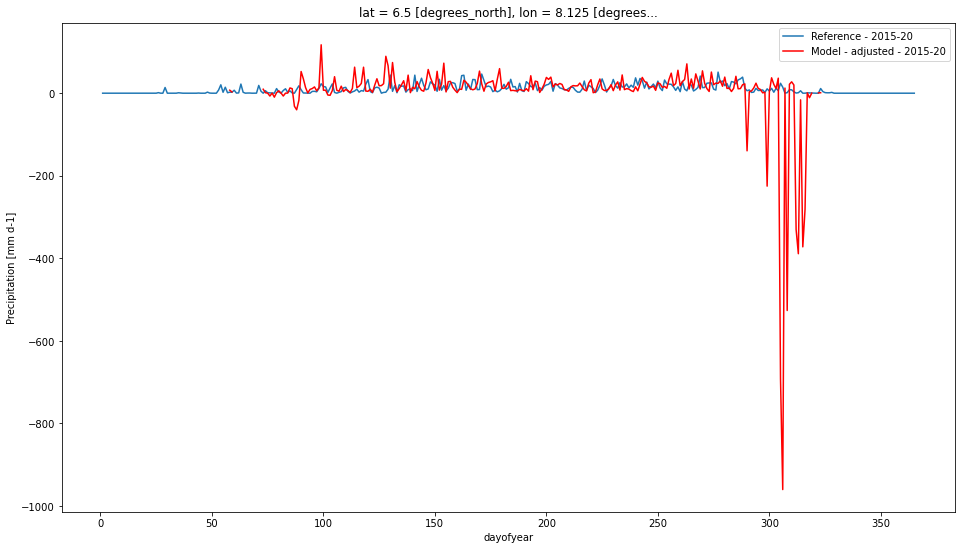

In [199]:
plt.figure(figsize=(16,9))

ds_ref.sel(lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
    "time.dayofyear").mean().plot(
        label="Reference - 2015-20")
scen585.sel(
    lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
        "time.dayofyear").mean().plot(
            label="Model - adjusted - 2015-20",c='r')

plt.legend()

In [200]:
ds_ref.sel(lat=6.5,lon=8.125,time="2020-09-15").values

array([14.96030223])

In [201]:
scen585.sel(lat=6.5,lon=8.125,time="2020-09-15").values

array([0.00062482])

In [202]:
# Second Model (Quantile Delta Mapping)

In [203]:
# We want to group data on a day-of-year basis with a 31-day moving window
group_month = xclim.sdba.Grouper('time.month')

In [204]:
QDM = sdba.QuantileDeltaMapping.train(
    ref, hist, nquantiles=15, group=group_month, kind="*"
)

In [205]:
scenQDM = QDM.adjust(ds_sim, extrapolation="constant", interp="linear")
scenQDM

<xarray.DataArray 'scen' (time: 31390, lat: 30, lon: 30)>
array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00, -3.83109246e-05, -6.21177735e-06, ...,
          6.47085088e-02,  5.77271892e-01,  0.00000000e+00],
        [ 0.00000000e+00, -0.00000000e+00, -3.16892918e-07, ...,
          0.00000000e+00,  9.54375852e-05,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  6.05512226e-01,  6.09237197e-01, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  2.43711657e-01,  1.82290863e-01, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00, -3.04484227e-06, -2.53854496e-07, ...,
          1.06119212e+01,  1.74699553e+01,  0.00000000e+00],
        [ 0.00000000e+00, -2.29130894e-06, -2.59814078e-07, ...,
          6.50712853e+00,  5.96050633e+00,  0.00000000e+00],
...
        [ 0.00000000e+00,  6.54027237e+00,  4.59688836e+00, ...,
          3.51882706e-01,  1.64992574e+00,  0.00000000e+00],
        [ 0.00000000e+00,  1.53825861e+00,  7.23505996e-01, ...,
          5.11038304e-01,  2.83787218e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  4.83670189e-01,  2.03020759e-01, ...,
         -3.50386703e+07,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  9.11759795e+00,  4.65038264e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  1.73271372e+00,  3.95449169e-01, ...,
          1.16344399e-02,  3.03059106e-01,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          1.17483653e-02,  3.83463886e-01,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]])
Coordinates:
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * time     (time) object 2015-01-01 12:00:00 ... 2100-12-31 12:00:00
Attributes:
    long_name:        Precipitation
    units:            mm d-1
    cell_methods:     area: time: mean
    cell_measures:    area: areacella
    standard_name:    precipitation_flux
    interp_method:    conserve_order1
    original_name:    pr
    history:          [2022-04-04 23:26:45] : Bias-adjusted with QuantileDelt...
    bias_adjustment:  QuantileDeltaMapping(group=Grouper(add_dims=[], name='t...

In [206]:
scenQDM_hist = QDM.adjust(ds_hist, extrapolation="constant", interp="linear")
scenQDM_hist

<xarray.DataArray 'scen' (time: 60225, lat: 30, lon: 30)>
array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  2.66328676e-03, ...,
          8.41824860e-02,  4.45175693e-01,  0.00000000e+00],
        [ 0.00000000e+00,  3.15887360e-02,  1.21245779e-03, ...,
          3.72282583e-02,  7.06217461e-01,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  8.61643590e-02,  1.63865183e-01, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  2.91223290e-02,  1.84060757e-01, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  4.14002610e+00,  2.33370153e-01, ...,
          0.00000000e+00,  4.28965700e-07,  0.00000000e+00],
        [ 0.00000000e+00,  1.87244921e+00,  3.27692209e-01, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
...
        [ 0.00000000e+00,             nan,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00, -8.65092447e-04,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00, -1.32954261e-03,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  1.99889338e-02,  5.39698886e-02, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  1.45843533e-01,  2.53351919e-01, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  6.91883622e-02,  4.24680526e-01, ...,
          0.00000000e+00,             nan,             nan],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]])
Coordinates:
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * time     (time) object 1850-01-01 12:00:00 ... 2014-12-31 12:00:00
Attributes:
    long_name:        Precipitation
    units:            mm d-1
    cell_methods:     area: time: mean
    cell_measures:    area: areacella
    standard_name:    precipitation_flux
    interp_method:    conserve_order1
    original_name:    pr
    history:          [2022-04-04 23:27:13] : Bias-adjusted with QuantileDelt...
    bias_adjustment:  QuantileDeltaMapping(group=Grouper(add_dims=[], name='t...

In [207]:
scenQDM_hist.sel(lat=6.5,lon=8.125,time="2014-09-15").values

array([1.53793509])

In [208]:
ds_ref.sel(lat=6.5,lon=8.125,time="2020-09-15").values

array([14.96030223])

In [209]:
scenQDM.sel(lat=6.5,lon=8.125,time="2020-09-15").values

array([11.15651457])

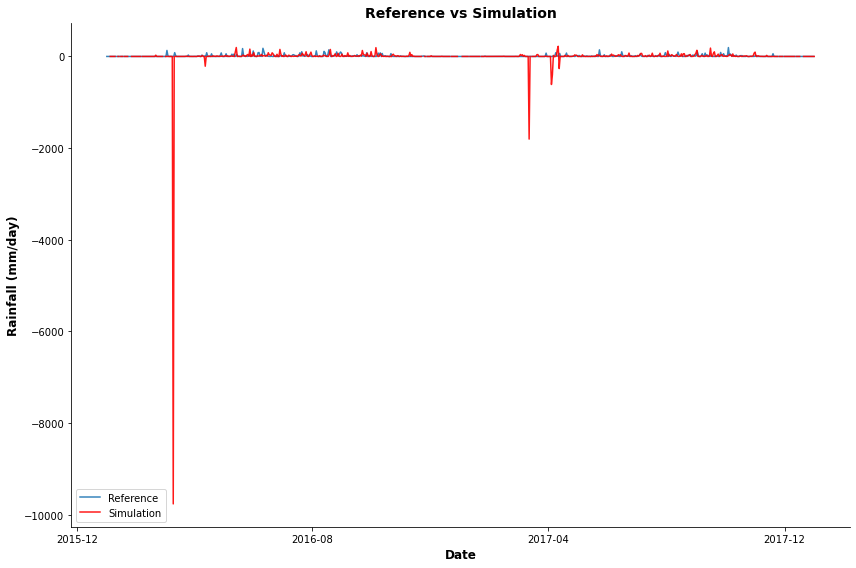

In [210]:
ref_sliced = ds_ref.sel(lat=6.5,lon=8.125,time=slice("2016","2017"))
scenQDM_sliced = scenQDM.sel(lat=6.5,lon=8.125,time=slice("2016","2017"))

# We create a canvas with one ax
fig, axes = plt.subplots(1, 1, figsize=(12,8))

# We plot on our first axis
axes.plot(ref_sliced.time, ref_sliced, alpha=0.9)
axes.plot(scenQDM_sliced.time, scenQDM_sliced, alpha=0.9,c='r')

# Set a title
axes.set_title('Reference vs Simulation',size=14,fontweight='bold')
axes.set_xlabel('Date',size=12,fontweight='semibold')
axes.set_ylabel('Rainfall (mm/day)',size=12,fontweight='semibold')


# Hide the right and top spines
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)

# We tight the layout
fig.tight_layout()

axes.legend(['Reference', 'Simulation'])
# We plot
plt.show()

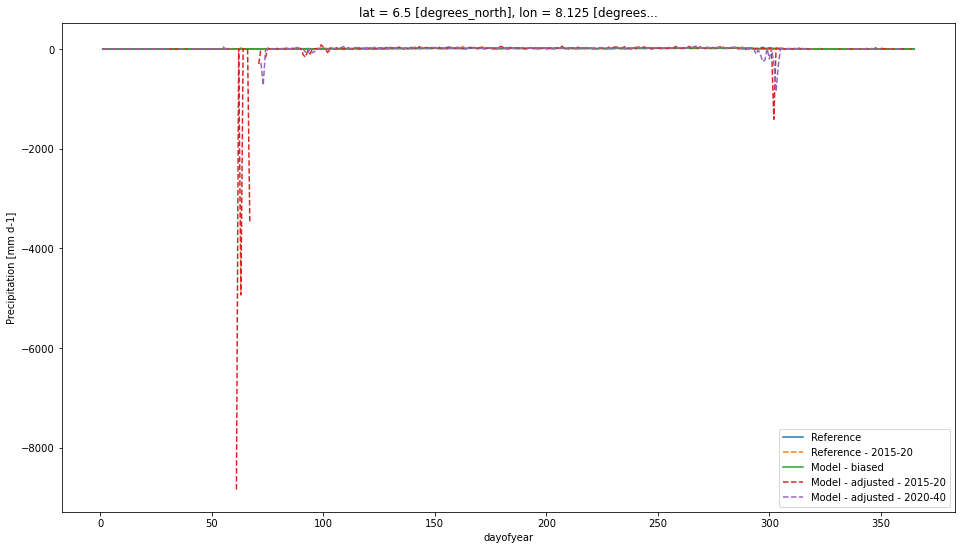

In [211]:
plt.figure(figsize=(16,9))
ref.sel(
    lat=6.5,lon=8.125,time=slice(None,"2015")).groupby(
        "time.dayofyear").mean().plot(label="Reference")
ds_ref.sel(lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
    "time.dayofyear").mean().plot(
        label="Reference - 2015-20", linestyle="--")
hist.sel(
    lat=6.5,lon=8.125,time=slice(None,"2015")).groupby(
        "time.dayofyear").mean().plot(label="Model - biased")
scenQDM.sel(
    lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
        "time.dayofyear").mean().plot(
            label="Model - adjusted - 2015-20", linestyle="--")
scenQDM.sel(lat=6.5,lon=8.125,time=slice("2020", "2040")).groupby(
    "time.dayofyear").mean().plot(
        label="Model - adjusted - 2020-40", linestyle="--")
plt.legend()

In [212]:
# Second Model (Quantile Delta Mapping) for ssp585

scenQDM585 = QDM.adjust(ds_sim585, extrapolation="constant", interp="linear")
scenQDM585

<xarray.DataArray 'scen' (time: 31390, lat: 30, lon: 30)>
array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00, -3.78117452e-05, -6.60893166e-06, ...,
          2.88518705e+00,  3.73216054e-01,  0.00000000e+00],
        [ 0.00000000e+00, -0.00000000e+00, -3.16892264e-07, ...,
          0.00000000e+00,  8.01778262e-05,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  4.22764724e-01,  5.92190822e-01, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  2.54266546e-01,  1.78431014e-01, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00, -1.90133727e-06, -1.54770187e-07, ...,
          3.53082464e+01,  1.88380948e+01,  0.00000000e+00],
        [ 0.00000000e+00, -1.68967148e-06, -2.58389057e-07, ...,
          6.63576920e+00,  3.18680509e+00,  0.00000000e+00],
...
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          9.96886066e-03,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  3.90448701e-03,  1.93737040e-03, ...,
          3.81433676e+00,  1.71547118e+01,  0.00000000e+00],
        [ 0.00000000e+00,  6.83457043e-05,  0.00000000e+00, ...,
          0.00000000e+00,  1.59538143e+01,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  2.95169524e+00,  1.49997699e+00, ...,
          2.03865549e-03,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  4.47737077e+00,  3.79089384e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]])
Coordinates:
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * time     (time) object 2015-01-01 12:00:00 ... 2100-12-31 12:00:00
Attributes:
    long_name:        Precipitation
    units:            mm d-1
    cell_methods:     area: time: mean
    cell_measures:    area: areacella
    standard_name:    precipitation_flux
    interp_method:    conserve_order1
    original_name:    pr
    history:          [2022-04-04 23:27:31] : Bias-adjusted with QuantileDelt...
    bias_adjustment:  QuantileDeltaMapping(group=Grouper(add_dims=[], name='t...

In [213]:
scenQDM_hist.sel(lat=6.5,lon=8.125,time="2014-09-15").values

array([1.53793509])

In [214]:
ds_ref.sel(lat=6.5,lon=8.125,time="2020-09-15").values

array([14.96030223])

In [215]:
scenQDM585.sel(lat=6.5,lon=8.125,time="2020-09-15").values

array([0.02141997])

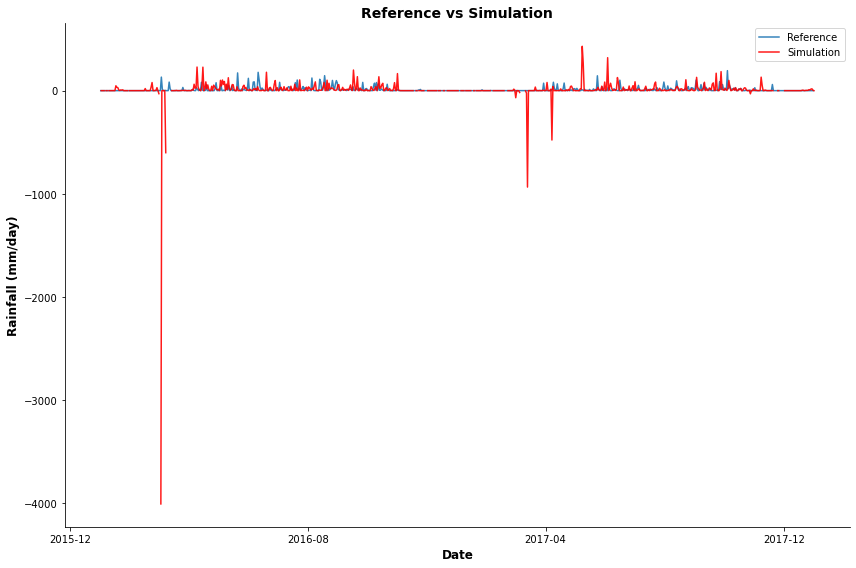

In [216]:
ref_sliced = ds_ref.sel(lat=6.5,lon=8.125,time=slice("2016","2017"))
scenQDM585_sliced = scenQDM585.sel(lat=6.5,lon=8.125,time=slice("2016","2017"))

# We create a canvas with one ax
fig, axes = plt.subplots(1, 1, figsize=(12,8))

# We plot on our first axis
axes.plot(ref_sliced.time, ref_sliced, alpha=0.9)
axes.plot(scenQDM585_sliced.time, scenQDM585_sliced, alpha=0.9,c='r')

# Set a title
axes.set_title('Reference vs Simulation',size=14,fontweight='bold')
axes.set_xlabel('Date',size=12,fontweight='semibold')
axes.set_ylabel('Rainfall (mm/day)',size=12,fontweight='semibold')


# Hide the right and top spines
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)

# We tight the layout
fig.tight_layout()

axes.legend(['Reference', 'Simulation'])
# We plot
plt.show()

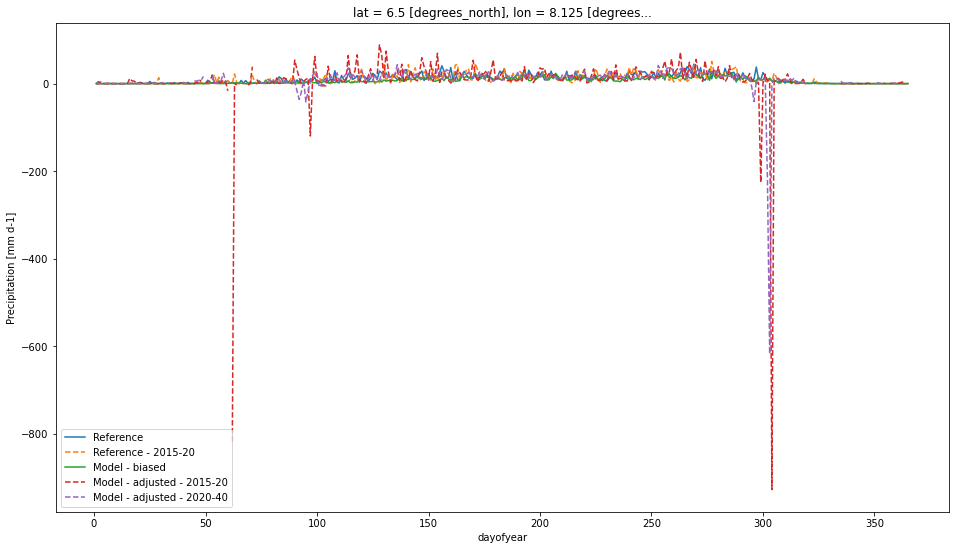

In [217]:
plt.figure(figsize=(16,9))
ref.sel(
    lat=6.5,lon=8.125,time=slice(None,"2015")).groupby(
        "time.dayofyear").mean().plot(label="Reference")
ds_ref.sel(lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
    "time.dayofyear").mean().plot(
        label="Reference - 2015-20", linestyle="--")
hist.sel(
    lat=6.5,lon=8.125,time=slice(None,"2015")).groupby(
        "time.dayofyear").mean().plot(label="Model - biased")
scenQDM585.sel(
    lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
        "time.dayofyear").mean().plot(
            label="Model - adjusted - 2015-20", linestyle="--")
scenQDM585.sel(lat=6.5,lon=8.125,time=slice("2020", "2040")).groupby(
    "time.dayofyear").mean().plot(
        label="Model - adjusted - 2020-40", linestyle="--")
plt.legend()

In [218]:
# Frequency adaptation for pr bias correction

sim_ad, pth, dP0 = sdba.processing.adapt_freq(
    ref, ds_sim, thresh="0.05 mm d-1", group=group_month
)

In [219]:
# train frequency adapt

QM_ad = sdba.EmpiricalQuantileMapping.train(
    ref, sim_ad, nquantiles=15, group=group_month, kind="*"
)

In [220]:
scen_ad = QM_ad.adjust(ds_sim, extrapolation="constant", interp="linear")
scen_ad

<xarray.DataArray 'scen' (time: 31390, lat: 30, lon: 30)>
array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00, -2.22023738e-04, -5.08226366e-05, ...,
          2.25202675e-05,  1.43866989e-03,  0.00000000e+00],
        [ 0.00000000e+00, -0.00000000e+00, -8.87755246e-07, ...,
                    -inf,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  7.08369040e-01,  6.92114177e-01, ...,
                    -inf,            -inf,  0.00000000e+00],
        [ 0.00000000e+00,  3.09323113e-01,  2.81440580e-01, ...,
                    -inf,            -inf,             nan],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
                     nan,             nan,  0.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00, -1.80865627e-05, -2.28433707e-06, ...,
          8.00710424e+00,  2.45074983e+01,  0.00000000e+00],
        [ 0.00000000e+00, -3.72565494e-05, -7.64005929e-07, ...,
          8.23367217e-03,  1.70632752e-01,  0.00000000e+00],
...
        [ 0.00000000e+00,  8.88747693e+00,  7.37694216e+00, ...,
          4.21608376e-05,  8.59032425e-01,  0.00000000e+00],
        [ 0.00000000e+00,  2.47341781e+00,  7.61005354e-01, ...,
          1.58548678e-04,  7.32786963e-01,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  2.92087706e+00,  1.33053354e+00, ...,
                    -inf,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  2.00734102e+01,  1.10906957e+01, ...,
                    -inf,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  2.02833166e+00,  4.26124783e-01, ...,
          7.03232552e-08,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  4.17849429e-03,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]])
Coordinates:
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * time     (time) object 2015-01-01 12:00:00 ... 2100-12-31 12:00:00
Attributes:
    long_name:        Precipitation
    units:            mm d-1
    cell_methods:     area: time: mean
    cell_measures:    area: areacella
    standard_name:    precipitation_flux
    interp_method:    conserve_order1
    original_name:    pr
    history:          [2022-04-04 23:27:58] : Bias-adjusted with EmpiricalQua...
    bias_adjustment:  EmpiricalQuantileMapping(group=Grouper(add_dims=[], nam...

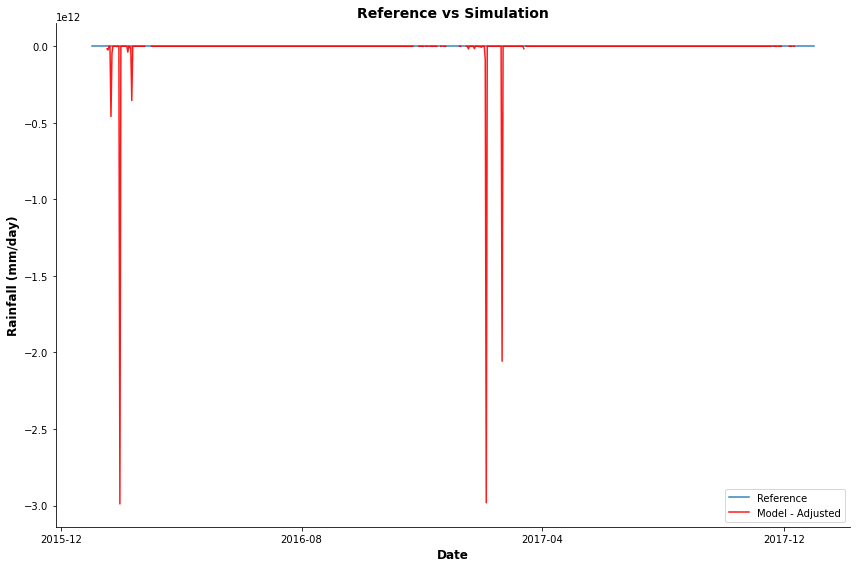

In [221]:
# Plot reference data against adjusted simulation data
ref_sliced = ds_ref.sel(lat=6.5,lon=8.125,time=slice("2016","2017"))
scen_ad_sliced = scen_ad.sel(lat=6.5,lon=8.125,time=slice("2016","2017"))

# We create a canvas with one ax
fig, axes = plt.subplots(1, 1, figsize=(12,8))

# We plot on our first axis
axes.plot(ref_sliced.time, ref_sliced, alpha=0.9)
axes.plot(scen_ad_sliced.time, scen_ad_sliced, alpha=0.9,c='r')

# Set a title
axes.set_title('Reference vs Simulation',size=14,fontweight='bold')
axes.set_xlabel('Date',size=12,fontweight='semibold')
axes.set_ylabel('Rainfall (mm/day)',size=12,fontweight='semibold')


# Hide the right and top spines
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)

# We tight the layout
fig.tight_layout()

axes.legend(['Reference', 'Model - Adjusted'])
# We plot
plt.show()

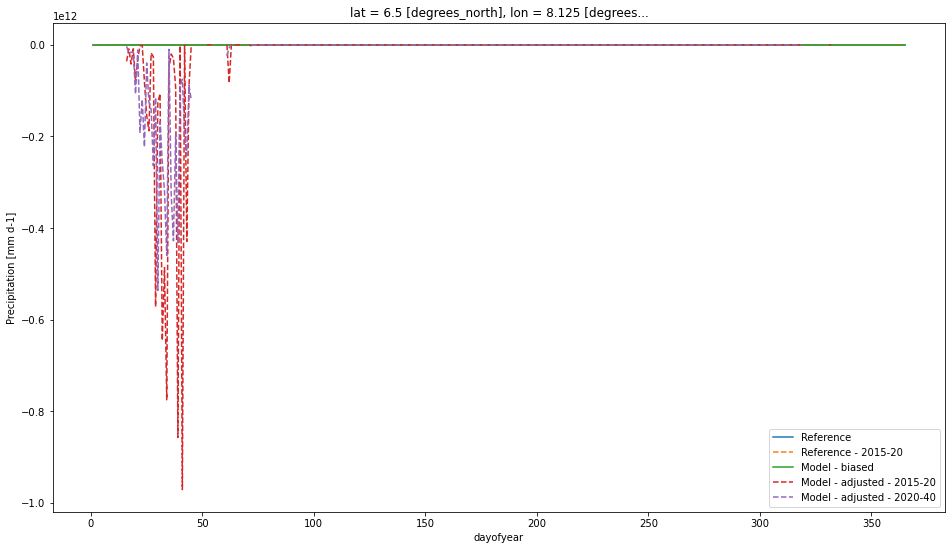

In [222]:
# Plot multiple line graph
plt.figure(figsize=(16,9))
ref.sel(
    lat=6.5,lon=8.125,time=slice(None,"2015")).groupby(
        "time.dayofyear").mean().plot(label="Reference")
ds_ref.sel(lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
    "time.dayofyear").mean().plot(
        label="Reference - 2015-20", linestyle="--")
hist.sel(
    lat=6.5,lon=8.125,time=slice(None,"2015")).groupby(
        "time.dayofyear").mean().plot(label="Model - biased")
scen_ad.sel(
    lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
        "time.dayofyear").mean().plot(
            label="Model - adjusted - 2015-20", linestyle="--")
scen_ad.sel(lat=6.5,lon=8.125,time=slice("2020", "2040")).groupby(
    "time.dayofyear").mean().plot(
        label="Model - adjusted - 2020-40", linestyle="--")
plt.legend()

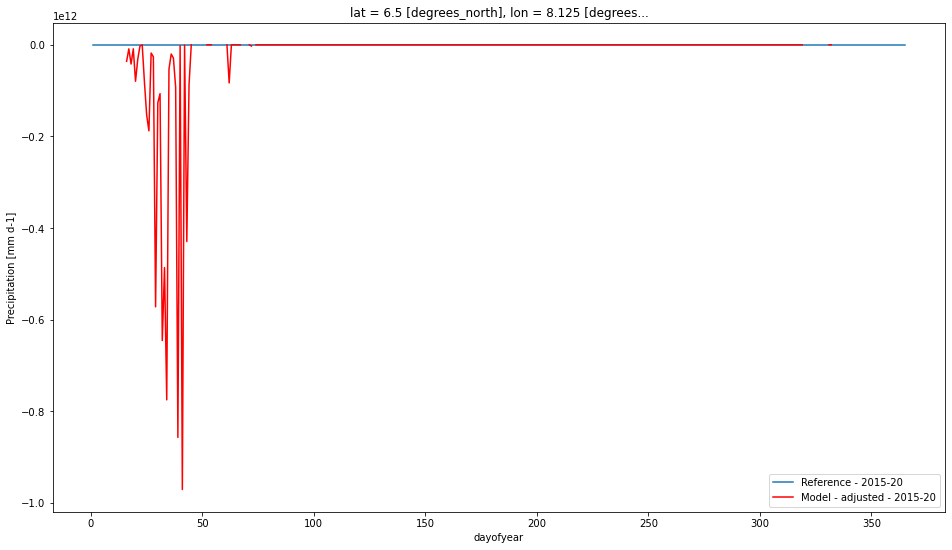

In [223]:
plt.figure(figsize=(16,9))

ds_ref.sel(lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
    "time.dayofyear").mean().plot(
        label="Reference - 2015-20")
scen_ad.sel(
    lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
        "time.dayofyear").mean().plot(
            label="Model - adjusted - 2015-20",c='r')

plt.legend()

In [224]:
ds_ref.sel(lat=6.5,lon=8.125,time="2020-09-15").values

array([14.96030223])

In [225]:
scen_ad.sel(lat=6.5,lon=8.125,time="2020-09-15").values

array([12.5294747])

In [226]:
QM_ad.ds

<xarray.Dataset>
Dimensions:    (quantiles: 15, lat: 30, lon: 30, month: 12)
Coordinates:
  * quantiles  (quantiles) float64 0.03333 0.1 0.1667 ... 0.8333 0.9 0.9667
  * lat        (lat) float64 1.5 2.5 3.5 4.5 5.5 ... 26.5 27.5 28.5 29.5 30.5
  * lon        (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    af         (lat, lon, month, quantiles) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    hist_q     (lat, lon, month, quantiles) float64 0.00266 0.03753 ... 1.077
Attributes:
    group:               time.month
    group_compute_dims:  ['time']
    group_window:        1
    _xclim_adjustment:   {"py/object": "xclim.sdba.adjustment.EmpiricalQuanti...
    adj_params:          EmpiricalQuantileMapping(group=Grouper(add_dims=[], ...

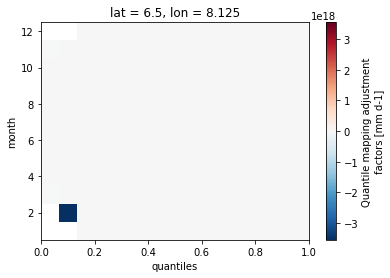

In [227]:
QM_ad.ds.sel(lat=6.5,lon=8.125).af.plot()

In [228]:
# Empirical Quantile Mapping Adjustment with frequency adapt for ssp585
# Frequency adaptation for pr bias correction

sim585_ad, pth, dP0 = sdba.processing.adapt_freq(
    ref, ds_sim585, thresh="0.05 mm d-1", group=group_month
)

In [229]:
# train frequency adapt

QM585_ad = sdba.EmpiricalQuantileMapping.train(
    ref, sim585_ad, nquantiles=15, group=group_month, kind="*"
)

In [230]:
scen585_ad = QM585_ad.adjust(ds_sim585, extrapolation="constant", interp="linear")
scen585_ad

<xarray.DataArray 'scen' (time: 31390, lat: 30, lon: 30)>
array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00, -5.45338650e-04, -1.56865578e-04, ...,
          8.99864757e-02,  1.40695274e-03,  0.00000000e+00],
        [ 0.00000000e+00, -0.00000000e+00, -1.96817725e-06, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  6.59711393e-01,  7.54727460e-01, ...,
                    -inf,            -inf,  0.00000000e+00],
        [ 0.00000000e+00,  3.59418144e-01,  3.16282233e-01, ...,
                    -inf,            -inf,             nan],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,             nan]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00, -2.52626459e-05, -4.06850951e-06, ...,
          2.72925252e+01,  2.42169413e+01,  0.00000000e+00],
        [ 0.00000000e+00, -5.20405899e-05, -1.78567309e-06, ...,
          5.32436772e-03,  1.32850623e-02,  0.00000000e+00],
...
        [ 0.00000000e+00,  1.11481107e-06,            -inf, ...,
          0.00000000e+00,            -inf,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,            -inf,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  5.40786913e-01,  3.89577931e-01, ...,
          1.85287656e-01,  5.57806455e+00,  0.00000000e+00],
        [ 0.00000000e+00,  5.39555384e-03,  1.97629410e-07, ...,
          0.00000000e+00,  6.30625898e-02,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  6.55329069e+00,  2.33021013e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  8.79544889e+00,  7.07771349e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]])
Coordinates:
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * time     (time) object 2015-01-01 12:00:00 ... 2100-12-31 12:00:00
Attributes:
    long_name:        Precipitation
    units:            mm d-1
    cell_methods:     area: time: mean
    cell_measures:    area: areacella
    standard_name:    precipitation_flux
    interp_method:    conserve_order1
    original_name:    pr
    history:          [2022-04-04 23:28:27] : Bias-adjusted with EmpiricalQua...
    bias_adjustment:  EmpiricalQuantileMapping(group=Grouper(add_dims=[], nam...

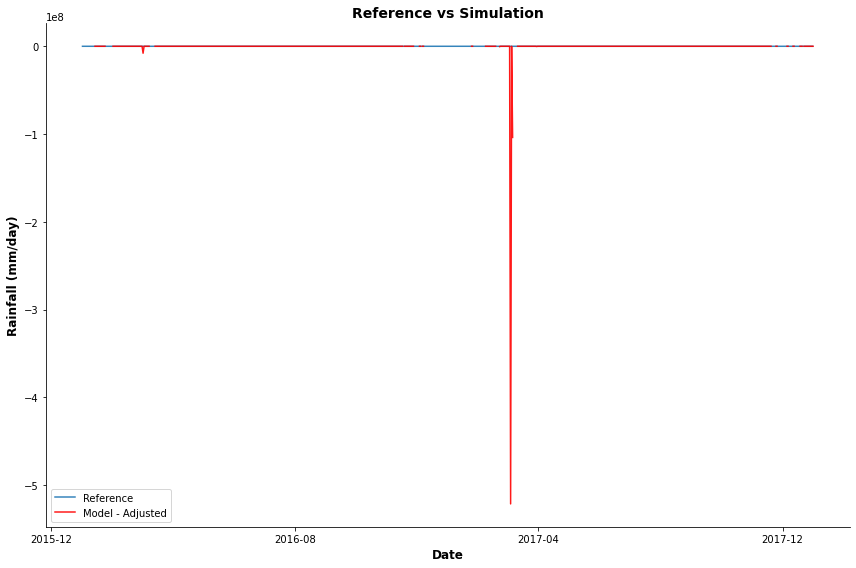

In [231]:
# Plot reference data against adjusted simulation data
ref_sliced = ds_ref.sel(lat=6.5,lon=8.125,time=slice("2016","2017"))
scen_ad_sliced = scen585_ad.sel(lat=6.5,lon=8.125,time=slice("2016","2017"))

# We create a canvas with one ax
fig, axes = plt.subplots(1, 1, figsize=(12,8))

# We plot on our first axis
axes.plot(ref_sliced.time, ref_sliced, alpha=0.9)
axes.plot(scen_ad_sliced.time, scen_ad_sliced, alpha=0.9,c='r')

# Set a title
axes.set_title('Reference vs Simulation',size=14,fontweight='bold')
axes.set_xlabel('Date',size=12,fontweight='semibold')
axes.set_ylabel('Rainfall (mm/day)',size=12,fontweight='semibold')


# Hide the right and top spines
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)

# We tight the layout
fig.tight_layout()

axes.legend(['Reference', 'Model - Adjusted'])
# We plot
plt.show()

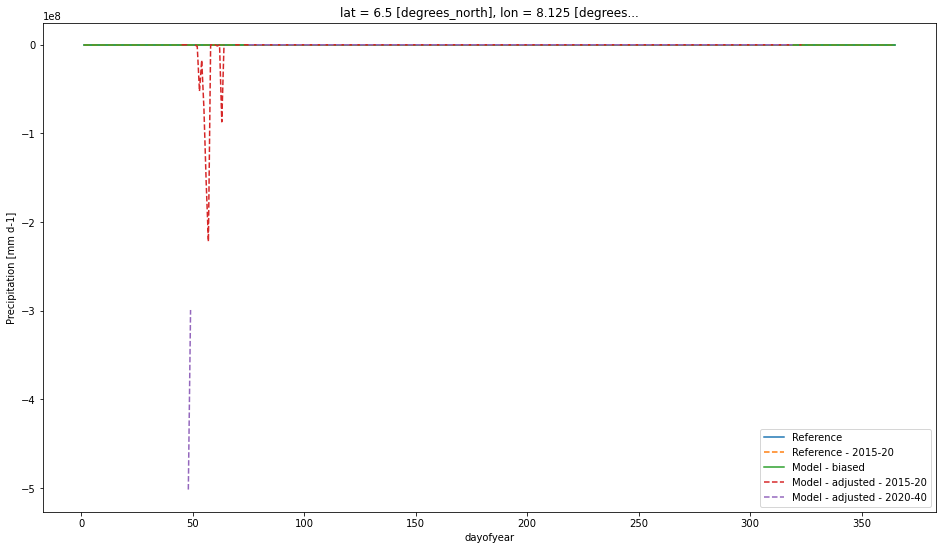

In [232]:
# Plot multiple line graph
plt.figure(figsize=(16,9))
ref.sel(
    lat=6.5,lon=8.125,time=slice(None,"2015")).groupby(
        "time.dayofyear").mean().plot(label="Reference")
ds_ref.sel(lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
    "time.dayofyear").mean().plot(
        label="Reference - 2015-20", linestyle="--")
hist.sel(
    lat=6.5,lon=8.125,time=slice(None,"2015")).groupby(
        "time.dayofyear").mean().plot(label="Model - biased")
scen585_ad.sel(
    lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
        "time.dayofyear").mean().plot(
            label="Model - adjusted - 2015-20", linestyle="--")
scen585_ad.sel(lat=6.5,lon=8.125,time=slice("2020", "2040")).groupby(
    "time.dayofyear").mean().plot(
        label="Model - adjusted - 2020-40", linestyle="--")
plt.legend()

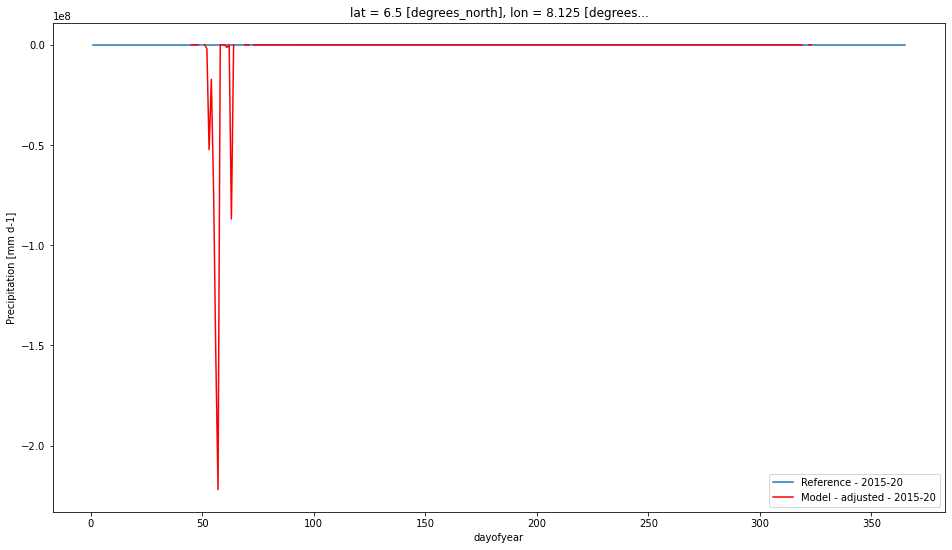

In [233]:
plt.figure(figsize=(16,9))

ds_ref.sel(lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
    "time.dayofyear").mean().plot(
        label="Reference - 2015-20")
scen585_ad.sel(
    lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
        "time.dayofyear").mean().plot(
            label="Model - adjusted - 2015-20",c='r')

plt.legend()

In [234]:
ds_ref.sel(lat=6.5,lon=8.125,time="2020-09-15").values

array([14.96030223])

In [235]:
scen585_ad.sel(lat=6.5,lon=8.125,time="2020-09-15").values

array([0.04456592])

In [236]:
# Second Model (Quantile Delta Mapping)

In [237]:
# We want to group data on a day-of-year basis with a 31-day moving window
group_month = xclim.sdba.Grouper('time.month')

In [238]:
QDM_ad = sdba.QuantileDeltaMapping.train(
    ref, sim_ad, nquantiles=15, group=group_month, kind="*"
)

In [239]:
scenQDM_ad = QDM_ad.adjust(ds_sim, extrapolation="constant", interp="linear")
scenQDM_ad

<xarray.DataArray 'scen' (time: 31390, lat: 30, lon: 30)>
array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00, -2.04140716e-04, -5.08226366e-05, ...,
          4.27698527e-03,  6.63096906e-02,  0.00000000e+00],
        [ 0.00000000e+00, -0.00000000e+00, -8.87755246e-07, ...,
          0.00000000e+00,  2.17415670e-07,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  6.98433849e-01,  6.89816439e-01, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  2.64059384e-01,  2.13217448e-01, ...,
          0.00000000e+00,  0.00000000e+00,             nan],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
                     nan,  0.00000000e+00,  0.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00, -1.80865627e-05, -2.28433707e-06, ...,
          8.48098339e+00,  2.46104174e+01,  0.00000000e+00],
        [ 0.00000000e+00, -3.72565494e-05, -7.64005929e-07, ...,
          1.09838557e+00,  2.76667119e+00,  0.00000000e+00],
...
        [ 0.00000000e+00,  9.23974456e+00,  7.44904946e+00, ...,
          4.80976297e-02,  1.52608892e+00,  0.00000000e+00],
        [ 0.00000000e+00,  2.48763549e+00,  7.96056704e-01, ...,
          6.54176641e-02,  2.46546221e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  7.53495711e-01,  3.19480635e-01, ...,
                    -inf,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  1.68006005e+01,  8.50987668e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  2.33277648e+00,  4.43740752e-01, ...,
          7.25609643e-04,  1.09872059e-01,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          3.95824405e-04,  1.45855013e-01,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]])
Coordinates:
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * time     (time) object 2015-01-01 12:00:00 ... 2100-12-31 12:00:00
Attributes:
    long_name:        Precipitation
    units:            mm d-1
    cell_methods:     area: time: mean
    cell_measures:    area: areacella
    standard_name:    precipitation_flux
    interp_method:    conserve_order1
    original_name:    pr
    history:          [2022-04-04 23:28:50] : Bias-adjusted with QuantileDelt...
    bias_adjustment:  QuantileDeltaMapping(group=Grouper(add_dims=[], name='t...

In [240]:
ds_ref.sel(lat=6.5,lon=8.125,time="2020-09-15").values

array([14.96030223])

In [241]:
scenQDM_ad.sel(lat=6.5,lon=8.125,time="2020-09-15").values

array([12.57514572])

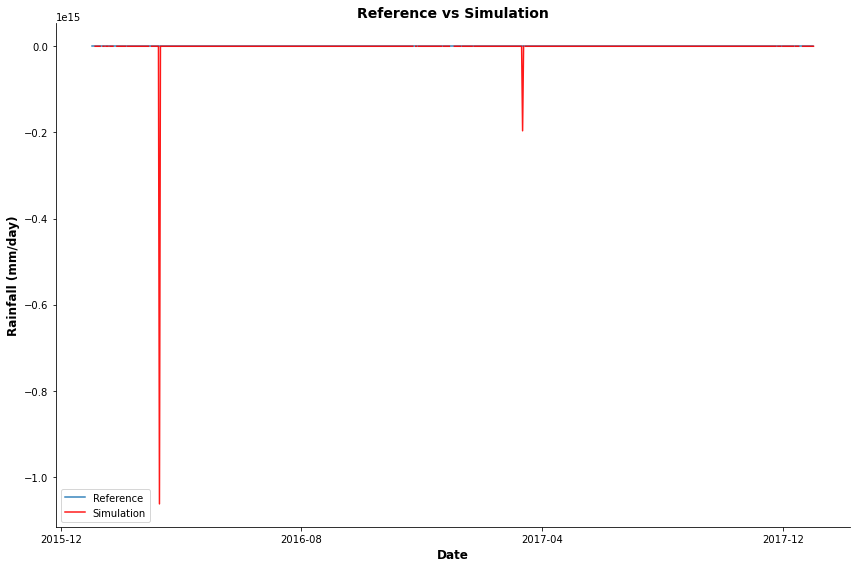

In [242]:
ref_sliced = ds_ref.sel(lat=6.5,lon=8.125,time=slice("2016","2017"))
scenQDM_sliced = scenQDM_ad.sel(lat=6.5,lon=8.125,time=slice("2016","2017"))

# We create a canvas with one ax
fig, axes = plt.subplots(1, 1, figsize=(12,8))

# We plot on our first axis
axes.plot(ref_sliced.time, ref_sliced, alpha=0.9)
axes.plot(scenQDM_sliced.time, scenQDM_sliced, alpha=0.9,c='r')

# Set a title
axes.set_title('Reference vs Simulation',size=14,fontweight='bold')
axes.set_xlabel('Date',size=12,fontweight='semibold')
axes.set_ylabel('Rainfall (mm/day)',size=12,fontweight='semibold')


# Hide the right and top spines
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)

# We tight the layout
fig.tight_layout()

axes.legend(['Reference', 'Simulation'])
# We plot
plt.show()

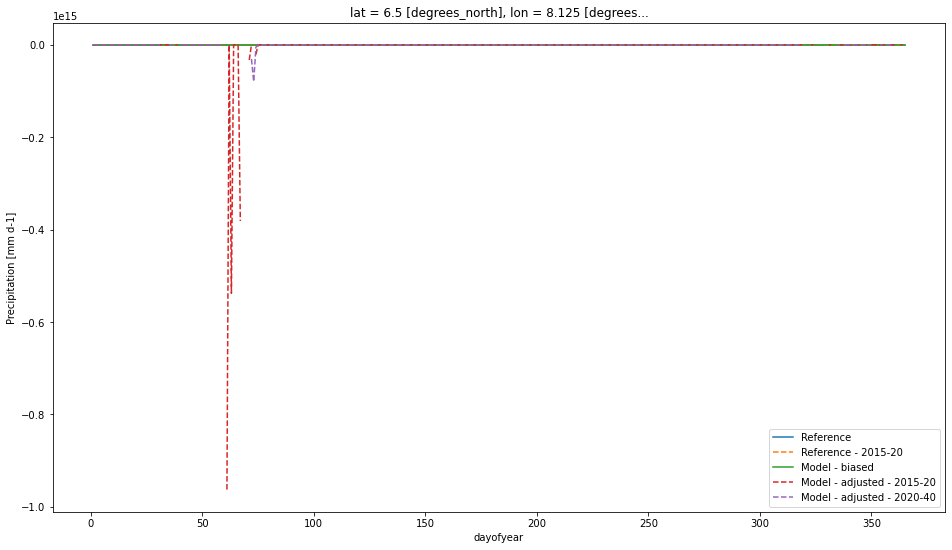

In [243]:
plt.figure(figsize=(16,9))
ref.sel(
    lat=6.5,lon=8.125,time=slice(None,"2015")).groupby(
        "time.dayofyear").mean().plot(label="Reference")
ds_ref.sel(lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
    "time.dayofyear").mean().plot(
        label="Reference - 2015-20", linestyle="--")
hist.sel(
    lat=6.5,lon=8.125,time=slice(None,"2015")).groupby(
        "time.dayofyear").mean().plot(label="Model - biased")
scenQDM_ad.sel(
    lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
        "time.dayofyear").mean().plot(
            label="Model - adjusted - 2015-20", linestyle="--")
scenQDM_ad.sel(lat=6.5,lon=8.125,time=slice("2020", "2040")).groupby(
    "time.dayofyear").mean().plot(
        label="Model - adjusted - 2020-40", linestyle="--")
plt.legend()

In [244]:
# Frequenct adapt for pr (Quantile Delta Mapping) for ssp585
# Frequency adaptation for pr bias correction

sim585_ad, pth, dP0 = sdba.processing.adapt_freq(
    ref, ds_sim585, thresh="0.05 mm d-1", group=group_month
)

In [245]:
# train frequency adapt

QDM585_ad = sdba.EmpiricalQuantileMapping.train(
    ref, sim585_ad, nquantiles=15, group=group_month, kind="*"
)

In [246]:
scenQDM585_ad = QDM585_ad.adjust(ds_sim585, extrapolation="constant", interp="linear")
scenQDM585_ad

<xarray.DataArray 'scen' (time: 31390, lat: 30, lon: 30)>
array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00, -5.45338650e-04, -1.56865578e-04, ...,
          7.47109782e-02,  1.37484953e-03,  0.00000000e+00],
        [ 0.00000000e+00, -0.00000000e+00, -1.96817725e-06, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  6.59711393e-01,  7.54727460e-01, ...,
                    -inf,            -inf,  0.00000000e+00],
        [ 0.00000000e+00,  3.59418144e-01,  3.16282233e-01, ...,
                    -inf,            -inf,             nan],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,             nan]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00, -2.52626459e-05, -4.06850951e-06, ...,
          2.72925252e+01,  2.42169413e+01,  0.00000000e+00],
        [ 0.00000000e+00, -5.20405899e-05, -1.78567309e-06, ...,
          6.48888421e-03,  1.21899001e-02,  0.00000000e+00],
...
        [ 0.00000000e+00,  1.11481107e-06,            -inf, ...,
          0.00000000e+00,            -inf,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,            -inf,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  5.40786913e-01,  3.89577931e-01, ...,
          1.73473758e-01,  5.66244494e+00,  0.00000000e+00],
        [ 0.00000000e+00,  5.39555384e-03,  1.97629410e-07, ...,
          0.00000000e+00,  6.31206925e-02,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  6.55329069e+00,  2.33021013e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  8.79544889e+00,  7.07771349e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]])
Coordinates:
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * time     (time) object 2015-01-01 12:00:00 ... 2100-12-31 12:00:00
Attributes:
    long_name:        Precipitation
    units:            mm d-1
    cell_methods:     area: time: mean
    cell_measures:    area: areacella
    standard_name:    precipitation_flux
    interp_method:    conserve_order1
    original_name:    pr
    history:          [2022-04-04 23:29:17] : Bias-adjusted with EmpiricalQua...
    bias_adjustment:  EmpiricalQuantileMapping(group=Grouper(add_dims=[], nam...

In [247]:
ds_ref.sel(lat=6.5,lon=8.125,time="2020-09-15").values

array([14.96030223])

In [248]:
scenQDM585_ad.sel(lat=6.5,lon=8.125,time="2020-09-15").values

array([0.04456592])

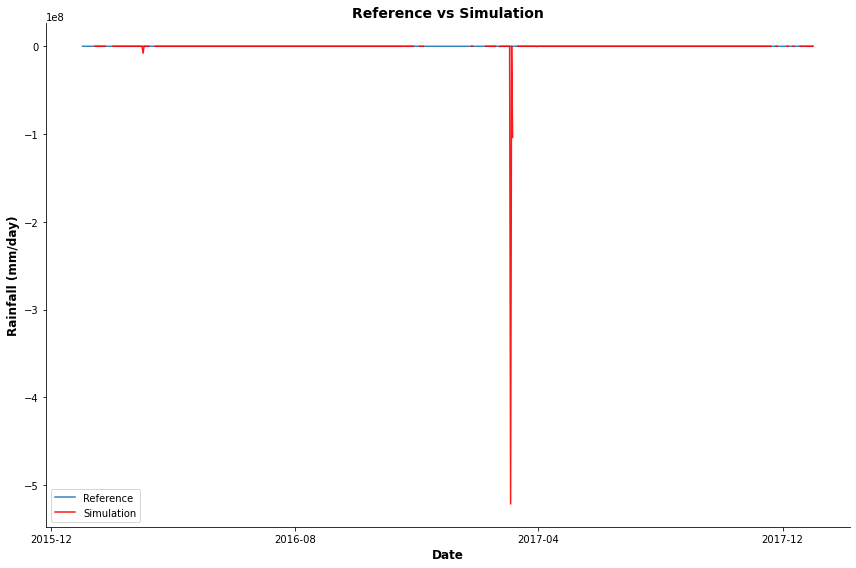

In [249]:
ref_sliced = ds_ref.sel(lat=6.5,lon=8.125,time=slice("2016","2017"))
scenQDM585_ad_sliced = scenQDM585_ad.sel(lat=6.5,lon=8.125,time=slice("2016","2017"))

# We create a canvas with one ax
fig, axes = plt.subplots(1, 1, figsize=(12,8))

# We plot on our first axis
axes.plot(ref_sliced.time, ref_sliced, alpha=0.9)
axes.plot(scenQDM585_ad_sliced.time, scenQDM585_ad_sliced, alpha=0.9,c='r')

# Set a title
axes.set_title('Reference vs Simulation',size=14,fontweight='bold')
axes.set_xlabel('Date',size=12,fontweight='semibold')
axes.set_ylabel('Rainfall (mm/day)',size=12,fontweight='semibold')


# Hide the right and top spines
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)

# We tight the layout
fig.tight_layout()

axes.legend(['Reference', 'Simulation'])
# We plot
plt.show()

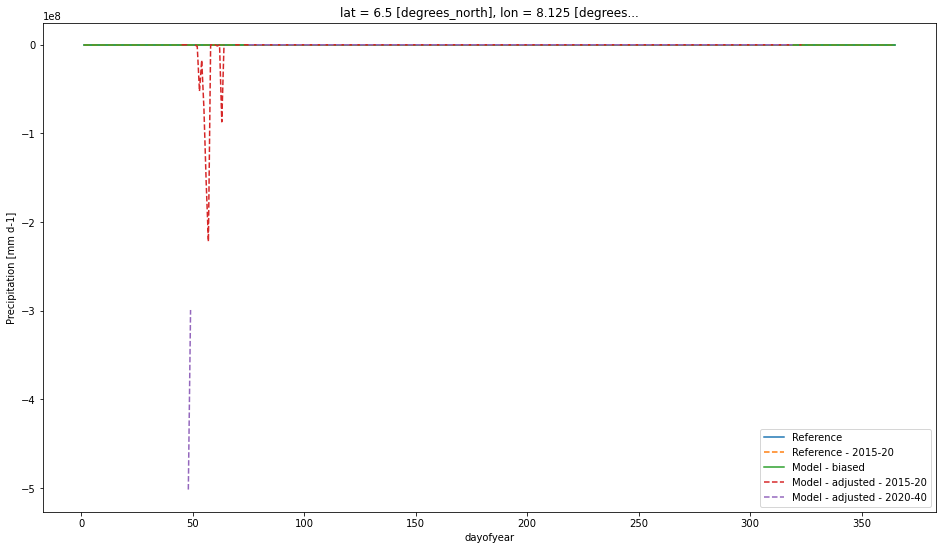

In [250]:
plt.figure(figsize=(16,9))
ref.sel(
    lat=6.5,lon=8.125,time=slice(None,"2015")).groupby(
        "time.dayofyear").mean().plot(label="Reference")
ds_ref.sel(lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
    "time.dayofyear").mean().plot(
        label="Reference - 2015-20", linestyle="--")
hist.sel(
    lat=6.5,lon=8.125,time=slice(None,"2015")).groupby(
        "time.dayofyear").mean().plot(label="Model - biased")
scenQDM585_ad.sel(
    lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
        "time.dayofyear").mean().plot(
            label="Model - adjusted - 2015-20", linestyle="--")
scenQDM585_ad.sel(lat=6.5,lon=8.125,time=slice("2020", "2040")).groupby(
    "time.dayofyear").mean().plot(
        label="Model - adjusted - 2020-40", linestyle="--")
plt.legend()

In [251]:
# Local Intensity Scaling bias-adjustment
# We want to group data on a day-of-year basis with a 31-day moving window
group_month = xclim.sdba.Grouper('time.month')

In [252]:
LOCI = sdba.LOCI.train(
    ref, hist, thresh="1.00 mm d-1", group=group_month
)

In [253]:
scenLOCI = LOCI.adjust(ds_sim, interp="linear")
scenLOCI

<xarray.DataArray 'scen' (time: 31390, lat: 30, lon: 30)>
array([[[           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan, 0.00000000e+00, ...,
         2.99195242e-01, 0.00000000e+00,            nan],
        ...,
        [           nan,            nan, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00,            nan],
        [           nan,            nan, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan]],

       [[           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan, 0.00000000e+00, ...,
         2.95777213e+00, 8.42900653e+00,            nan],
...
        [           nan,            nan, 6.54230851e+00, ...,
         0.00000000e+00, 2.17245914e+00,            nan],
        [           nan,            nan, 0.00000000e+00, ...,
         0.00000000e+00, 2.40361887e+00,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan]],

       [[           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan, 6.10317017e+00, ...,
         3.36033316e-01, 3.73299350e-02,            nan],
        ...,
        [           nan,            nan, 0.00000000e+00, ...,
         0.00000000e+00, 2.31794662e-01,            nan],
        [           nan,            nan, 0.00000000e+00, ...,
         0.00000000e+00, 4.98843255e-02,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan]]])
Coordinates:
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * time     (time) object 2015-01-01 12:00:00 ... 2100-12-31 12:00:00
Attributes:
    long_name:        Precipitation
    units:            mm d-1
    cell_methods:     area: time: mean
    cell_measures:    area: areacella
    standard_name:    precipitation_flux
    interp_method:    conserve_order1
    original_name:    pr
    history:          [2022-04-04 23:29:30] : Bias-adjusted with LOCI(group=G...
    bias_adjustment:  LOCI(group=Grouper(add_dims=[], name='time.month', wind...

In [254]:
scenLOCI_hist = LOCI.adjust(ds_hist, interp="linear")
scenLOCI_hist

<xarray.DataArray 'scen' (time: 60225, lat: 30, lon: 30)>
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan, 0.        , ..., 0.30971327,
         0.27174771,        nan],
        ...,
        [       nan,        nan, 0.        , ..., 0.        ,
         0.        ,        nan],
        [       nan,        nan, 0.        , ..., 0.        ,
         0.        ,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan, 0.        , ..., 0.2626902 ,
         0.        ,        nan],
...
        [       nan,        nan, 0.        , ..., 0.        ,
         0.        ,        nan],
        [       nan,        nan, 0.        , ..., 0.        ,
         0.        ,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan, 0.        , ..., 0.33597666,
         0.036843  ,        nan],
        ...,
        [       nan,        nan, 0.        , ..., 0.        ,
         0.        ,        nan],
        [       nan,        nan, 0.        , ..., 0.        ,
         0.        ,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]]])
Coordinates:
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * time     (time) object 1850-01-01 12:00:00 ... 2014-12-31 12:00:00
Attributes:
    long_name:        Precipitation
    units:            mm d-1
    cell_methods:     area: time: mean
    cell_measures:    area: areacella
    standard_name:    precipitation_flux
    interp_method:    conserve_order1
    original_name:    pr
    history:          [2022-04-04 23:29:41] : Bias-adjusted with LOCI(group=G...
    bias_adjustment:  LOCI(group=Grouper(add_dims=[], name='time.month', wind...

In [255]:
scenLOCI_hist.sel(lat=6.5,lon=8.125,time="2014-09-15").values

array([1.82614155])

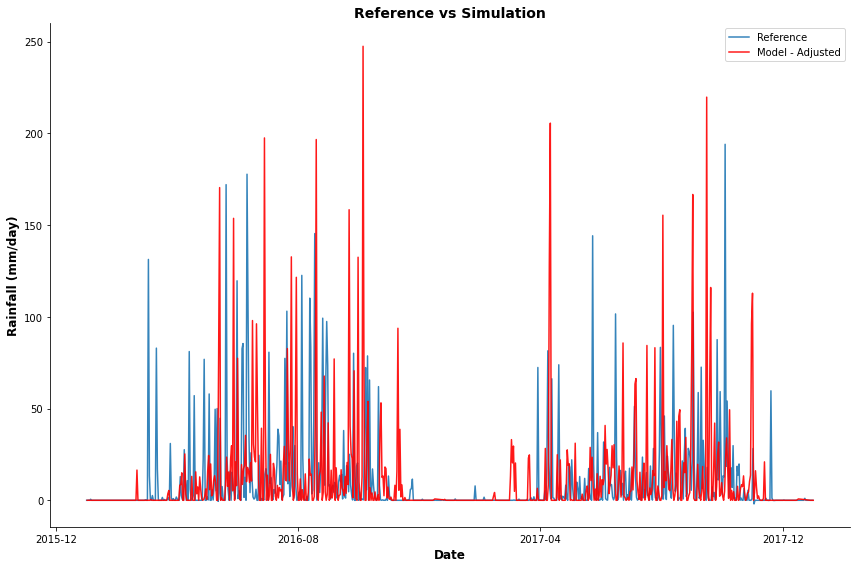

In [256]:
# Plot reference data against adjusted simulation data
ref_sliced = ds_ref.sel(lat=6.5,lon=8.125,time=slice("2016","2017"))
scenLOCI_sliced = scenLOCI.sel(lat=6.5,lon=8.125,time=slice("2016","2017"))

# We create a canvas with one ax
fig, axes = plt.subplots(1, 1, figsize=(12,8))

# We plot on our first axis
axes.plot(ref_sliced.time, ref_sliced, alpha=0.9)
axes.plot(scenLOCI_sliced.time, scenLOCI_sliced, alpha=0.9,c='r')

# Set a title
axes.set_title('Reference vs Simulation',size=14,fontweight='bold')
axes.set_xlabel('Date',size=12,fontweight='semibold')
axes.set_ylabel('Rainfall (mm/day)',size=12,fontweight='semibold')


# Hide the right and top spines
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)

# We tight the layout
fig.tight_layout()

axes.legend(['Reference', 'Model - Adjusted'])
# We plot
plt.show()

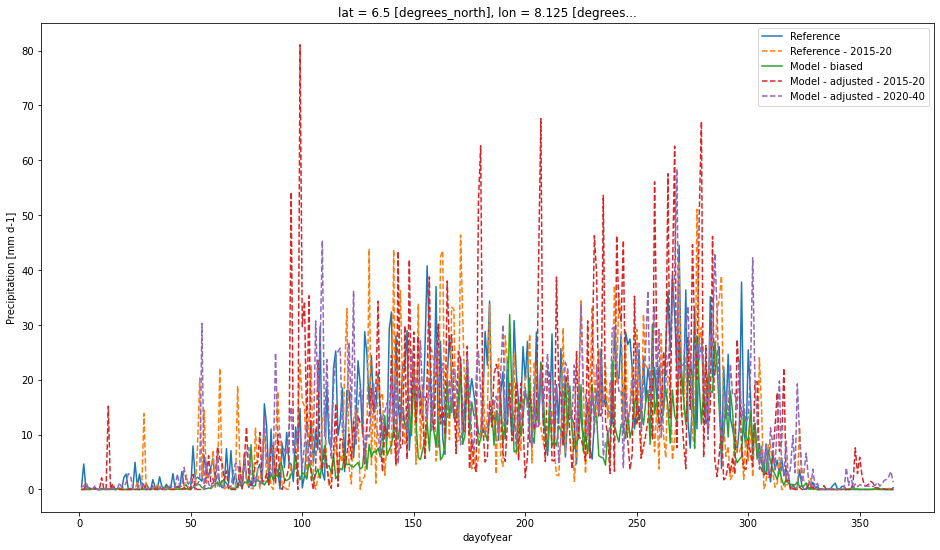

In [257]:
# Plot multiple line graph
plt.figure(figsize=(16,9))
ref.sel(
    lat=6.5,lon=8.125,time=slice(None,"2015")).groupby(
        "time.dayofyear").mean().plot(label="Reference")
ds_ref.sel(lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
    "time.dayofyear").mean().plot(
        label="Reference - 2015-20", linestyle="--")
hist.sel(
    lat=6.5,lon=8.125,time=slice(None,"2015")).groupby(
        "time.dayofyear").mean().plot(label="Model - biased")
scenLOCI.sel(
    lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
        "time.dayofyear").mean().plot(
            label="Model - adjusted - 2015-20", linestyle="--")
scenLOCI.sel(lat=6.5,lon=8.125,time=slice("2020", "2040")).groupby(
    "time.dayofyear").mean().plot(
        label="Model - adjusted - 2020-40", linestyle="--")
plt.legend()

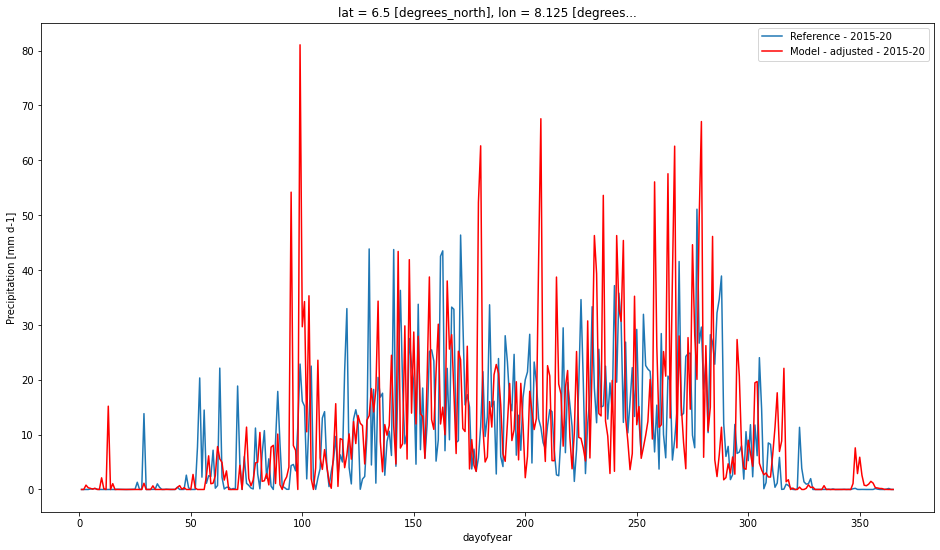

In [258]:
plt.figure(figsize=(16,9))

ds_ref.sel(lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
    "time.dayofyear").mean().plot(
        label="Reference - 2015-20")
scenLOCI.sel(
    lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
        "time.dayofyear").mean().plot(
            label="Model - adjusted - 2015-20",c='r')

plt.legend()

In [259]:
ds_ref.sel(lat=6.5,lon=8.125,time="2020-09-15").values

array([14.96030223])

In [260]:
scenLOCI.sel(lat=6.5,lon=8.125,time="2020-09-15").values

array([8.78908008])

In [261]:
LOCI.ds

<xarray.Dataset>
Dimensions:      (lon: 30, lat: 30, month: 12)
Coordinates:
  * lon          (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * lat          (lat) float64 1.5 2.5 3.5 4.5 5.5 ... 26.5 27.5 28.5 29.5 30.5
  * month        (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    af           (lat, lon, month) float64 nan nan nan nan ... nan nan nan nan
    hist_thresh  (lat, lon, month) float32 34.15 54.21 141.2 ... 7.049 6.93
Attributes:
    _xclim_adjustment:  {"py/object": "xclim.sdba.adjustment.LOCI", "py/state...
    adj_params:         LOCI(group=Grouper(add_dims=[], name='time.month', wi...

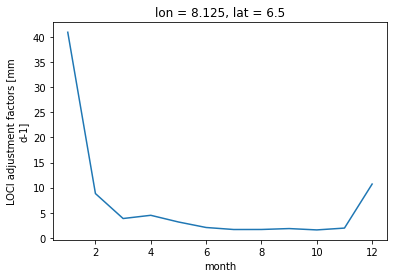

In [262]:
LOCI.ds.sel(lat=6.5,lon=8.125).af.plot()

In [263]:
# Empirical Quantile Mapping Adjustment for ssp585

scenLOCI585 = LOCI.adjust(ds_sim585, interp="linear")
scenLOCI585

<xarray.DataArray 'scen' (time: 31390, lat: 30, lon: 30)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,  0.        , ...,  0.29922065,
          0.        ,         nan],
        ...,
        [        nan,         nan,  0.        , ...,  0.        ,
          0.        ,         nan],
        [        nan,         nan,  0.        , ...,  0.        ,
          0.        ,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,  0.        , ...,  3.0090222 ,
          4.86745119,         nan],
...
        [        nan,         nan,  0.        , ...,  0.        ,
          0.        ,         nan],
        [        nan,         nan,  0.        , ...,  0.        ,
          0.        ,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,  0.        , ...,  0.33622292,
          7.37580838,         nan],
        ...,
        [        nan,         nan,  1.22100643, ...,  0.        ,
          0.        ,         nan],
        [        nan,         nan,  5.64406716, ...,  0.        ,
          0.        ,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]])
Coordinates:
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * time     (time) object 2015-01-01 12:00:00 ... 2100-12-31 12:00:00
Attributes:
    long_name:        Precipitation
    units:            mm d-1
    cell_methods:     area: time: mean
    cell_measures:    area: areacella
    standard_name:    precipitation_flux
    interp_method:    conserve_order1
    original_name:    pr
    history:          [2022-04-04 23:29:54] : Bias-adjusted with LOCI(group=G...
    bias_adjustment:  LOCI(group=Grouper(add_dims=[], name='time.month', wind...

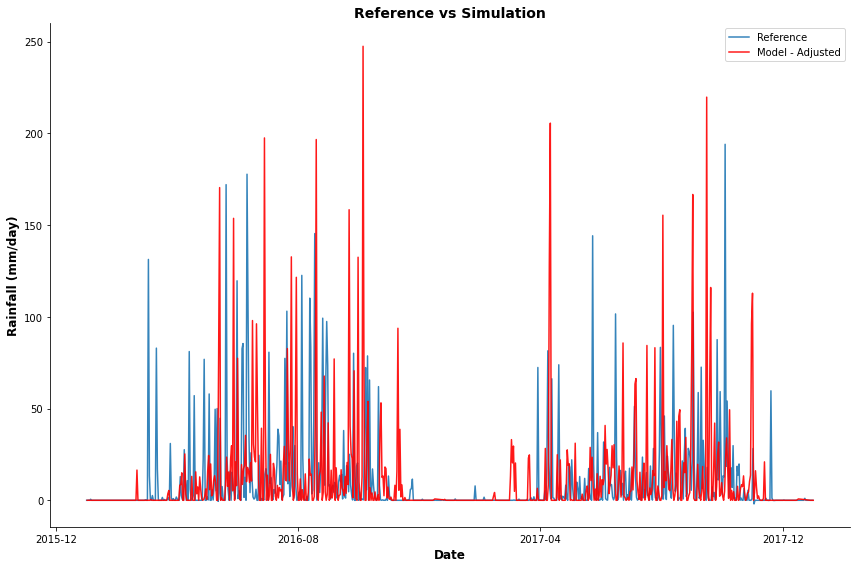

In [264]:
# Plot reference data against adjusted simulation data
ref_sliced = ds_ref.sel(lat=6.5,lon=8.125,time=slice("2016","2017"))
scenLOCI585_sliced = scenLOCI585.sel(lat=6.5,lon=8.125,time=slice("2016","2017"))

# We create a canvas with one ax
fig, axes = plt.subplots(1, 1, figsize=(12,8))

# We plot on our first axis
axes.plot(ref_sliced.time, ref_sliced, alpha=0.9)
axes.plot(scenLOCI_sliced.time, scenLOCI_sliced, alpha=0.9,c='r')

# Set a title
axes.set_title('Reference vs Simulation',size=14,fontweight='bold')
axes.set_xlabel('Date',size=12,fontweight='semibold')
axes.set_ylabel('Rainfall (mm/day)',size=12,fontweight='semibold')


# Hide the right and top spines
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)

# We tight the layout
fig.tight_layout()

axes.legend(['Reference', 'Model - Adjusted'])
# We plot
plt.show()

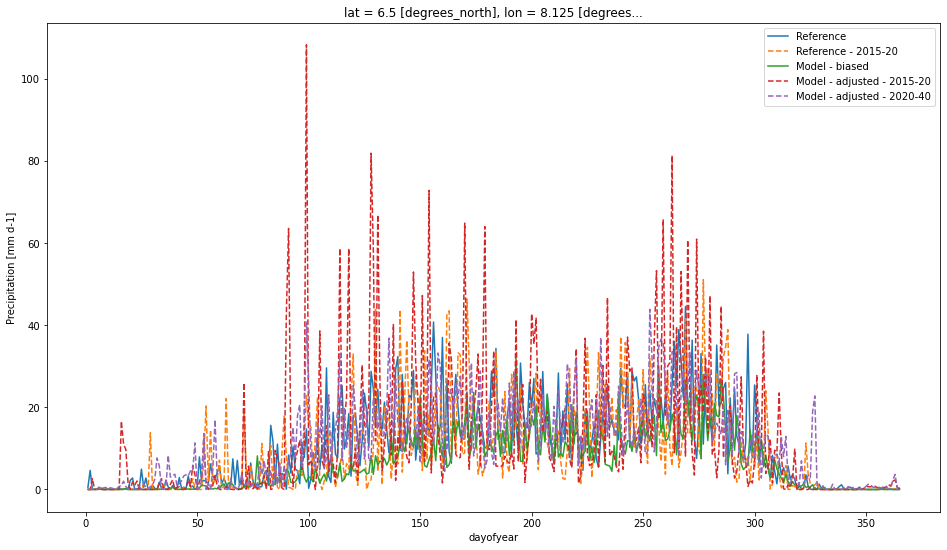

In [265]:
# Plot multiple line graph
plt.figure(figsize=(16,9))
ref.sel(
    lat=6.5,lon=8.125,time=slice(None,"2015")).groupby(
        "time.dayofyear").mean().plot(label="Reference")
ds_ref.sel(lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
    "time.dayofyear").mean().plot(
        label="Reference - 2015-20", linestyle="--")
hist.sel(
    lat=6.5,lon=8.125,time=slice(None,"2015")).groupby(
        "time.dayofyear").mean().plot(label="Model - biased")
scenLOCI585.sel(
    lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
        "time.dayofyear").mean().plot(
            label="Model - adjusted - 2015-20", linestyle="--")
scenLOCI585.sel(lat=6.5,lon=8.125,time=slice("2020", "2040")).groupby(
    "time.dayofyear").mean().plot(
        label="Model - adjusted - 2020-40", linestyle="--")
plt.legend()

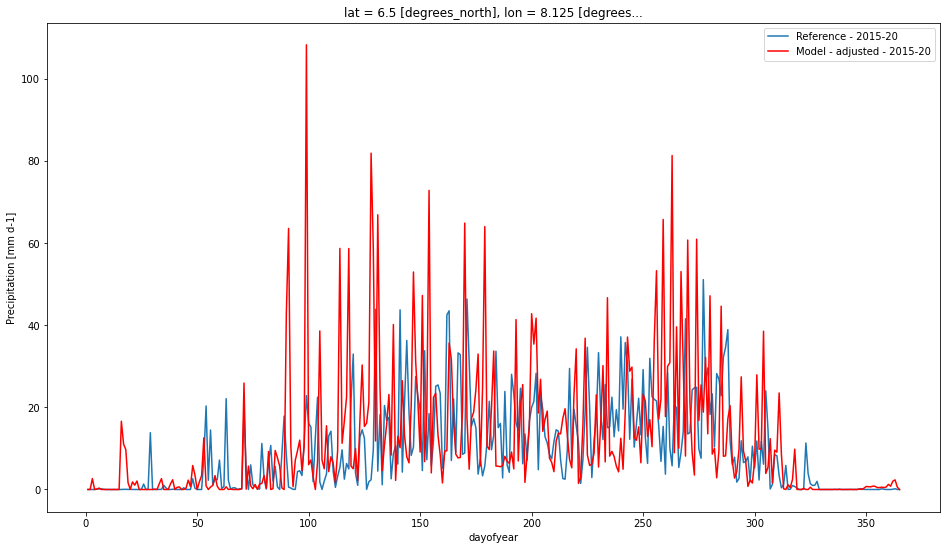

In [266]:
plt.figure(figsize=(16,9))

ds_ref.sel(lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
    "time.dayofyear").mean().plot(
        label="Reference - 2015-20")
scenLOCI585.sel(
    lat=6.5,lon=8.125,time=slice("2015", "2020")).groupby(
        "time.dayofyear").mean().plot(
            label="Model - adjusted - 2015-20",c='r')

plt.legend()

In [267]:
ds_ref.sel(lat=6.5,lon=8.125,time="2020-09-15").values

array([14.96030223])

In [268]:
scenLOCI585.sel(lat=6.5,lon=8.125,time="2020-09-15").values

array([0.])

In [269]:
# lenght of dataarray before conversion
print((f'lenght of Projection Model Adjusted data is : {len(scen.time.values)}'))
scen.time[59].data

lenght of Projection Model Adjusted data is : 31390


array(cftime.DatetimeNoLeap(2015, 3, 1, 12, 0, 0, 0, has_year_zero=True),
      dtype=object)

In [270]:
# Calendar conversion

# Convert the Projection Model Adjusted Simulation data to `Standard` calendar
scen_with_missing = xclim.core.calendar.convert_calendar(
    scen, 'standard', missing=np.NaN)
scen_out = scen_with_missing.interpolate_na(
    'time', method='linear')
scen_out.time[59].data

array(cftime.DatetimeGregorian(2015, 3, 1, 12, 0, 0, 0, has_year_zero=False),
      dtype=object)

In [271]:
# lenght of dataarray after conversion
print((f'lenght of Model Adjusted data is : {len(scen_out.time.values)}'))
scen_out.time[59].data

lenght of Model Adjusted data is : 31411


array(cftime.DatetimeGregorian(2015, 3, 1, 12, 0, 0, 0, has_year_zero=False),
      dtype=object)

In [272]:
# convert CFTime index to Datetime index
datetimeindex = scen_out.indexes['time'].to_datetimeindex()
scen_out['time'] = datetimeindex
scen_out.time[59].data

/home/jefire/miniconda3/envs/xclim_xesmf_env/lib/python3.9/site-packages/xarray/coding/times.py:351: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  sample = dates.ravel()[0]


array('2015-03-01T12:00:00.000000000', dtype='datetime64[ns]')

In [273]:
# lenght of ssp585 dataarray before conversion
print((f'lenght of Projection Model Adjusted data is : {len(scen585.time.values)}'))
scen585.time[59].data

lenght of Projection Model Adjusted data is : 31390


array(cftime.DatetimeNoLeap(2015, 3, 1, 12, 0, 0, 0, has_year_zero=True),
      dtype=object)

In [274]:
# Calendar conversion

# Convert the Projection ssp585 Model Adjusted Simulation data to `Standard` calendar
scen585_with_missing = xclim.core.calendar.convert_calendar(
    scen585, 'standard', missing=np.NaN)
scen585_out = scen585_with_missing.interpolate_na(
    'time', method='linear')
scen585_out.time[59].data

array(cftime.DatetimeGregorian(2015, 3, 1, 12, 0, 0, 0, has_year_zero=False),
      dtype=object)

In [275]:
# lenght of dataarray ssp585 after conversion
print((f'lenght of Model Adjusted data is : {len(scen585_out.time.values)}'))
scen585_out.time[59].data

lenght of Model Adjusted data is : 31411


array(cftime.DatetimeGregorian(2015, 3, 1, 12, 0, 0, 0, has_year_zero=False),
      dtype=object)

In [276]:
# convert CFTime index to Datetime index
datetimeindex = scen585_out.indexes['time'].to_datetimeindex()
scen585_out['time'] = datetimeindex
scen585_out.time[59].data

/home/jefire/miniconda3/envs/xclim_xesmf_env/lib/python3.9/site-packages/xarray/coding/times.py:351: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  sample = dates.ravel()[0]


array('2015-03-01T12:00:00.000000000', dtype='datetime64[ns]')

In [277]:
# lenght of dataarray before conversion
print((f'lenght of Historical Model Adjusted data is : {len(scen_hist.time.values)}'))
scen_hist.time[59].data

lenght of Historical Model Adjusted data is : 60225


array(cftime.DatetimeNoLeap(1850, 3, 1, 12, 0, 0, 0, has_year_zero=True),
      dtype=object)

In [278]:
# Calendar conversion

# Convert the Historical Model Adjusted Simulation data to `Standard` calendar
scen_hist_with_missing = xclim.core.calendar.convert_calendar(
    scen_hist, 'standard', missing=np.NaN)
scen_hist_out = scen_hist_with_missing.interpolate_na(
    'time', method='linear')

In [279]:
# lenght of dataarray after conversion
print((f'lenght of Model Adjusted data is : {len(scen_hist_out.time.values)}'))
scen_hist_out.time[59].data

lenght of Model Adjusted data is : 60265


array(cftime.DatetimeGregorian(1850, 3, 1, 12, 0, 0, 0, has_year_zero=False),
      dtype=object)

In [280]:
# convert CFTime index to Datetime index
datetimeindex = scen_hist_out.indexes['time'].to_datetimeindex()
scen_hist_out['time'] = datetimeindex
scen_hist_out.time[59].data

/home/jefire/miniconda3/envs/xclim_xesmf_env/lib/python3.9/site-packages/xarray/coding/times.py:351: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  sample = dates.ravel()[0]


array('1850-03-01T12:00:00.000000000', dtype='datetime64[ns]')

In [281]:
# lenght of dataarray before conversion
print((f'lenght of Projection Model Adjusted data is : {len(scenQDM.time.values)}'))
scenQDM.time[59].data

lenght of Projection Model Adjusted data is : 31390


array(cftime.DatetimeNoLeap(2015, 3, 1, 12, 0, 0, 0, has_year_zero=True),
      dtype=object)

In [282]:
# Calendar conversion

# Convert the Projection Model Adjusted Simulation data to `Standard` calendar
scenQDM_with_missing = xclim.core.calendar.convert_calendar(
    scenQDM, 'standard', missing=np.NaN)
scenQDM_out = scenQDM_with_missing.interpolate_na(
    'time', method='linear')

In [283]:
# lenght of dataarray after conversion
print((f'lenght of Model Adjusted data is : {len(scenQDM_out.time.values)}'))
scenQDM_out.time[59].data

lenght of Model Adjusted data is : 31411


array(cftime.DatetimeGregorian(2015, 3, 1, 12, 0, 0, 0, has_year_zero=False),
      dtype=object)

In [284]:
# convert CFTime index to Datetime index
datetimeindex = scenQDM_out.indexes['time'].to_datetimeindex()
scenQDM_out['time'] = datetimeindex
scenQDM_out.time[59].data

/home/jefire/miniconda3/envs/xclim_xesmf_env/lib/python3.9/site-packages/xarray/coding/times.py:351: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  sample = dates.ravel()[0]


array('2015-03-01T12:00:00.000000000', dtype='datetime64[ns]')

In [285]:
# lenght of ssp585 dataarray before conversion
print((f'lenght of Projection Model Adjusted data is : {len(scenQDM585.time.values)}'))
scenQDM585.time[59].data

lenght of Projection Model Adjusted data is : 31390


array(cftime.DatetimeNoLeap(2015, 3, 1, 12, 0, 0, 0, has_year_zero=True),
      dtype=object)

In [286]:
# Calendar conversion

# Convert the Projection ssp585 Model Adjusted Simulation data to `Standard` calendar
scenQDM585_with_missing = xclim.core.calendar.convert_calendar(
    scenQDM585, 'standard', missing=np.NaN)
scenQDM585_out = scenQDM585_with_missing.interpolate_na(
    'time', method='linear')

In [287]:
# lenght of ssp585 dataarray after conversion
print((f'lenght of Model Adjusted data is : {len(scenQDM585_out.time.values)}'))
scenQDM585_out.time[59].data

lenght of Model Adjusted data is : 31411


array(cftime.DatetimeGregorian(2015, 3, 1, 12, 0, 0, 0, has_year_zero=False),
      dtype=object)

In [288]:
# convert CFTime index to Datetime index
datetimeindex = scenQDM585_out.indexes['time'].to_datetimeindex()
scenQDM585_out['time'] = datetimeindex
scenQDM585_out.time[59].data

/home/jefire/miniconda3/envs/xclim_xesmf_env/lib/python3.9/site-packages/xarray/coding/times.py:351: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  sample = dates.ravel()[0]


array('2015-03-01T12:00:00.000000000', dtype='datetime64[ns]')

In [289]:
# lenght of dataarray before conversion
print((f'lenght of Historical Model Adjusted data is : {len(scenQDM_hist.time.values)}'))
scenQDM_hist.time[59].data

lenght of Historical Model Adjusted data is : 60225


array(cftime.DatetimeNoLeap(1850, 3, 1, 12, 0, 0, 0, has_year_zero=True),
      dtype=object)

In [290]:
# Calendar conversion

# Convert the Historical Model Adjusted Simulation data to `Standard` calendar
scenQDM_hist_with_missing = xclim.core.calendar.convert_calendar(
    scenQDM_hist, 'standard', missing=np.NaN)
scenQDM_hist_out = scenQDM_hist_with_missing.interpolate_na(
    'time', method='linear')

In [291]:
# lenght of dataarray after conversion
print((f'lenght of Model Adjusted data is : {len(scenQDM_hist_out.time.values)}'))
scenQDM_hist_out.time[59].data

lenght of Model Adjusted data is : 60265


array(cftime.DatetimeGregorian(1850, 3, 1, 12, 0, 0, 0, has_year_zero=False),
      dtype=object)

In [292]:
# convert CFTime index to Datetime index
datetimeindex = scenQDM_hist_out.indexes['time'].to_datetimeindex()
scenQDM_hist_out['time'] = datetimeindex
scenQDM_hist_out.time[59].data

/home/jefire/miniconda3/envs/xclim_xesmf_env/lib/python3.9/site-packages/xarray/coding/times.py:351: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  sample = dates.ravel()[0]


array('1850-03-01T12:00:00.000000000', dtype='datetime64[ns]')

In [293]:
# lenght of dataarray before conversion
print((f'lenght of Projection Model Adjusted data is : {len(scen_ad.time.values)}'))
scen_ad.time[59].data

lenght of Projection Model Adjusted data is : 31390


array(cftime.DatetimeNoLeap(2015, 3, 1, 12, 0, 0, 0, has_year_zero=True),
      dtype=object)

In [294]:
# Calendar conversion

# Convert the Projection Model Adjusted Simulation data to `Standard` calendar
scen_ad_with_missing = xclim.core.calendar.convert_calendar(
    scen_ad, 'standard', missing=np.NaN)
scen_ad_out = scen_ad_with_missing.interpolate_na(
    'time', method='linear')

In [295]:
# lenght of dataarray after conversion
print((f'lenght of Model Adjusted data is : {len(scen_ad_out.time.values)}'))
scen_ad_out.time[59].data

lenght of Model Adjusted data is : 31411


array(cftime.DatetimeGregorian(2015, 3, 1, 12, 0, 0, 0, has_year_zero=False),
      dtype=object)

In [296]:
# convert CFTime index to Datetime index
datetimeindex = scen_ad_out.indexes['time'].to_datetimeindex()
scen_ad_out['time'] = datetimeindex
scen_ad_out.time[59].data

/home/jefire/miniconda3/envs/xclim_xesmf_env/lib/python3.9/site-packages/xarray/coding/times.py:351: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  sample = dates.ravel()[0]


array('2015-03-01T12:00:00.000000000', dtype='datetime64[ns]')

In [297]:
# lenght of ssp585 dataarray before conversion
print((f'lenght of Projection Model Adjusted data is : {len(scen585_ad.time.values)}'))
scen585_ad.time[59].data

lenght of Projection Model Adjusted data is : 31390


array(cftime.DatetimeNoLeap(2015, 3, 1, 12, 0, 0, 0, has_year_zero=True),
      dtype=object)

In [298]:
# Calendar conversion

# Convert the Projection ssp585 Model Adjusted Simulation data to `Standard` calendar
scen585_ad_with_missing = xclim.core.calendar.convert_calendar(
    scen585_ad, 'standard', missing=np.NaN)
scen585_ad_out = scen585_ad_with_missing.interpolate_na(
    'time', method='linear')

In [299]:
# lenght of ssp585 dataarray after conversion
print((f'lenght of Model Adjusted data is : {len(scen585_ad_out.time.values)}'))
scen585_ad_out.time[59].data

lenght of Model Adjusted data is : 31411


array(cftime.DatetimeGregorian(2015, 3, 1, 12, 0, 0, 0, has_year_zero=False),
      dtype=object)

In [300]:
# convert CFTime index to Datetime index
datetimeindex = scen585_ad_out.indexes['time'].to_datetimeindex()
scen585_ad_out['time'] = datetimeindex
scen585_ad_out.time[59].data

/home/jefire/miniconda3/envs/xclim_xesmf_env/lib/python3.9/site-packages/xarray/coding/times.py:351: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  sample = dates.ravel()[0]


array('2015-03-01T12:00:00.000000000', dtype='datetime64[ns]')

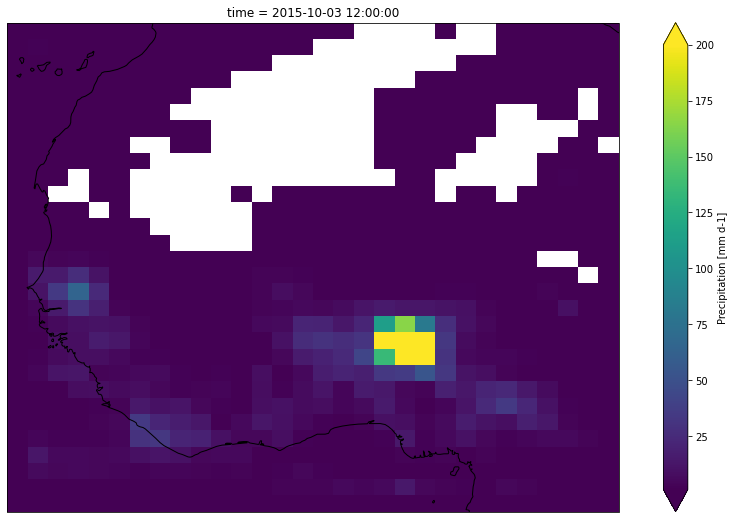

In [301]:
plt.figure(figsize=(16, 9))
ax = plt.axes(projection=ccrs.PlateCarree())
scen585_ad.isel(time=275).plot.pcolormesh(ax=ax, vmin=1, vmax=200);
ax.coastlines()

In [302]:
# lenght of dataarray before conversion
print((f'lenght of Projection Model Adjusted data is : {len(scenQDM_ad.time.values)}'))
scenQDM_ad.time[59].data

lenght of Projection Model Adjusted data is : 31390


array(cftime.DatetimeNoLeap(2015, 3, 1, 12, 0, 0, 0, has_year_zero=True),
      dtype=object)

In [303]:
# Calendar conversion

# Convert the Historical Model Adjusted Simulation data to `Standard` calendar
scenQDM_ad_with_missing = xclim.core.calendar.convert_calendar(
    scenQDM_ad, 'standard', missing=np.NaN)
scenQDM_ad_out = scenQDM_ad_with_missing.interpolate_na(
    'time', method='linear')

In [304]:
# lenght of dataarray after conversion
print((f'lenght of Model Adjusted data is : {len(scenQDM_ad_out.time.values)}'))
scenQDM_ad_out.time[59].data

lenght of Model Adjusted data is : 31411


array(cftime.DatetimeGregorian(2015, 3, 1, 12, 0, 0, 0, has_year_zero=False),
      dtype=object)

In [305]:
# convert CFTime index to Datetime index
datetimeindex = scenQDM_ad_out.indexes['time'].to_datetimeindex()
scenQDM_ad_out['time'] = datetimeindex
scenQDM_ad_out.time[59].data

/home/jefire/miniconda3/envs/xclim_xesmf_env/lib/python3.9/site-packages/xarray/coding/times.py:351: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  sample = dates.ravel()[0]


array('2015-03-01T12:00:00.000000000', dtype='datetime64[ns]')

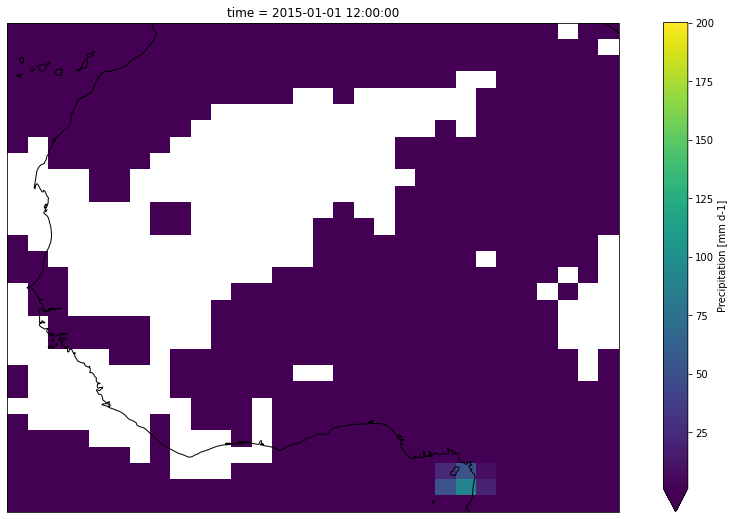

In [306]:
plt.figure(figsize=(16, 9))
ax = plt.axes(projection=ccrs.PlateCarree())
scenQDM_ad.isel(time=0).plot.pcolormesh(ax=ax, vmin=1, vmax=200);
ax.coastlines()

In [307]:
# lenght of dataarray before conversion
print((f'lenght of Projection Model Adjusted data is : {len(scenQDM585_ad.time.values)}'))
scenQDM585_ad.time[59].data

lenght of Projection Model Adjusted data is : 31390


array(cftime.DatetimeNoLeap(2015, 3, 1, 12, 0, 0, 0, has_year_zero=True),
      dtype=object)

In [308]:
# Calendar conversion

# Convert the Historical Model Adjusted Simulation data to `Standard` calendar
scenQDM585_ad_with_missing = xclim.core.calendar.convert_calendar(
    scenQDM585_ad, 'standard', missing=np.NaN)
scenQDM585_ad_out = scenQDM585_ad_with_missing.interpolate_na(
    'time', method='linear')

In [309]:
# lenght of dataarray after conversion
print((f'lenght of Model Adjusted data is : {len(scenQDM585_ad_out.time.values)}'))
scenQDM585_ad_out.time[59].data

lenght of Model Adjusted data is : 31411


array(cftime.DatetimeGregorian(2015, 3, 1, 12, 0, 0, 0, has_year_zero=False),
      dtype=object)

In [310]:
# convert CFTime index to Datetime index
datetimeindex = scenQDM585_ad_out.indexes['time'].to_datetimeindex()
scenQDM585_ad_out['time'] = datetimeindex
scenQDM585_ad_out.time[59].data

/home/jefire/miniconda3/envs/xclim_xesmf_env/lib/python3.9/site-packages/xarray/coding/times.py:351: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  sample = dates.ravel()[0]


array('2015-03-01T12:00:00.000000000', dtype='datetime64[ns]')

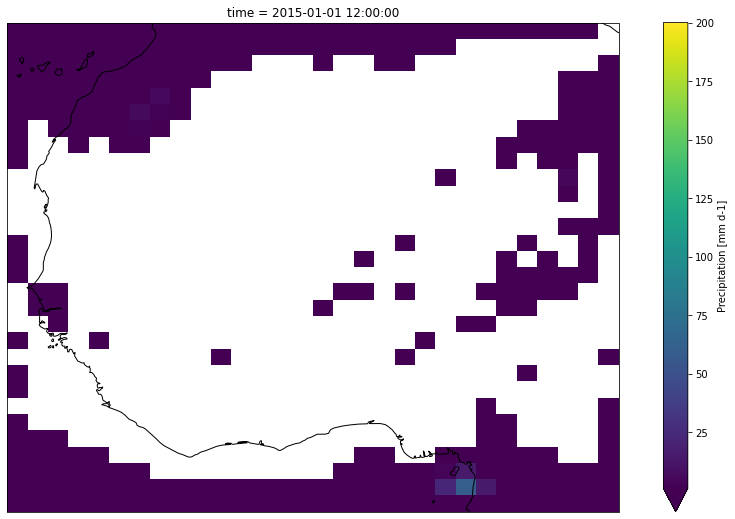

In [311]:
plt.figure(figsize=(16, 9))
ax = plt.axes(projection=ccrs.PlateCarree())
scenQDM585_ad.isel(time=0).plot.pcolormesh(ax=ax, vmin=1, vmax=200);
ax.coastlines()

In [312]:
# lenght of ssp585 dataarray before conversion
print((f'lenght of Projection Model Adjusted data is : {len(scenLOCI.time.values)}'))
scenLOCI.time[59].data

lenght of Projection Model Adjusted data is : 31390


array(cftime.DatetimeNoLeap(2015, 3, 1, 12, 0, 0, 0, has_year_zero=True),
      dtype=object)

In [313]:
# Calendar conversion

# Convert the Projection ssp585 Model Adjusted Simulation data to `Standard` calendar
scenLOCI_with_missing = xclim.core.calendar.convert_calendar(
    scenLOCI, 'standard', missing=np.NaN)
scenLOCI_out = scenLOCI_with_missing.interpolate_na(
    'time', method='linear')

In [314]:
# lenght of ssp585 dataarray after conversion
print((f'lenght of Model Adjusted data is : {len(scenLOCI_out.time.values)}'))
scenLOCI_out.time[59].data

lenght of Model Adjusted data is : 31411


array(cftime.DatetimeGregorian(2015, 3, 1, 12, 0, 0, 0, has_year_zero=False),
      dtype=object)

In [315]:
# convert CFTime index to Datetime index
datetimeindex = scenLOCI_out.indexes['time'].to_datetimeindex()
scenLOCI_out['time'] = datetimeindex
scenLOCI_out.time[59].data

/home/jefire/miniconda3/envs/xclim_xesmf_env/lib/python3.9/site-packages/xarray/coding/times.py:351: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  sample = dates.ravel()[0]


array('2015-03-01T12:00:00.000000000', dtype='datetime64[ns]')

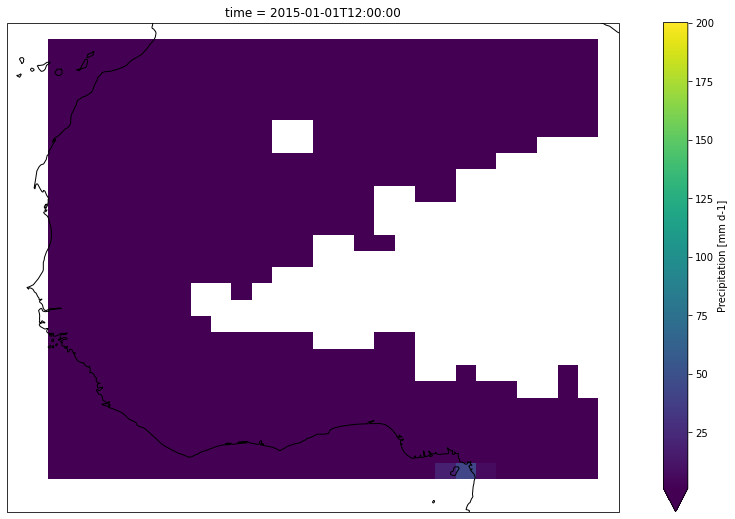

In [316]:
plt.figure(figsize=(16, 9))
ax = plt.axes(projection=ccrs.PlateCarree())
scenLOCI_out.isel(time=0).plot.pcolormesh(ax=ax, vmin=1, vmax=200);
ax.coastlines()

In [317]:
# lenght of dataarray before conversion
print((f'lenght of Projection Model Adjusted data is : {len(scenLOCI585.time.values)}'))
scenLOCI585.time[59].data

lenght of Projection Model Adjusted data is : 31390


array(cftime.DatetimeNoLeap(2015, 3, 1, 12, 0, 0, 0, has_year_zero=True),
      dtype=object)

In [318]:
# Calendar conversion

# Convert the Projection Model Adjusted Simulation data to `Standard` calendar
scenLOCI585_with_missing = xclim.core.calendar.convert_calendar(
    scenLOCI585, 'standard', missing=np.NaN)
scenLOCI585_out = scenLOCI585_with_missing.interpolate_na(
    'time', method='linear')

In [319]:
# lenght of dataarray after conversion
print((f'lenght of Model Adjusted data is : {len(scenLOCI585_out.time.values)}'))
scenLOCI585_out.time[59].data

lenght of Model Adjusted data is : 31411


array(cftime.DatetimeGregorian(2015, 3, 1, 12, 0, 0, 0, has_year_zero=False),
      dtype=object)

In [320]:
# convert CFTime index to Datetime index
datetimeindex = scenLOCI585_out.indexes['time'].to_datetimeindex()
scenLOCI585_out['time'] = datetimeindex
scenLOCI585_out.time[59].data

/home/jefire/miniconda3/envs/xclim_xesmf_env/lib/python3.9/site-packages/xarray/coding/times.py:351: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  sample = dates.ravel()[0]


array('2015-03-01T12:00:00.000000000', dtype='datetime64[ns]')

In [321]:
# lenght of dataarray before conversion
print((f'lenght of Projection Model Adjusted data is : {len(scenLOCI_hist.time.values)}'))
scenLOCI_hist.time[59].data

lenght of Projection Model Adjusted data is : 60225


array(cftime.DatetimeNoLeap(1850, 3, 1, 12, 0, 0, 0, has_year_zero=True),
      dtype=object)

In [322]:
# Calendar conversion

# Convert the Historical Model Adjusted Simulation data to `Standard` calendar
scenLOCI_hist_with_missing = xclim.core.calendar.convert_calendar(
    scenLOCI_hist, 'standard', missing=np.NaN)
scenLOCI_hist_out = scenLOCI_hist_with_missing.interpolate_na(
    'time', method='linear')

In [323]:
# lenght of dataarray after conversion
print((f'lenght of Model Adjusted data is : {len(scenLOCI_hist_out.time.values)}'))
scenLOCI_hist_out.time[59].data

lenght of Model Adjusted data is : 60265


array(cftime.DatetimeGregorian(1850, 3, 1, 12, 0, 0, 0, has_year_zero=False),
      dtype=object)

In [324]:
# convert CFTime index to Datetime index
datetimeindex = scenLOCI_hist_out.indexes['time'].to_datetimeindex()
scenLOCI_hist_out['time'] = datetimeindex
scenLOCI_hist_out.time[59].data

/home/jefire/miniconda3/envs/xclim_xesmf_env/lib/python3.9/site-packages/xarray/coding/times.py:351: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  sample = dates.ravel()[0]


array('1850-03-01T12:00:00.000000000', dtype='datetime64[ns]')

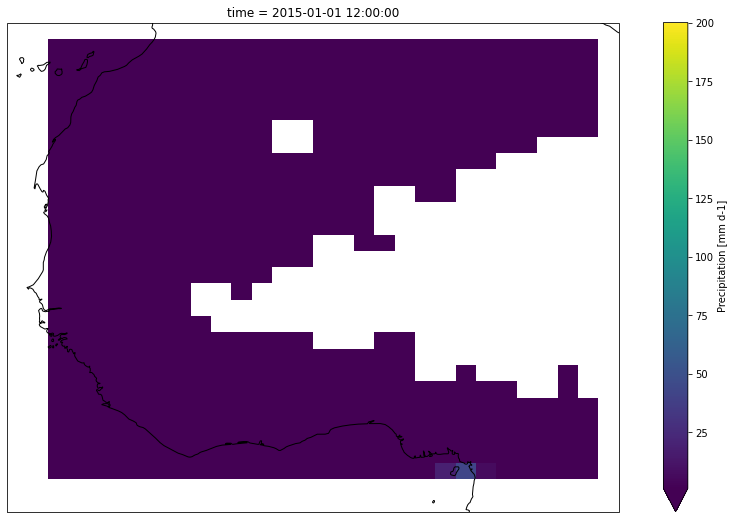

In [325]:
plt.figure(figsize=(16, 9))
ax = plt.axes(projection=ccrs.PlateCarree())
scenLOCI.isel(time=0).plot.pcolormesh(ax=ax, vmin=1, vmax=200);
ax.coastlines()

In [326]:
# Save datasets

scen_out.to_netcdf(
    '/datadrive/project/output/gfdl_bcsd/gfdl_to_gpm/pr_day_GFDL-ESM4_ssp245_qm_groupbymonth_patch-nointerp_20150101-21001231.nc')

scen585_out.to_netcdf(
    '/datadrive/project/output/gfdl_bcsd/gfdl_to_gpm/pr_day_GFDL-ESM4_ssp585_qm_groupbymonth_patch-nointerp_20150101-21001231.nc')

scen_hist_out.to_netcdf(
    '/datadrive/project/output/gfdl_bcsd/gfdl_to_gpm/pr_day_GFDL-ESM4_historical_qm_groupbymonth_patch-nointerp_18500101-20141231.nc')

In [327]:
scenQDM_out.to_netcdf(
    '/datadrive/project/output/gfdl_bcsd/gfdl_to_gpm/pr_day_GFDL-ESM4_ssp245_qdm_groupbymonth_patch-nointerp_20150101-21001231.nc')

scenQDM585_out.to_netcdf(
    '/datadrive/project/output/gfdl_bcsd/gfdl_to_gpm/pr_day_GFDL-ESM4_ssp585_qdm_groupbymonth_patch-nointerp_20150101-21001231.nc')

scenQDM_hist_out.to_netcdf(
    '/datadrive/project/output/gfdl_bcsd/gfdl_to_gpm/pr_day_GFDL-ESM4_historical_qdm_groupbymonth_patch-nointerp_18500101-20141231.nc')

In [328]:
scen_ad_out.to_netcdf(
    '/datadrive/project/output/gfdl_bcsd/gfdl_to_gpm/pr_day_GFDL-ESM4_ssp245_qm_ad_groupbymonth_patch-nointerp_20150101-21001231.nc')

scen585_ad_out.to_netcdf(
    '/datadrive/project/output/gfdl_bcsd/gfdl_to_gpm/pr_day_GFDL-ESM4_ssp585_qm_ad_groupbymonth_patch-nointerp_20150101-21001231.nc')

In [329]:
scenQDM_ad_out.to_netcdf(
    '/datadrive/project/output/gfdl_bcsd/gfdl_to_gpm/pr_day_GFDL-ESM4_ssp245_qdm_ad_groupbymonth_patch-nointerp_20150101-21001231.nc')

scenQDM585_ad_out.to_netcdf(
    '/datadrive/project/output/gfdl_bcsd/gfdl_to_gpm/pr_day_GFDL-ESM4_ssp585_qdm_ad_groupbymonth_patch-nointerp_20150101-21001231.nc')

In [330]:
scenLOCI_out.to_netcdf(
    '/datadrive/project/output/gfdl_bcsd/gfdl_to_gpm//pr_day_GFDL-ESM4_ssp245_LOCI_groupbymonth_patch-nointerp_20150101-21001231.nc')

scenLOCI585_out.to_netcdf(
    '/datadrive/project/output/gfdl_bcsd/gfdl_to_gpm/pr_day_GFDL-ESM4_ssp585_LOCI_groupbymonth_patch-nointerp_20150101-21001231.nc')

scenLOCI_hist_out.to_netcdf(
    '/datadrive/project/output/gfdl_bcsd/gfdl_to_gpm/pr_day_GFDL-ESM4_historical_LOCI_groupbymonth_patch-nointerp_18500101-20141231.nc')

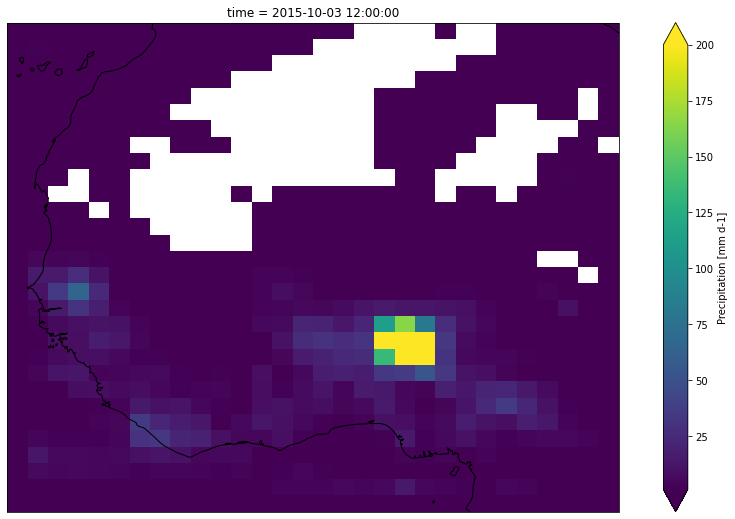

In [331]:
plt.figure(figsize=(16, 9))
ax = plt.axes(projection=ccrs.PlateCarree())
scenQDM585_ad.isel(time=275).plot.pcolormesh(ax=ax, vmin=1, vmax=200);
ax.coastlines()